Portland Data Science Group
TriMet Data Workshop
Merritt Lawrenson
June 3rd, 2018

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

os.chdir('/Users/merritt/Projects/trimet-pdsg')

In [2]:
trips = pd.read_csv("trips_month.csv")
# events = pd.read_csv("events_month.csv")
events = pd.read_csv("rail-feb.csv")

In [3]:
events.head()

bearing  blockID  delay  direction            timestamp garage  lastLocID  \
0      110     9040    -15          0  2017-02-08 11:56:41   ELMO       8333   
1      109     9040    -12          0  2017-02-08 12:00:48   ELMO       8335   
2      349     9040    -60          0  2017-02-08 12:04:08   ELMO       8337   
3      357     9040    -74          0  2017-02-08 12:05:14   ELMO       8338   
4      359     9040    -82          0  2017-02-08 12:06:07   ELMO       8339   

   lastStopSeq  messageCode  nextLocID  nextStopSeq  routeNumber  \
0            7          927       8334            8           90   
1            9          927       8336           10           90   
2           11          927       8338           12           90   
3           12          927       8339           13           90   
4           13          927       8340           14           90   

            signMessageLong   tripID  type  vehicle_id  \
0  MAX  Red Line to Airport  7126389  rail         107   
1  MAX  Red Line to Airport  7126389  rail         107   
2  MAX  Red Line to Airport  7126389  rail         107   
3  MAX  Red Line to Airport  7126389  rail         107   
4  MAX  Red Line to Airport  7126389  rail         107   

   vehicle_location_longitude  vehicle_location_latitude  
0                 -122.681098                  45.518994  
1                 -122.674803                  45.517254  
2                 -122.671237                  45.522383  
3                 -122.671347                  45.524104  
4                 -122.671407                  45.525672

In [4]:
events.describe()

bearing        blockID          delay      direction  \
count  857602.000000  857602.000000  857602.000000  857602.000000   
mean      177.055277    9044.334304     -99.788081       0.498960   
std       104.250469      27.003614     195.364681       0.499999   
min         0.000000    9001.000000   -1000.000000       0.000000   
25%        90.000000    9021.000000    -129.000000       0.000000   
50%       179.000000    9044.000000     -39.000000       0.000000   
75%       271.000000    9067.000000       6.000000       1.000000   
max       359.000000    9088.000000     599.000000       1.000000   

           lastLocID    lastStopSeq    messageCode      nextLocID  \
count  857602.000000  857602.000000  857602.000000  857602.000000   
mean     9790.686187      15.963996     928.915305    9774.147710   
std      1874.685516      11.688678      36.496790    1874.567566   
min      7601.000000       1.000000     891.000000    7601.000000   
25%      8352.000000       7.000000     892.000000    8351.000000   
50%      9624.000000      13.000000     927.000000    9303.000000   
75%     10575.000000      22.000000     971.000000   10575.000000   
max     13803.000000      47.000000     978.000000   13803.000000   

         nextStopSeq    routeNumber        tripID     vehicle_id  \
count  857602.000000  857602.000000  8.576020e+05  857602.000000   
mean       16.197826     144.469999  7.129878e+06     297.238325   
std        11.738736      66.221364  5.538708e+03     124.757863   
min         1.000000      90.000000  7.126389e+06       0.000000   
25%         7.000000     100.000000  7.127272e+06     217.000000   
50%        13.000000     100.000000  7.127746e+06     251.000000   
75%        23.000000     200.000000  7.129530e+06     406.000000   
max        47.000000     290.000000  7.148252e+06     538.000000   

       vehicle_location_longitude  vehicle_location_latitude  
count               857602.000000              857602.000000  
mean                  -122.667997                  45.520434  
std                      0.117976                   0.024372  
min                   -122.990987                  45.430730  
25%                   -122.684197                  45.510420  
50%                   -122.671414                  45.521388  
75%                   -122.592376                  45.530063  
max                   -122.418437                  45.605354

In [5]:
events9757 = events.query("nextLocID == 9757")

In [6]:
events9757.describe()

bearing      blockID        delay  direction  lastLocID  \
count  6962.000000  6962.000000  6962.000000     6962.0     6962.0   
mean    290.067509  9028.528584  -181.832376        1.0     8384.0   
std       0.295606    16.426329   209.671892        0.0        0.0   
min     278.000000  9001.000000 -1000.000000        1.0     8384.0   
25%     290.000000  9013.000000  -225.000000        1.0     8384.0   
50%     290.000000  9029.000000  -121.000000        1.0     8384.0   
75%     290.000000  9044.000000   -59.000000        1.0     8384.0   
max     291.000000  9052.000000   281.000000        1.0     8384.0   

       lastStopSeq  messageCode  nextLocID  nextStopSeq  routeNumber  \
count  6962.000000  6962.000000     6962.0  6962.000000  6962.000000   
mean     23.030738   905.351767     9757.0    24.030738    96.364550   
std       4.321338    18.043514        0.0     4.321338     4.810543   
min       9.000000   891.000000     9757.0    10.000000    90.000000   
25%      20.000000   891.000000     9757.0    21.000000    90.000000   
50%      27.000000   891.000000     9757.0    28.000000   100.000000   
75%      27.000000   929.000000     9757.0    28.000000   100.000000   
max      27.000000   929.000000     9757.0    28.000000   100.000000   

             tripID   vehicle_id  vehicle_location_longitude  \
count  6.962000e+03  6962.000000                 6962.000000   
mean   7.129112e+06   289.701379                 -122.683253   
std    5.367834e+03   114.266585                    0.000682   
min    7.126594e+06   102.000000                 -122.689216   
25%    7.126705e+06   217.000000                 -122.683791   
50%    7.127627e+06   251.000000                 -122.683046   
75%    7.127765e+06   327.000000                 -122.682639   
max    7.145706e+06   538.000000                 -122.682494   

       vehicle_location_latitude  
count                6962.000000  
mean                   45.520299  
std                     0.000182  
min                    45.520097  
25%                    45.520135  
50%                    45.520243  
75%                    45.520443  
max                    45.521885

In [7]:
events.describe()

bearing        blockID          delay      direction  \
count  857602.000000  857602.000000  857602.000000  857602.000000   
mean      177.055277    9044.334304     -99.788081       0.498960   
std       104.250469      27.003614     195.364681       0.499999   
min         0.000000    9001.000000   -1000.000000       0.000000   
25%        90.000000    9021.000000    -129.000000       0.000000   
50%       179.000000    9044.000000     -39.000000       0.000000   
75%       271.000000    9067.000000       6.000000       1.000000   
max       359.000000    9088.000000     599.000000       1.000000   

           lastLocID    lastStopSeq    messageCode      nextLocID  \
count  857602.000000  857602.000000  857602.000000  857602.000000   
mean     9790.686187      15.963996     928.915305    9774.147710   
std      1874.685516      11.688678      36.496790    1874.567566   
min      7601.000000       1.000000     891.000000    7601.000000   
25%      8352.000000       7.000000     892.000000    8351.000000   
50%      9624.000000      13.000000     927.000000    9303.000000   
75%     10575.000000      22.000000     971.000000   10575.000000   
max     13803.000000      47.000000     978.000000   13803.000000   

         nextStopSeq    routeNumber        tripID     vehicle_id  \
count  857602.000000  857602.000000  8.576020e+05  857602.000000   
mean       16.197826     144.469999  7.129878e+06     297.238325   
std        11.738736      66.221364  5.538708e+03     124.757863   
min         1.000000      90.000000  7.126389e+06       0.000000   
25%         7.000000     100.000000  7.127272e+06     217.000000   
50%        13.000000     100.000000  7.127746e+06     251.000000   
75%        23.000000     200.000000  7.129530e+06     406.000000   
max        47.000000     290.000000  7.148252e+06     538.000000   

       vehicle_location_longitude  vehicle_location_latitude  
count               857602.000000              857602.000000  
mean                  -122.667997                  45.520434  
std                      0.117976                   0.024372  
min                   -122.990987                  45.430730  
25%                   -122.684197                  45.510420  
50%                   -122.671414                  45.521388  
75%                   -122.592376                  45.530063  
max                   -122.418437                  45.605354

In [8]:
trips.describe()

tripID    vehicle_id       blockID     direction   routeNumber
count  4.345700e+04  43457.000000  43457.000000  43457.000000  43457.000000
mean   7.088354e+06    298.593368   9053.781393      0.504361    166.326944
std    2.780379e+04    123.187623     24.236969      0.499987     72.362896
min    6.997146e+06    102.000000   9001.000000      0.000000     90.000000
25%    7.060831e+06    218.000000   9041.000000      0.000000    100.000000
50%    7.104921e+06    301.000000   9062.000000      1.000000    190.000000
75%    7.108590e+06    406.000000   9069.000000      1.000000    200.000000
max    7.130458e+06    538.000000   9088.000000      1.000000    290.000000

In [9]:
trips['routeNumber'].unique()

array([ 90, 100, 190, 200, 290])

In [10]:
trips.query('routeNumber == 150')

Empty DataFrame
Columns: [tripID, vehicle_id, blockID, direction, garage, routeNumber]
Index: []

In [11]:
events["test"] = events["tripID"].isin(trips.query('routeNumber == 150')["tripID"])

In [12]:
events.head()

bearing  blockID  delay  direction            timestamp garage  lastLocID  \
0      110     9040    -15          0  2017-02-08 11:56:41   ELMO       8333   
1      109     9040    -12          0  2017-02-08 12:00:48   ELMO       8335   
2      349     9040    -60          0  2017-02-08 12:04:08   ELMO       8337   
3      357     9040    -74          0  2017-02-08 12:05:14   ELMO       8338   
4      359     9040    -82          0  2017-02-08 12:06:07   ELMO       8339   

   lastStopSeq  messageCode  nextLocID  nextStopSeq  routeNumber  \
0            7          927       8334            8           90   
1            9          927       8336           10           90   
2           11          927       8338           12           90   
3           12          927       8339           13           90   
4           13          927       8340           14           90   

            signMessageLong   tripID  type  vehicle_id  \
0  MAX  Red Line to Airport  7126389  rail         107   
1  MAX  Red Line to Airport  7126389  rail         107   
2  MAX  Red Line to Airport  7126389  rail         107   
3  MAX  Red Line to Airport  7126389  rail         107   
4  MAX  Red Line to Airport  7126389  rail         107   

   vehicle_location_longitude  vehicle_location_latitude   test  
0                 -122.681098                  45.518994  False  
1                 -122.674803                  45.517254  False  
2                 -122.671237                  45.522383  False  
3                 -122.671347                  45.524104  False  
4                 -122.671407                  45.525672  False

In [13]:
trips["tripID"]

0        6997146
1        6997146
2        6997147
3        6997147
4        6997148
5        6997148
6        6997149
7        6997149
8        6997150
9        6997150
10       6997151
11       6997151
12       6997152
13       6997152
14       6997153
15       6997153
16       6997154
17       6997154
18       6997155
19       6997155
20       6997156
21       6997156
22       6997157
23       6997157
24       6997158
25       6997158
26       6997159
27       6997159
28       6997160
29       6997160
          ...   
43427    7130444
43428    7130444
43429    7130445
43430    7130445
43431    7130446
43432    7130446
43433    7130447
43434    7130447
43435    7130448
43436    7130448
43437    7130449
43438    7130449
43439    7130450
43440    7130450
43441    7130451
43442    7130451
43443    7130452
43444    7130452
43445    7130453
43446    7130453
43447    7130454
43448    7130454
43449    7130455
43450    7130455
43451    7130456
43452    7130456
43453    7130457
43454    71304

In [14]:
events.query("test == True")

Empty DataFrame
Columns: [bearing, blockID, delay, direction, timestamp, garage, lastLocID, lastStopSeq, messageCode, nextLocID, nextStopSeq, routeNumber, signMessageLong, tripID, type, vehicle_id, vehicle_location_longitude, vehicle_location_latitude, test]
Index: []

In [15]:
print(events["delay"].min())
print(events["delay"].mean())

-1000
-99.78808118451217


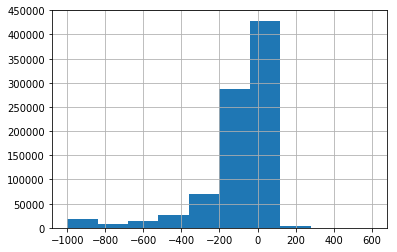

In [16]:
events["delay"].hist()

In [17]:
events.groupby("nextLocID").mean()

bearing      blockID       delay  direction     lastLocID  \
nextLocID                                                                 
7601       186.367349  9070.867136  -92.997334   0.993815   9232.959693   
7606       201.176818  9072.719258 -105.519291   1.000000   7618.000000   
7608       200.915380  9073.339843 -131.308810   1.000000   7646.000000   
7618       200.000301  9073.366687  -38.224345   1.000000   7608.000000   
7627       178.653494  9073.364358 -114.668752   1.000000   9303.000000   
7646       201.531193  9073.343277 -116.208056   1.000000   7627.000000   
7763       352.875758  9073.335152 -127.566364   0.000000   9299.000000   
7774        20.073980  9078.588152  -12.228458   0.000000  10293.000000   
7777        19.326685  9073.246147 -125.534905   0.000000  13123.000000   
7787        20.004652  9073.322929 -148.890306   0.000000   7777.000000   
8333       110.613908  9029.326792  -19.624716   0.000000   9758.000000   
8334       110.001991  9029.334471  -47.029010   0.000000   8333.000000   
8335       110.189856  9028.929130  -33.991141   0.000000   8334.000000   
8336       112.165078  9029.350078  -49.247189   0.000000   8335.000000   
8337        30.316703  9029.255131  -57.936092   0.000000   8336.000000   
8338        98.472990  9029.368677  -56.958733   0.000000   8337.000000   
8339       356.790036  9029.338078  -45.573808   0.000000   8338.000000   
8340       223.750047  9046.930616  -86.754001   0.000000   8194.629354   
8341        90.049070  9046.075220  -91.834378   0.000000   8340.000000   
8342        89.077486  9046.746720 -106.734360   0.000000   8341.000000   
8343        90.270239  9046.740783  -94.392911   0.000000   8342.000000   
8344        88.463422  9046.784435 -105.119547   0.000000   8343.000000   
8345       107.453454  9046.777990 -107.690519   0.000000   8344.000000   
8346        52.004578  9046.770031 -122.563430   0.000000   8345.000000   
8347       116.426628  9048.559133 -132.212861   0.000000   8347.136223   
8348       191.334469  9029.082393 -208.363423   0.000000   8347.000000   
8349        90.001492  9029.038576 -185.113811   0.000000   8348.000000   
8350        90.010241  9029.002560 -205.842757   0.000000   8349.000000   
8351        90.920486  9029.038585 -246.827329   0.000000   8350.000000   
8352        90.011090  9029.051823 -225.003412   0.000000   8351.000000   
...               ...          ...         ...        ...           ...   
13134      244.546078  9083.900327  -75.110131   1.000000  13133.000000   
13135      355.032595  9083.897785  -51.914241   1.000000  13134.000000   
13136        2.667623  9083.900574  -42.897706   1.000000  13135.000000   
13137       12.001913  9083.900510    2.671556   1.000000  13136.000000   
13138      358.957854  9083.896871   26.925607   1.000000  13137.000000   
13139       12.851356  9083.895694    3.410526   1.000000  13138.000000   
13140      295.394952  9082.814433  -22.715962   0.056168  12829.167437   
13449      300.262307  9015.625527  -36.327707   1.000000   8361.000000   
13450      120.768819  9016.270292 -231.946692   0.000000   8657.997589   
13701      234.119205  9063.735099  -94.715232   0.198675  12643.251656   
13710      195.911723  9065.021496  -52.278017   1.000000   7606.000000   
13711      156.974795  9065.034268  -31.563580   1.000000  13710.000000   
13712       62.339473  9065.029753 -119.722301   1.000000  13711.000000   
13713       93.375318  9065.033399 -139.189641   1.000000  13712.000000   
13714      128.135181  9065.033937 -155.930430   1.000000  13713.000000   
13715      182.679909  9065.026958 -160.713394   1.000000  13714.000000   
13716      179.372027  9065.031427 -168.092865   1.000000  13715.000000   
13717      170.882753  9065.030303 -152.741716   1.000000  13716.000000   
13718      174.923099  9065.026958 -134.206867   1.000000  13717.000000   
13720      242.319006  9064.920289  -59.717562   0.566159  13718.867682   
13721      352.946492  9065.764566  -40

In [18]:
events.head()

bearing  blockID  delay  direction            timestamp garage  lastLocID  \
0      110     9040    -15          0  2017-02-08 11:56:41   ELMO       8333   
1      109     9040    -12          0  2017-02-08 12:00:48   ELMO       8335   
2      349     9040    -60          0  2017-02-08 12:04:08   ELMO       8337   
3      357     9040    -74          0  2017-02-08 12:05:14   ELMO       8338   
4      359     9040    -82          0  2017-02-08 12:06:07   ELMO       8339   

   lastStopSeq  messageCode  nextLocID  nextStopSeq  routeNumber  \
0            7          927       8334            8           90   
1            9          927       8336           10           90   
2           11          927       8338           12           90   
3           12          927       8339           13           90   
4           13          927       8340           14           90   

            signMessageLong   tripID  type  vehicle_id  \
0  MAX  Red Line to Airport  7126389  rail         107   
1  MAX  Red Line to Airport  7126389  rail         107   
2  MAX  Red Line to Airport  7126389  rail         107   
3  MAX  Red Line to Airport  7126389  rail         107   
4  MAX  Red Line to Airport  7126389  rail         107   

   vehicle_location_longitude  vehicle_location_latitude   test  
0                 -122.681098                  45.518994  False  
1                 -122.674803                  45.517254  False  
2                 -122.671237                  45.522383  False  
3                 -122.671347                  45.524104  False  
4                 -122.671407                  45.525672  False

In [19]:
events.head()

bearing  blockID  delay  direction            timestamp garage  lastLocID  \
0      110     9040    -15          0  2017-02-08 11:56:41   ELMO       8333   
1      109     9040    -12          0  2017-02-08 12:00:48   ELMO       8335   
2      349     9040    -60          0  2017-02-08 12:04:08   ELMO       8337   
3      357     9040    -74          0  2017-02-08 12:05:14   ELMO       8338   
4      359     9040    -82          0  2017-02-08 12:06:07   ELMO       8339   

   lastStopSeq  messageCode  nextLocID  nextStopSeq  routeNumber  \
0            7          927       8334            8           90   
1            9          927       8336           10           90   
2           11          927       8338           12           90   
3           12          927       8339           13           90   
4           13          927       8340           14           90   

            signMessageLong   tripID  type  vehicle_id  \
0  MAX  Red Line to Airport  7126389  rail         107   
1  MAX  Red Line to Airport  7126389  rail         107   
2  MAX  Red Line to Airport  7126389  rail         107   
3  MAX  Red Line to Airport  7126389  rail         107   
4  MAX  Red Line to Airport  7126389  rail         107   

   vehicle_location_longitude  vehicle_location_latitude   test  
0                 -122.681098                  45.518994  False  
1                 -122.674803                  45.517254  False  
2                 -122.671237                  45.522383  False  
3                 -122.671347                  45.524104  False  
4                 -122.671407                  45.525672  False

In [20]:
events.groupby("signMessageLong").mean()

bearing      blockID  \
signMessageLong                                                        
MAX  Blue Line to City Center                251.717215  9060.489362   
MAX  Blue Line to Elmonica/170th             228.030095  9020.845501   
MAX  Blue Line to Gateway TC                 189.510643  9057.774004   
MAX  Blue Line to Gresham                    109.638423  9016.754333   
MAX  Blue Line to Hillsboro                  269.214886  9017.023417   
MAX  Blue Line to Rose Qtr                   279.558442  9064.407206   
MAX  Blue Line to Ruby Junction/E 197th Ave  104.329991  9054.516559   
MAX  Blue Line to Willow Creek/SW 185th Ave  264.024721  9042.117693   
MAX  Green Line to City Center/PSU           218.780833  9082.716616   
MAX  Green Line to Clackamas Town Center     127.627496  9083.907305   
MAX  Green Line to Gateway TC                132.566018  9076.623727   
MAX  Orange Line to City Center/Expo Center  234.318350  9064.934165   
MAX  Orange Line to City Center/PSU          236.018021  9066.115484   
MAX  Orange Line to Milwaukie                166.347951  9065.027949   
MAX  Red Line to Airport                     122.421163  9043.659903   
MAX  Red Line to City Center & Beaverton     228.186649  9044.113047   
MAX  To City Center                           79.932715  9068.951276   
MAX  Yellow Line to City Center/Milwaukie    167.031324  9064.763909   
MAX  Yellow Line to City Center/PSU          166.537018  9063.777894   
MAX  Yellow Line to Expo Center               87.068158  9064.871360   
MAX  Yellow Line to Interstate/Rose Quarter  168.315346  9066.480185   

                                                  delay  direction  \
signMessageLong                                                      
MAX  Blue Line to City Center                -15.702901   0.846035   
MAX  Blue Line to Elmonica/170th            -108.203814   0.791269   
MAX  Blue Line to Gateway TC                 -56.393795   0.528080   
MAX  Blue Line to Gresham                   -100.160167   0.000000   
MAX  Blue Line to Hillsboro                 -111.574276   1.000000   
MAX  Blue Line to Rose Qtr                   -39.003351   1.000000   
MAX  Blue Line to Ruby Junction/E 197th Ave -156.787926   0.000000   
MAX  Blue Line to Willow Creek/SW 185th Ave -183.587397   1.000000   
MAX  Green Line to City Center/PSU           -67.415751   1.000000   
MAX  Green Line to Clackamas Town Center    -116.989532   0.000000   
MAX  Green Line to Gateway TC                -85.770770   0.514919   
MAX  Orange Line to City Center/Expo Center  -69.320246   0.000000   
MAX  Orange Line to City Center/PSU         -104.433615   0.000000   
MAX  Orange Line to Milwaukie               -110.446352   1.000000   
MAX  Red Line to Airport                     -70.295129   0.000000   
MAX  Red Line to City Center & Beaverton     -98.771006   1.000000   
MAX  To City Center                         -269.322506   0.000000   
MAX  Yellow Line to City Center/Milwaukie    -34.108502   1.000000   
MAX  Yellow Line to City Center/PSU          -35.457769   1.000000   
MAX  Yellow Line to Expo Center             -151.554106   0.000000   
MAX  Yellow Line to Interstate/Rose Quarter  -10.705312   1.000000   

                                                lastLocID  lastStopSeq  \
signMessageLong                                                          
MAX  Blue Line to City Center                 8555.719342     5.896325   
MAX  Blue Line to Elmonica/170th              9183.899732    14.543057   
MAX  Blue Line to Gateway TC                  8904.970335    10.840127   
MAX  Blue Line to Gresham                     9126.345865    23.844112   
MAX  Blue Line to Hillsboro                   9126.261793    23.274353   
MAX  Blue Line to Rose Qtr                    8368.956012     8.019690   
MAX  Blue Line to Ruby Junction/E 197th Ave   8647.887586    12.288337   
MAX  Blue Line to Willow Creek/SW 185th Ave   9019.244014    13.685507   
MAX  Green Line to City Center/PSU      

June 17th, 2018

In [21]:
events.groupby(["signMessageLong","nextLocID"]).mean()

bearing  \
signMessageLong                             nextLocID               
MAX  Blue Line to City Center               8333       110.242424   
                                            8334       110.000000   
                                            8335       109.000000   
                                            8336       109.484848   
                                            8337        18.000000   
                                            8338       335.258065   
                                            8339       357.000000   
                                            8362       301.000000   
                                            8363       301.087432   
                                            8364       285.799235   
                                            8365       270.003824   
                                            8366       270.000000   
                                            8367       270.000000   
                                            8368       270.086022   
                                            8369       269.996422   
                                            8370       270.003578   
                                            9758        24.454545   
                                            9759        21.000000   
                                            9821        88.000000   
                                            9822       128.000000   
                                            9824       119.939394   
                                            9826       126.000000   
                                            9828       124.000000   
                                            9830       115.000000   
                                            9831       112.000000   
                                            9834        94.181818   
                                            9835        87.000000   
                                            9838        86.181818   
                                            9839        72.000000   
                                            9841        90.000000   
...                                                           ...   
MAX  Yellow Line to Expo Center             7763       352.625264   
                                            7774        20.006803   
                                            7777        19.205532   
                                            7787        19.992548   
                                            9299        35.423877   
                                            10293        5.001218   
                                            11498       11.085180   
                                            11508       56.358213   
                                            11509      304.999713   
                                            11510      322.939794   
                                            11511        4.507441   
                                            11512        0.000000   
                                            11513        0.000000   
                                            11514        0.308066   
                                            11515        1.395143   
                                            11516      225.412119   
                                            13123       20.023660   
                                            13140      301.875000   
                                            13701      235.966942   
MAX  Yellow Line to Interstate/Rose Quarter 11498      199.371287   
                                            11499      191.730159   
                                            11500      181.103053   
                                            11501      115.282443   
                                            11502      180.000000   
                                            11503      180.000000   
                                            11504      1

signMessageLong                              nextLocID
MAX  Blue Line to City Center                8333         AxesSubplot(0.125,0.125;0.775x0.755)
                                             8334         AxesSubplot(0.125,0.125;0.775x0.755)
                                             8335         AxesSubplot(0.125,0.125;0.775x0.755)
                                             8336         AxesSubplot(0.125,0.125;0.775x0.755)
                                             8337         AxesSubplot(0.125,0.125;0.775x0.755)
                                             8338         AxesSubplot(0.125,0.125;0.775x0.755)
                                             8339         AxesSubplot(0.125,0.125;0.775x0.755)
                                             8362         AxesSubplot(0.125,0.125;0.775x0.755)
                                             8363         AxesSubplot(0.125,0.125;0.775x0.755)
                                             8364         AxesSubplot(0.125,0.125;0.775x0.

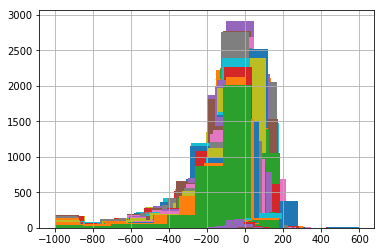

In [22]:
events.groupby(["signMessageLong","nextLocID"])["delay"].hist()

In [38]:
for station in events.groupby(["signMessageLong","nextLocID"])["delay"]:
    print(station)

(('MAX  Blue Line to City Center', 8333), 148309   -146
148333    -94
148357   -149
148381   -143
148405   -146
148429    -29
148453   -149
148477   -144
148501   -143
148525   -146
148552   -256
148579   -256
148603    -94
148627   -152
148651   -149
148675   -144
148699    -88
148723   -144
148747   -152
148771   -146
148795    -29
148818    -42
148841    -42
148865    -89
148889    -39
148913    -39
148937    -97
148961    -89
148985    -97
787541   -310
787565   -310
787589    -31
787613    -31
Name: delay, dtype: int64)
(('MAX  Blue Line to City Center', 8334), 148305   -129
148329    -76
148353   -120
148377   -117
148401   -125
148425     -5
148449   -120
148473   -114
148497   -117
148521   -129
148545   -306
148572   -306
148599    -76
148623   -122
148647   -128
148671   -117
148695    -60
148719   -117
148743   -122
148767   -125
148791     -5
148815    -15
148838    -15
148861    -59
148885   -125
148909   -125
148933    -83
148957    -59
148981    -83
787537   -277
787561 

Name: delay, Length: 3538, dtype: int64)
(('MAX  Blue Line to Gresham', 8350), 128469    -172
128515       7
128560   -1000
128604     -68
128650    -373
128694    -166
128738     -68
128783    -119
128829       7
128875      -5
128921    -119
128965    -166
129009     -53
129055      -6
129101      12
129147     -45
129193      -6
129237     -53
129283      13
129329      13
129375      64
129421      12
129467    -172
129513     -91
129557     -91
129603      64
129649     -56
129695      26
129741     -56
129787      26
          ... 
802232     -76
802278     -76
802324     -56
802370      31
802416      31
802462     -56
802508     -15
802554     -15
802600    -173
802646    -173
802692      16
802738      16
802784     -47
802830     -47
802890    -313
802936    -313
802996    -150
803042    -150
803100    -281
803146    -281
803192    -434
803238    -434
803284    -112
803330    -112
803376     -35
803422     -35
803468    -195
803514    -195
803560   -1000
803606   -1000
Name: 

Name: delay, Length: 159, dtype: int64)
(('MAX  Blue Line to Ruby Junction/E 197th Ave', 10118), 149454       0
149497     -66
149539      13
149581     -38
149623     -77
149655   -1000
149697     -66
149739      12
149782      12
149814   -1000
149856     -38
149898       0
149940     -77
149982     -14
150024     -50
150054     -14
150096     -50
150138     -73
150191    -186
150233     -73
150275       3
150317      24
150359     -11
150401    -186
150443      24
150485       3
150538     -11
151898     -42
151940     -27
151980      -5
          ... 
215903       9
215945    -141
215987      -7
216027       2
216069       9
216111     -55
216151      16
216193     -11
216235     -11
216277      -4
216319      -4
216361     -40
216403     -16
216445    -253
216487     -28
216529    -253
787730     -87
787772     -87
787814      20
787856      20
788082      -5
788124    -121
788166      -5
788208    -121
793401     -83
793433     -83
793766    -178
793808    -178
794586     -12
794

Name: delay, Length: 231, dtype: int64)
(('MAX  Orange Line to City Center/PSU', 13721), 690479    -21
690541    -83
690551    -21
691639     32
691669   -104
691679   -114
691729    -75
691739    -32
691749    -13
701920     12
704173    -98
704183    -98
707418    -48
707458    -48
707538    -76
707558    -76
707628    -30
708000   -169
708100   -169
708638    -62
708648   -906
708727     13
708777     13
708827   -906
708848    -62
715257     27
715267     27
715277     49
715287     49
715297     55
715307     72
715317     72
715327     55
718386    -42
718396    -42
718876    -71
718886    -71
718896    -12
718906    -12
848695    -32
848705    -86
851726    -51
851736    -51
Name: delay, dtype: int64)
(('MAX  Orange Line to City Center/PSU', 13722), 690450   -170
690460   -121
690470    -39
690480    -35
690490   -170
690500   -121
690510    -58
690512    -54
690522    -29
690532    -58
690542   -112
690552    -35
690562    -30
690572   -157
690582   -143
690592    -25
690601   

Name: delay, Length: 3146, dtype: int64)
(('MAX  Yellow Line to City Center/Milwaukie', 11502), 530498    -24
530508    -46
530518    -35
530528     26
530538    -24
530548     30
530558    -21
530568    -46
530578     16
530588    -19
530598    -21
530608     21
530618   -270
530628     26
530638     51
530648    -24
530658     21
530668    -19
530678   -270
530688     25
530698    -24
530708    -35
530718     30
530728     16
530738    -35
530748    -83
530758    -83
530768     -1
530778    -36
530788     33
         ... 
832736     40
832746    -40
832756    -40
832766     19
832778     11
832788     11
832798     23
832808     23
832822   -151
832830   -151
832840    -74
832850    -74
832862    -25
832872    -25
832882    -15
832892    -15
832902   -417
832912   -417
832924    468
832934    468
832944    -22
832954    -22
832982    -19
833012      2
833022      2
833050     17
833060     17
833088     24
833098     24
833108     21
Name: delay, Length: 3135, dtype: int64)
(('MAX  Y

MAX  Blue Line to City Center
8333


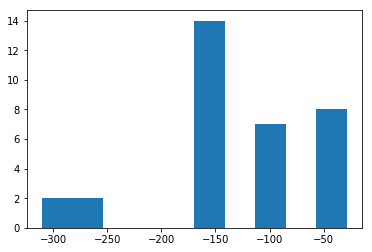

MAX  Blue Line to City Center
8334


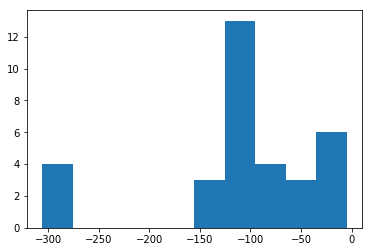

MAX  Blue Line to City Center
8335


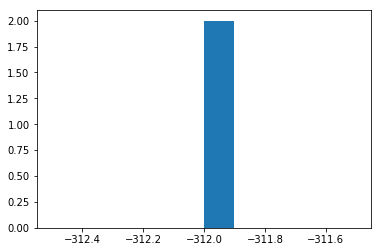

MAX  Blue Line to City Center
8336


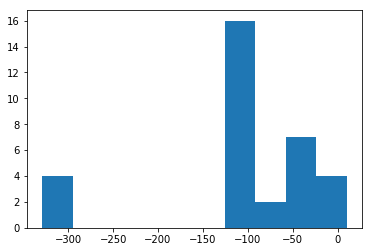

MAX  Blue Line to City Center
8337


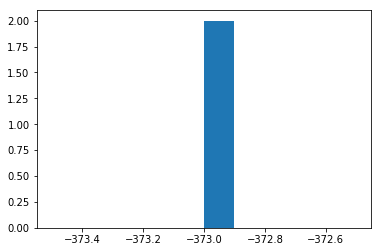

MAX  Blue Line to City Center
8338


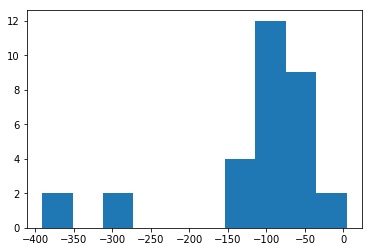

MAX  Blue Line to City Center
8339


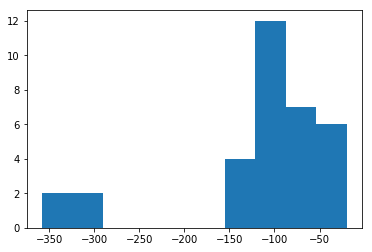

MAX  Blue Line to City Center
8362


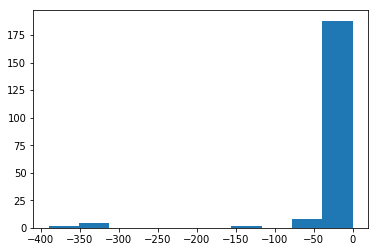

MAX  Blue Line to City Center
8363


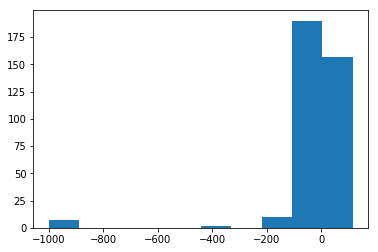

MAX  Blue Line to City Center
8364


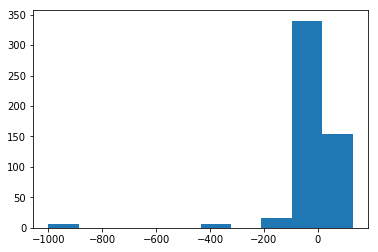

MAX  Blue Line to City Center
8365


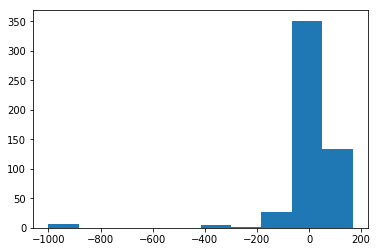

MAX  Blue Line to City Center
8366


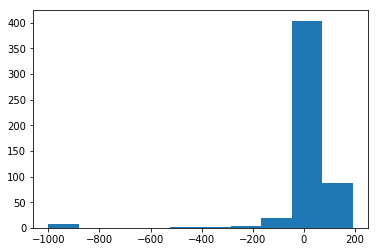

MAX  Blue Line to City Center
8367


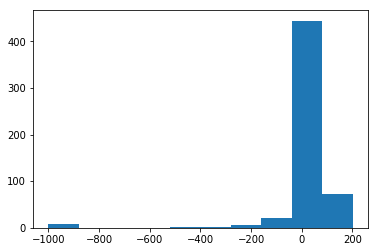

MAX  Blue Line to City Center
8368


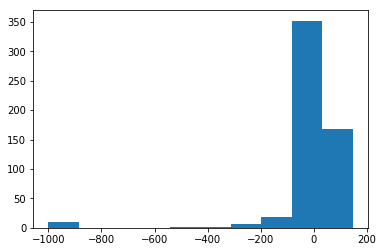

MAX  Blue Line to City Center
8369


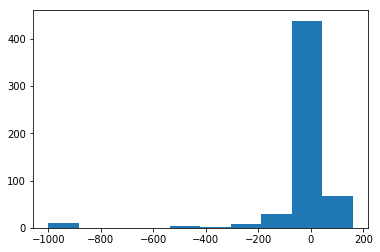

MAX  Blue Line to City Center
8370


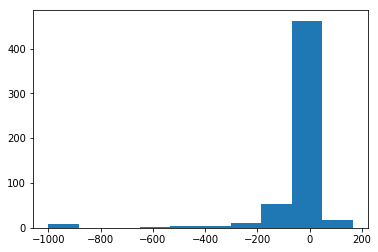

MAX  Blue Line to City Center
9758


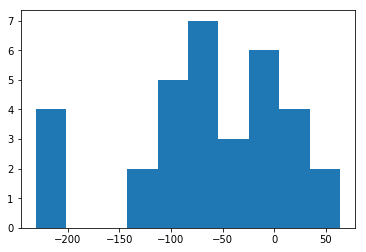

MAX  Blue Line to City Center
9759


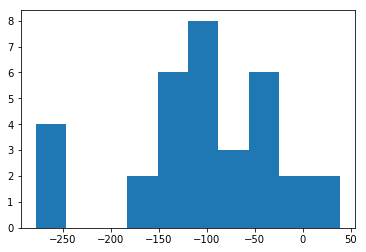

MAX  Blue Line to City Center
9821


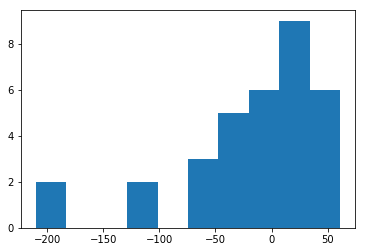

MAX  Blue Line to City Center
9822


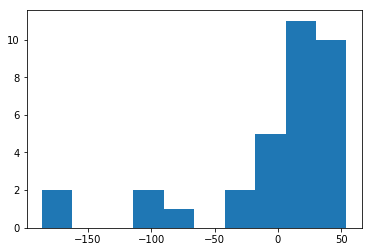

MAX  Blue Line to City Center
9824


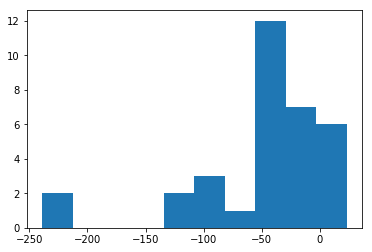

MAX  Blue Line to City Center
9826


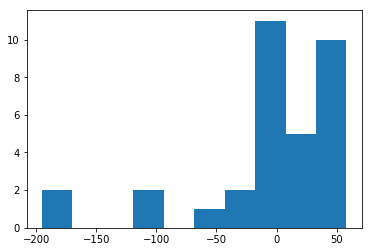

MAX  Blue Line to City Center
9828


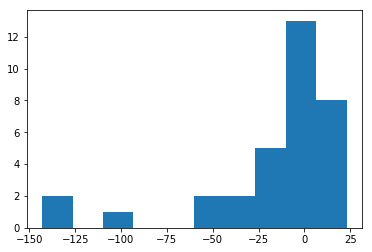

MAX  Blue Line to City Center
9830


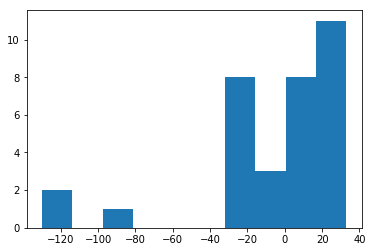

MAX  Blue Line to City Center
9831


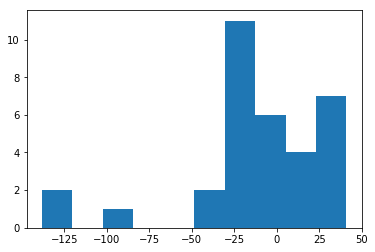

MAX  Blue Line to City Center
9834


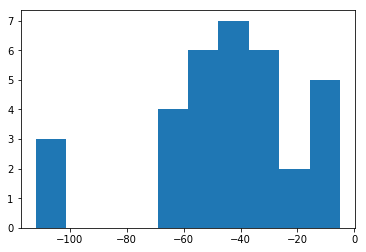

MAX  Blue Line to City Center
9835


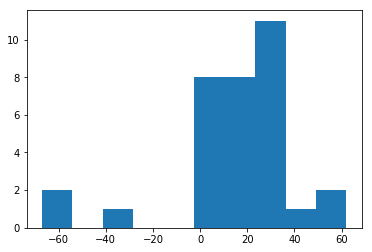

MAX  Blue Line to City Center
9838


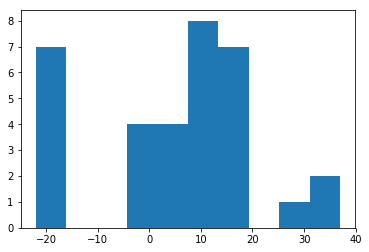

MAX  Blue Line to City Center
9839


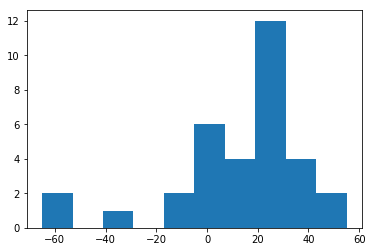

MAX  Blue Line to City Center
9841


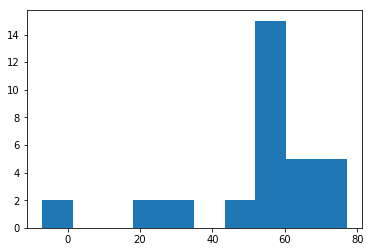

MAX  Blue Line to City Center
9843


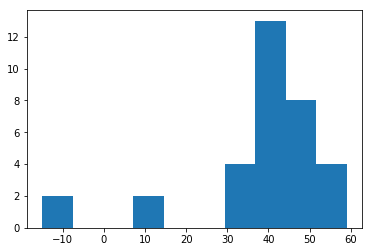

MAX  Blue Line to City Center
9846


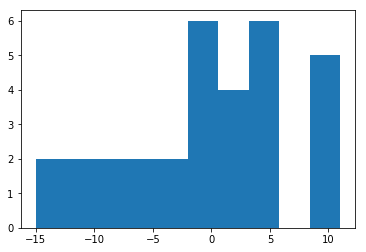

MAX  Blue Line to City Center
9848


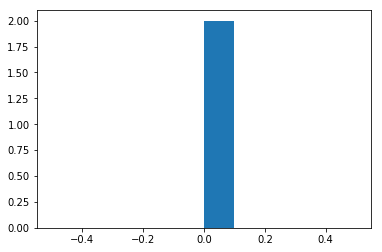

MAX  Blue Line to City Center
9969


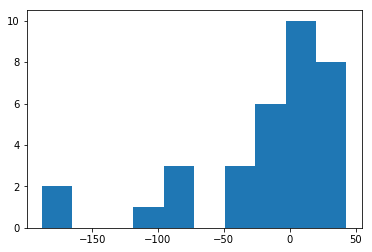

MAX  Blue Line to City Center
10118


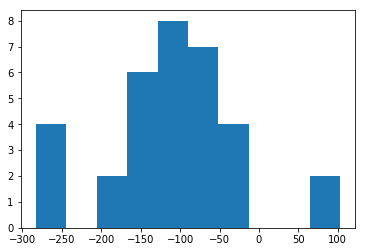

MAX  Blue Line to City Center
10120


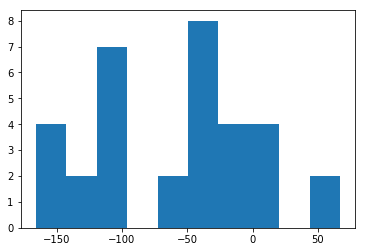

MAX  Blue Line to City Center
11508


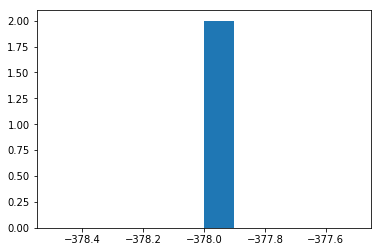

MAX  Blue Line to Elmonica/170th
8359


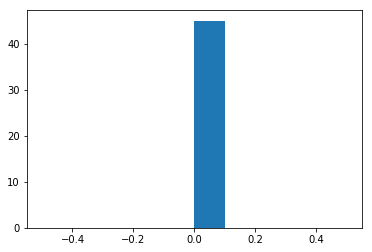

MAX  Blue Line to Elmonica/170th
8360


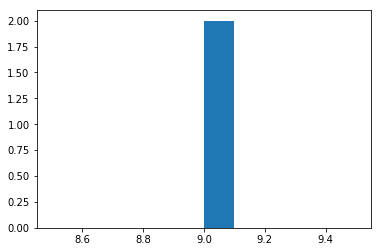

MAX  Blue Line to Elmonica/170th
8361


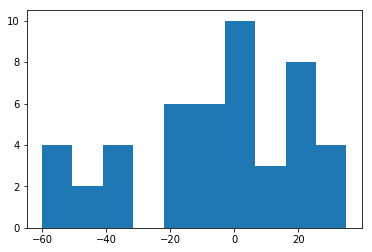

MAX  Blue Line to Elmonica/170th
8362


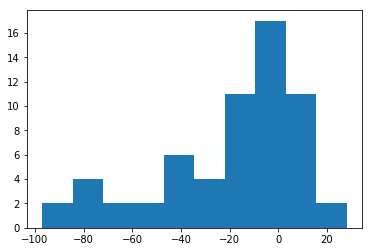

MAX  Blue Line to Elmonica/170th
8363


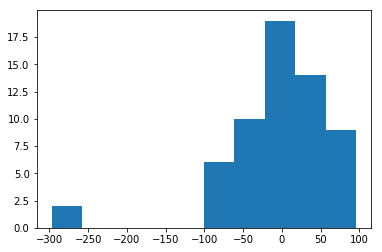

MAX  Blue Line to Elmonica/170th
8364


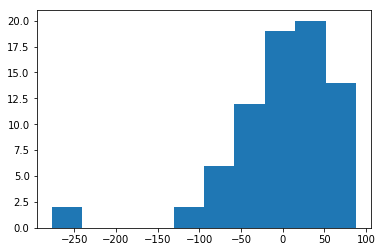

MAX  Blue Line to Elmonica/170th
8365


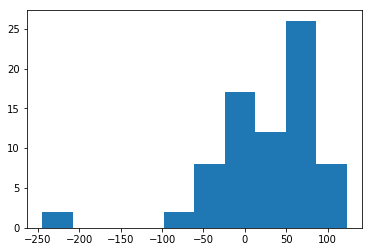

MAX  Blue Line to Elmonica/170th
8366


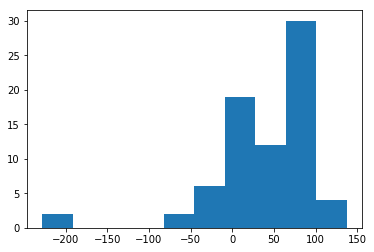

MAX  Blue Line to Elmonica/170th
8367


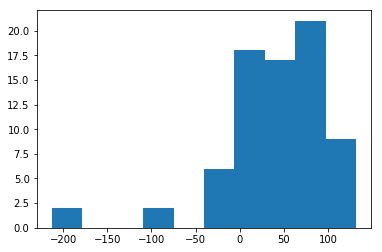

MAX  Blue Line to Elmonica/170th
8368


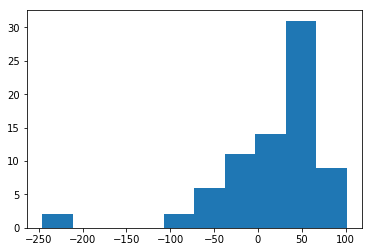

MAX  Blue Line to Elmonica/170th
8369


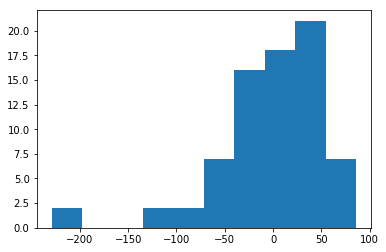

MAX  Blue Line to Elmonica/170th
8370


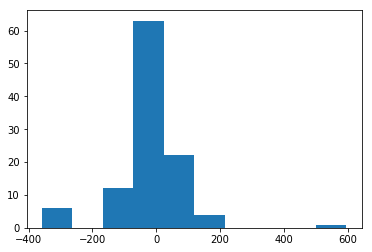

MAX  Blue Line to Elmonica/170th
8371


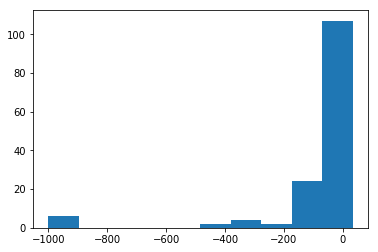

MAX  Blue Line to Elmonica/170th
8372


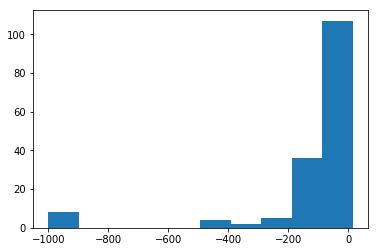

MAX  Blue Line to Elmonica/170th
8373


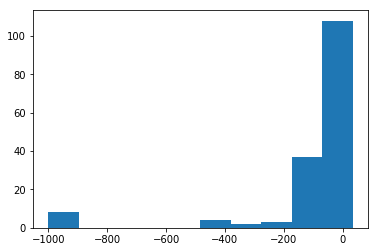

MAX  Blue Line to Elmonica/170th
8374


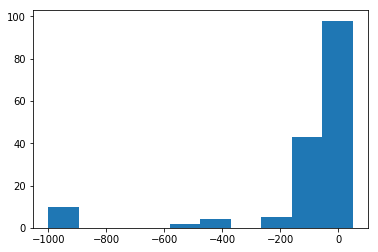

MAX  Blue Line to Elmonica/170th
8375


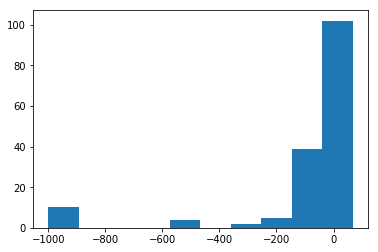

MAX  Blue Line to Elmonica/170th
8376


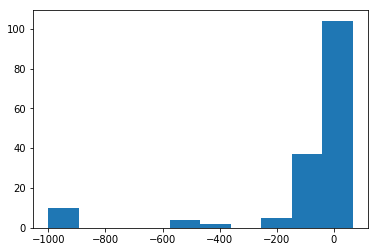

MAX  Blue Line to Elmonica/170th
8377


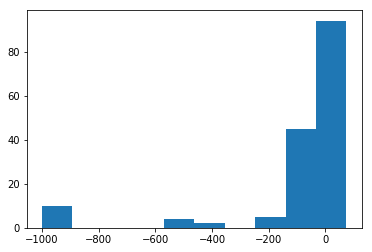

MAX  Blue Line to Elmonica/170th
8378


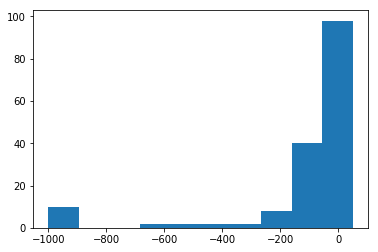

MAX  Blue Line to Elmonica/170th
8379


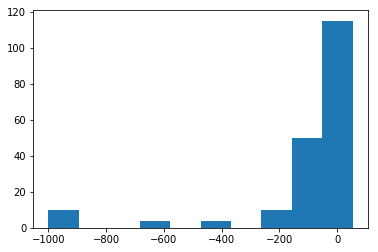

MAX  Blue Line to Elmonica/170th
8380


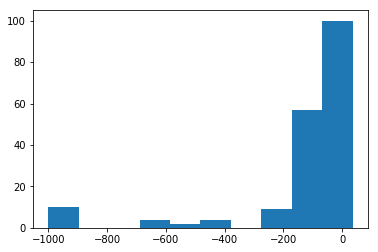

MAX  Blue Line to Elmonica/170th
8381


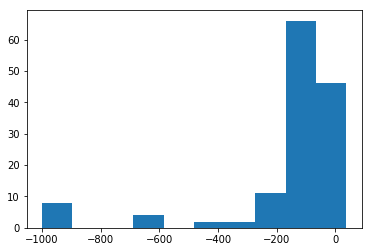

MAX  Blue Line to Elmonica/170th
8382


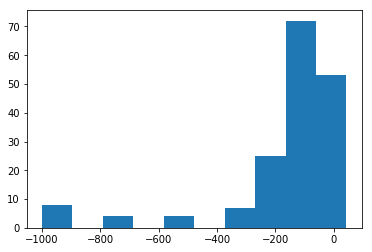

MAX  Blue Line to Elmonica/170th
8383


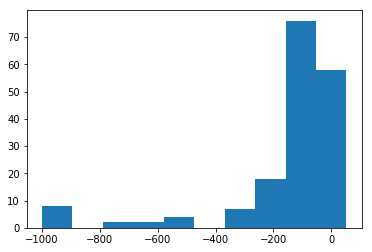

MAX  Blue Line to Elmonica/170th
8384


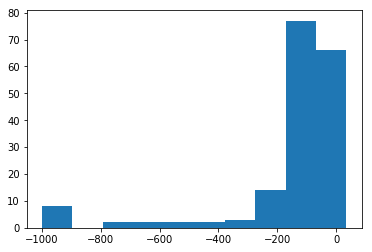

MAX  Blue Line to Elmonica/170th
9624


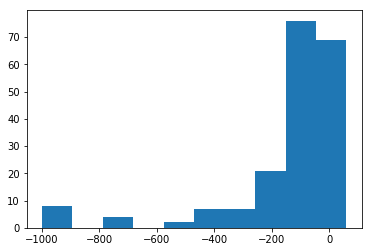

MAX  Blue Line to Elmonica/170th
9757


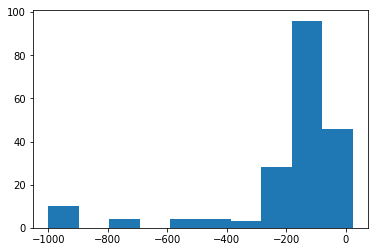

MAX  Blue Line to Elmonica/170th
9818


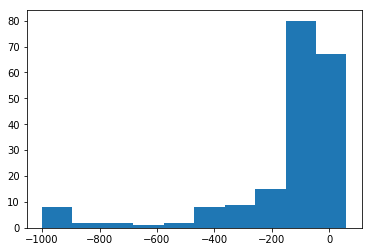

MAX  Blue Line to Elmonica/170th
9819


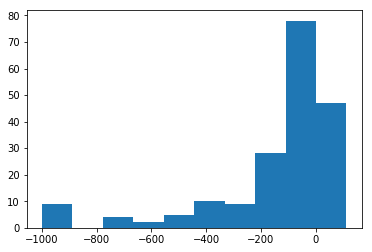

MAX  Blue Line to Elmonica/170th
9820


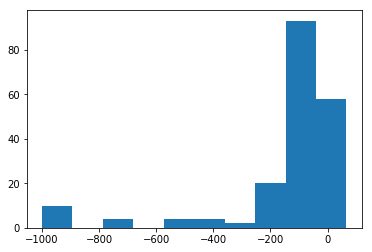

MAX  Blue Line to Elmonica/170th
9823


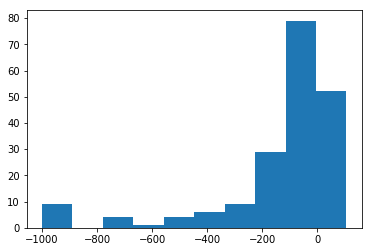

MAX  Blue Line to Elmonica/170th
9825


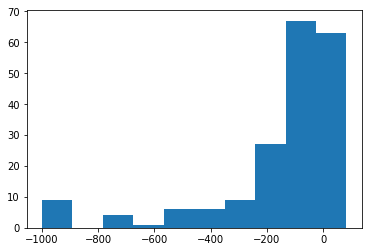

MAX  Blue Line to Elmonica/170th
9827


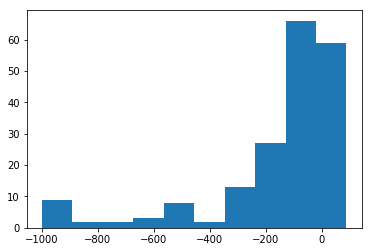

MAX  Blue Line to Elmonica/170th
9829


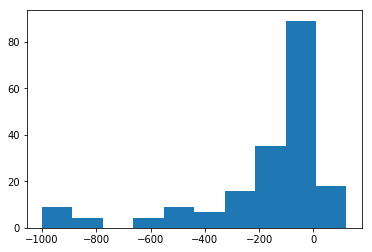

MAX  Blue Line to Elmonica/170th
9830


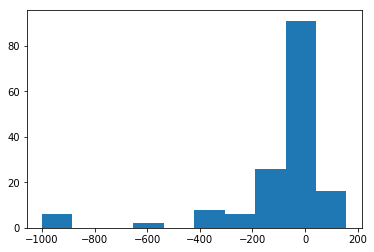

MAX  Blue Line to Elmonica/170th
9831


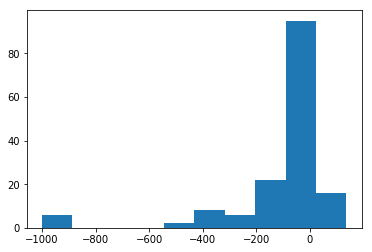

MAX  Blue Line to Elmonica/170th
9834


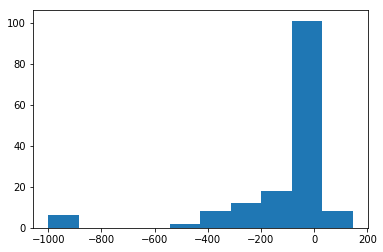

MAX  Blue Line to Elmonica/170th
9835


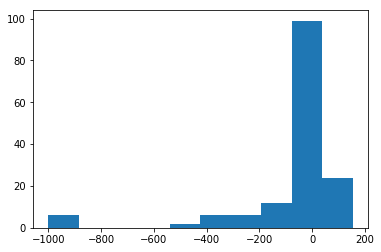

MAX  Blue Line to Elmonica/170th
9838


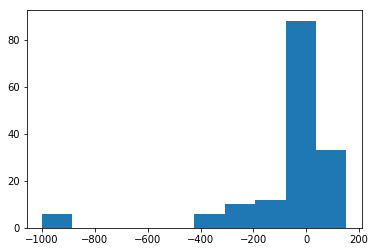

MAX  Blue Line to Elmonica/170th
9839


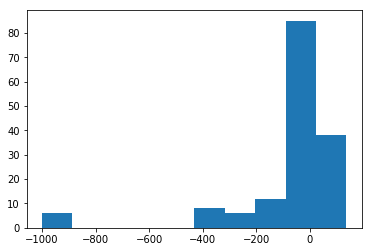

MAX  Blue Line to Elmonica/170th
9841


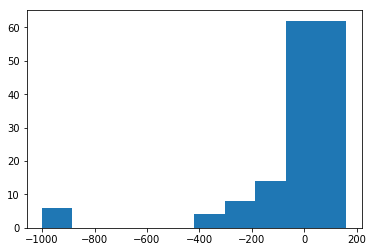

MAX  Blue Line to Elmonica/170th
9843


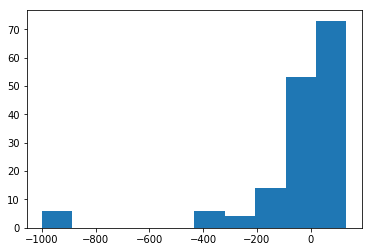

MAX  Blue Line to Elmonica/170th
9846


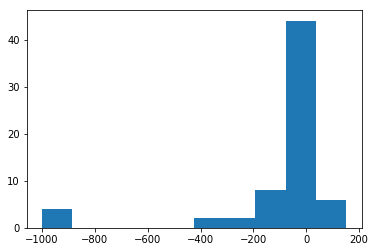

MAX  Blue Line to Elmonica/170th
9848


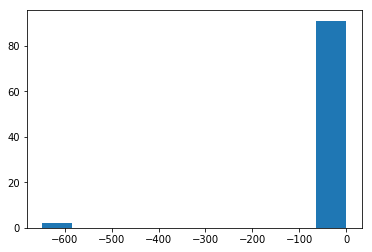

MAX  Blue Line to Elmonica/170th
10117


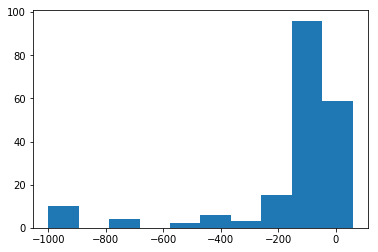

MAX  Blue Line to Elmonica/170th
10121


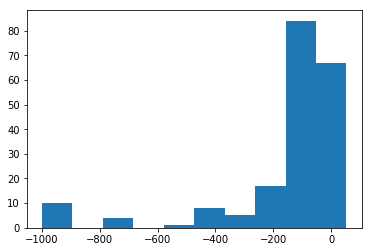

MAX  Blue Line to Elmonica/170th
12931


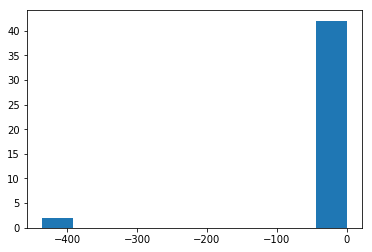

MAX  Blue Line to Elmonica/170th
13449


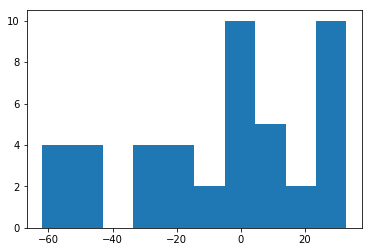

MAX  Blue Line to Gateway TC
8333


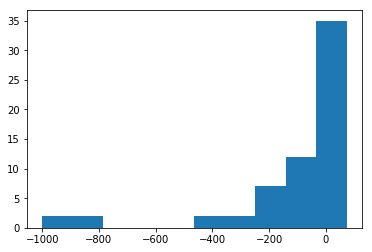

MAX  Blue Line to Gateway TC
8334


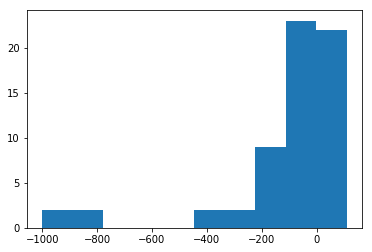

MAX  Blue Line to Gateway TC
8335


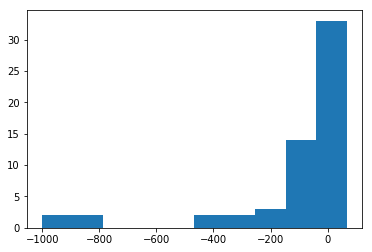

MAX  Blue Line to Gateway TC
8336


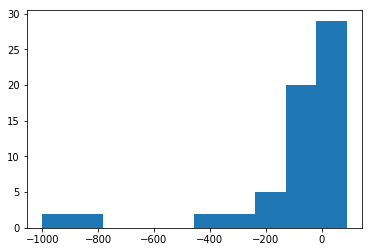

MAX  Blue Line to Gateway TC
8337


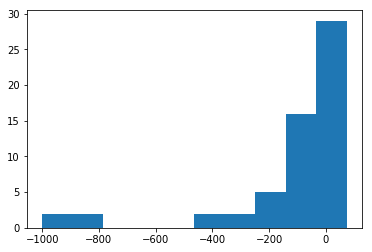

MAX  Blue Line to Gateway TC
8338


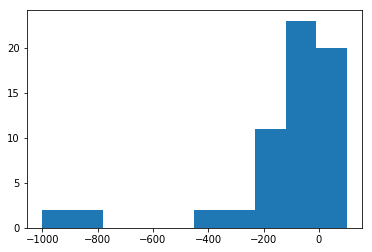

MAX  Blue Line to Gateway TC
8339


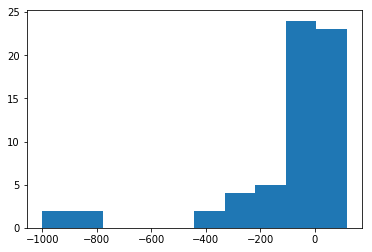

MAX  Blue Line to Gateway TC
8340


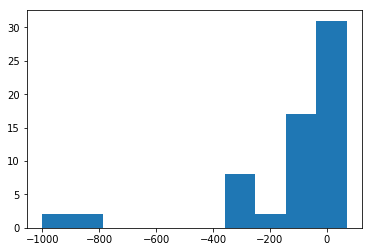

MAX  Blue Line to Gateway TC
8341


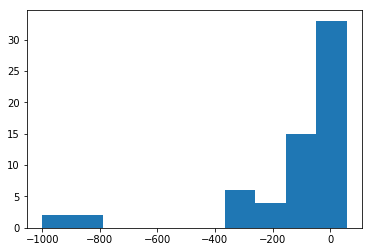

MAX  Blue Line to Gateway TC
8342


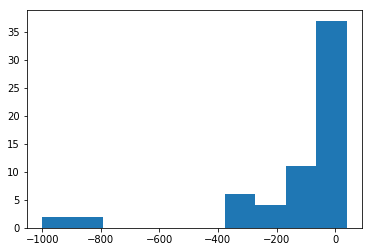

MAX  Blue Line to Gateway TC
8343


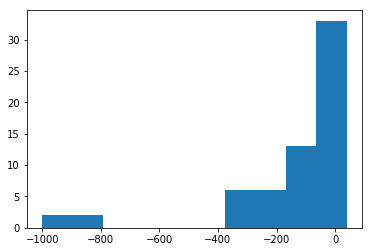

MAX  Blue Line to Gateway TC
8344


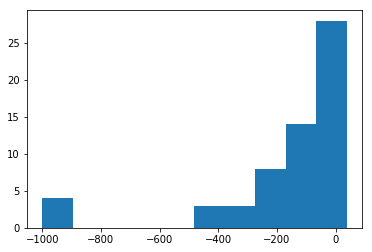

MAX  Blue Line to Gateway TC
8345


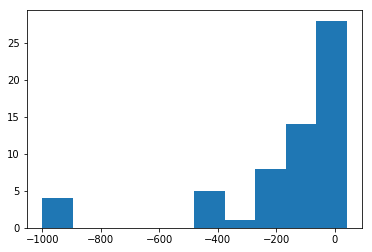

MAX  Blue Line to Gateway TC
8346


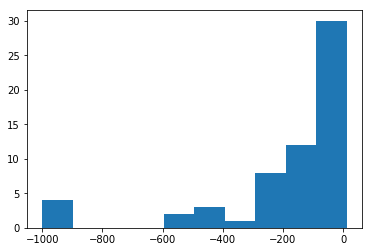

MAX  Blue Line to Gateway TC
8347


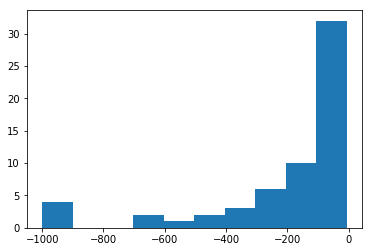

MAX  Blue Line to Gateway TC
8362


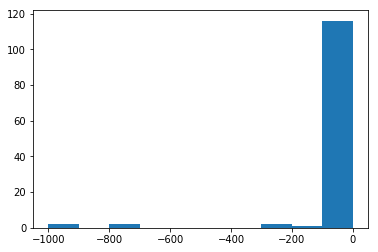

MAX  Blue Line to Gateway TC
8363


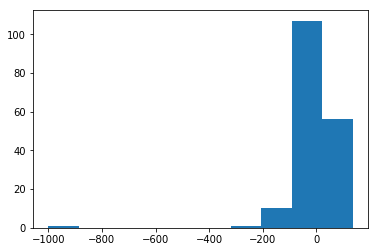

MAX  Blue Line to Gateway TC
8364


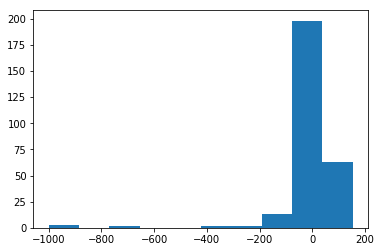

MAX  Blue Line to Gateway TC
8365


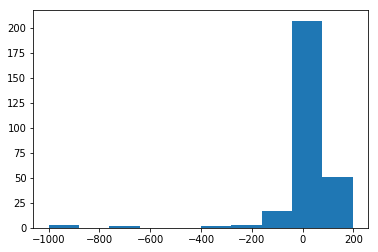

MAX  Blue Line to Gateway TC
8366


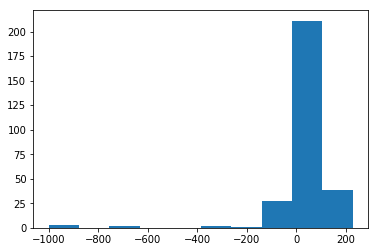

MAX  Blue Line to Gateway TC
8367


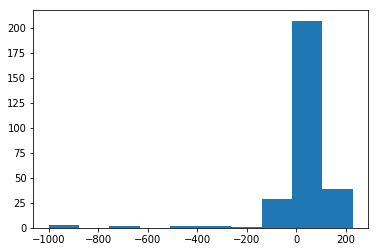

MAX  Blue Line to Gateway TC
8368


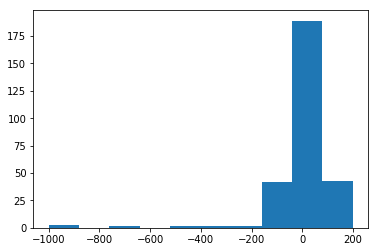

MAX  Blue Line to Gateway TC
8369


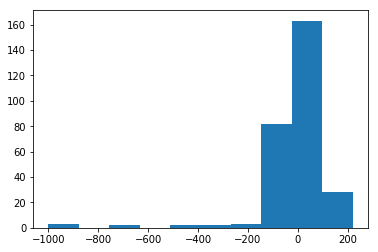

MAX  Blue Line to Gateway TC
8370


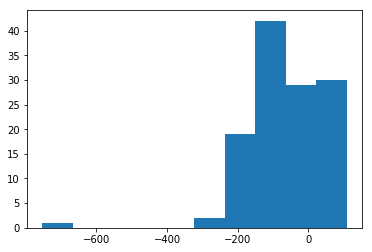

MAX  Blue Line to Gateway TC
9758


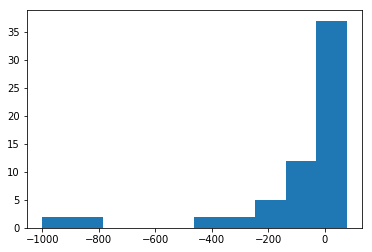

MAX  Blue Line to Gateway TC
9759


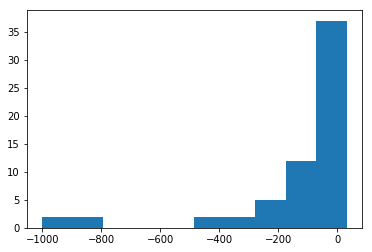

MAX  Blue Line to Gateway TC
9821


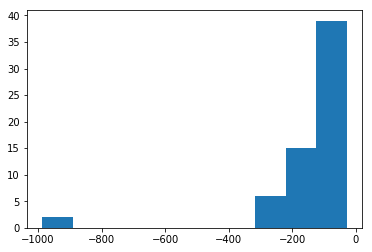

MAX  Blue Line to Gateway TC
9822


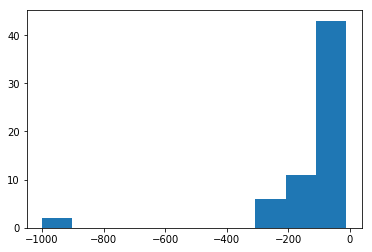

MAX  Blue Line to Gateway TC
9824


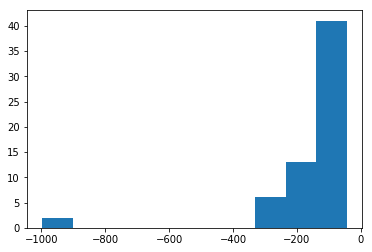

MAX  Blue Line to Gateway TC
9826


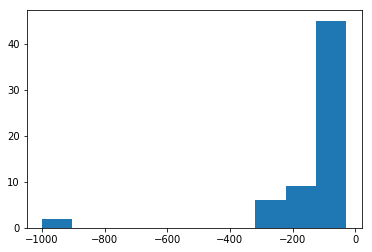

MAX  Blue Line to Gateway TC
9828


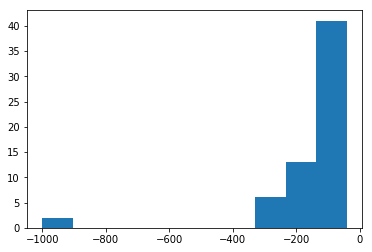

MAX  Blue Line to Gateway TC
9830


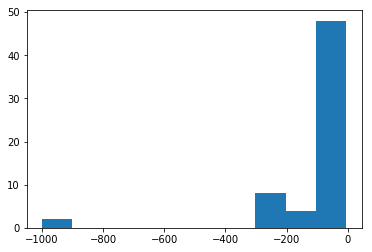

MAX  Blue Line to Gateway TC
9831


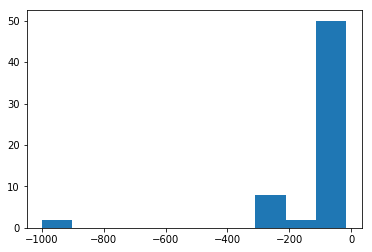

MAX  Blue Line to Gateway TC
9834


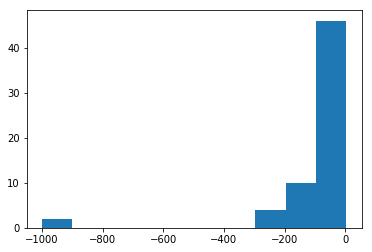

MAX  Blue Line to Gateway TC
9835


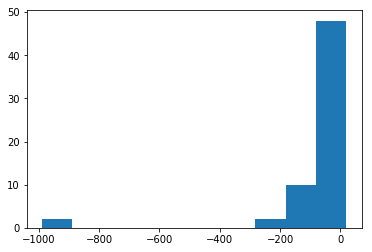

MAX  Blue Line to Gateway TC
9838


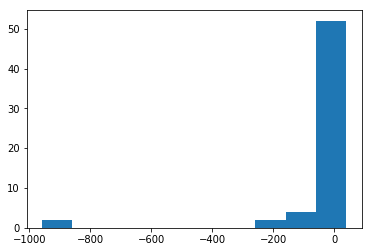

MAX  Blue Line to Gateway TC
9839


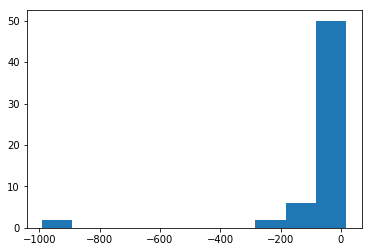

MAX  Blue Line to Gateway TC
9841


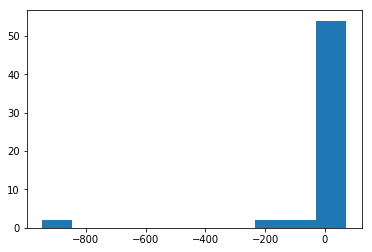

MAX  Blue Line to Gateway TC
9843


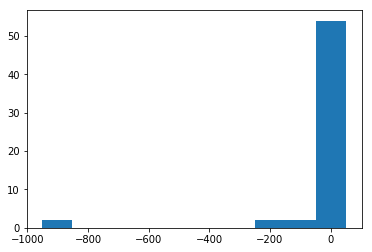

MAX  Blue Line to Gateway TC
9846


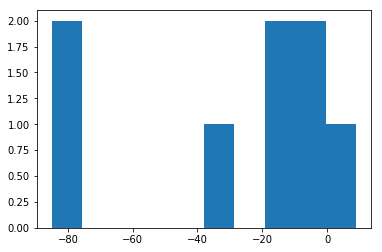

MAX  Blue Line to Gateway TC
9848


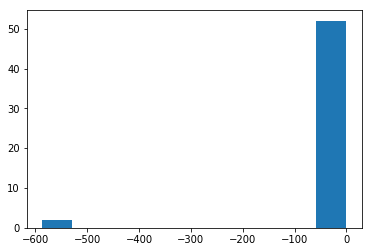

MAX  Blue Line to Gateway TC
9969


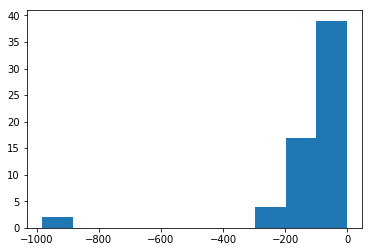

MAX  Blue Line to Gateway TC
10118


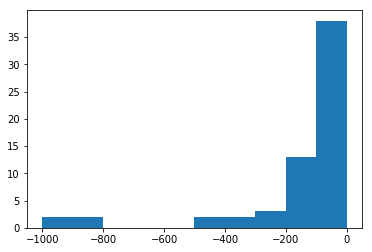

MAX  Blue Line to Gateway TC
10120


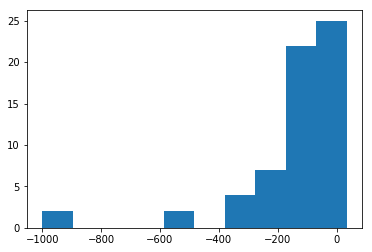

MAX  Blue Line to Gateway TC
12931


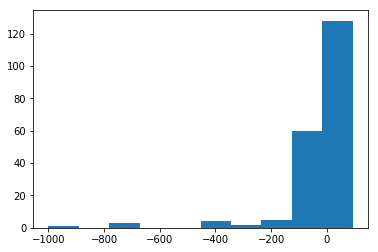

MAX  Blue Line to Gresham
8333


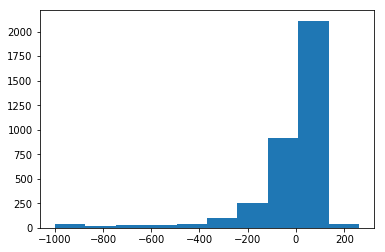

MAX  Blue Line to Gresham
8334


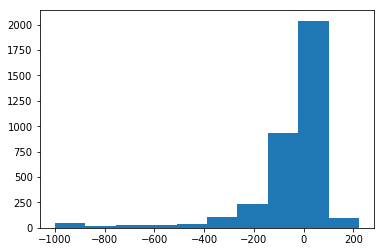

MAX  Blue Line to Gresham
8335


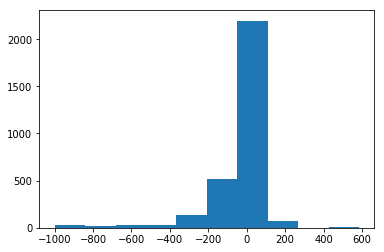

MAX  Blue Line to Gresham
8336


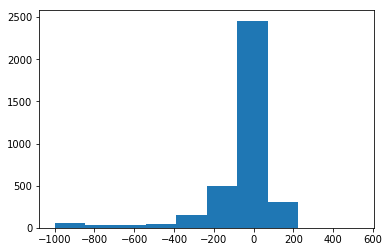

MAX  Blue Line to Gresham
8337


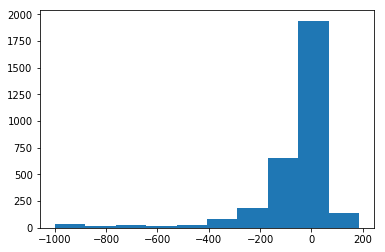

MAX  Blue Line to Gresham
8338


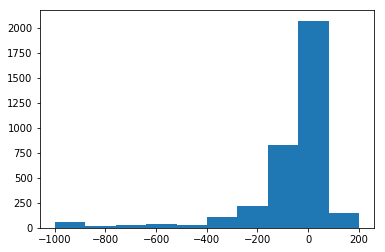

MAX  Blue Line to Gresham
8339


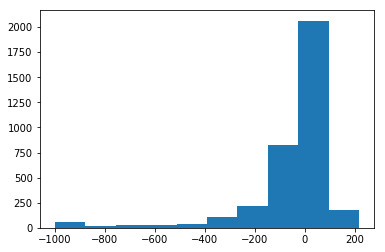

MAX  Blue Line to Gresham
8340


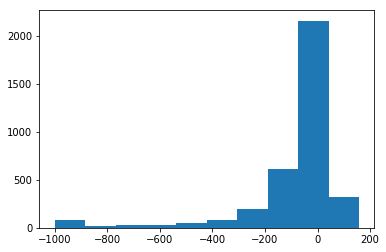

MAX  Blue Line to Gresham
8341


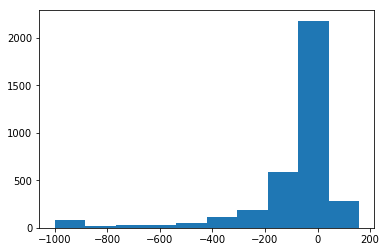

MAX  Blue Line to Gresham
8342


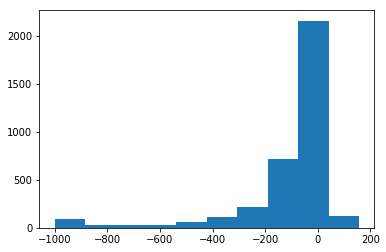

MAX  Blue Line to Gresham
8343


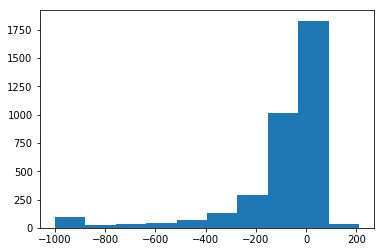

MAX  Blue Line to Gresham
8344


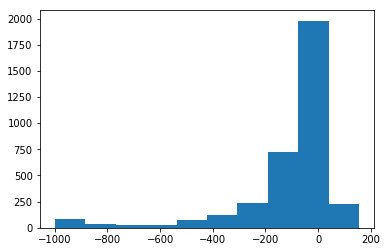

MAX  Blue Line to Gresham
8345


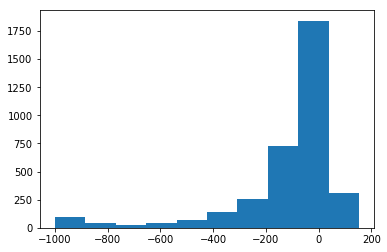

MAX  Blue Line to Gresham
8346


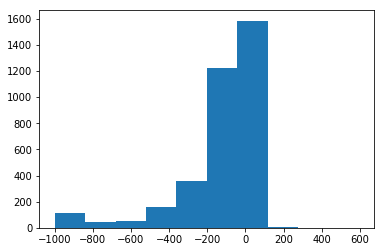

MAX  Blue Line to Gresham
8347


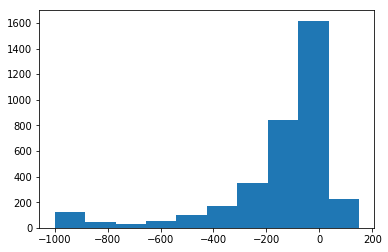

MAX  Blue Line to Gresham
8348


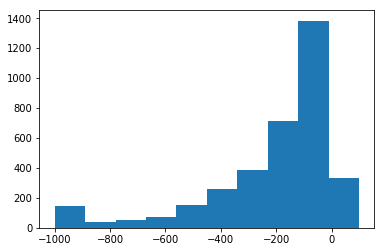

MAX  Blue Line to Gresham
8349


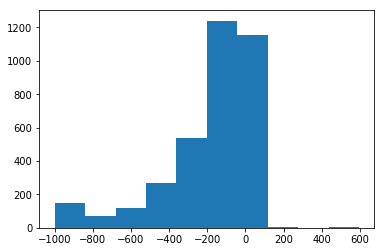

MAX  Blue Line to Gresham
8350


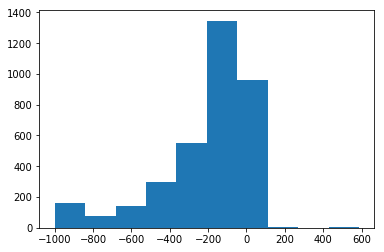

MAX  Blue Line to Gresham
8351


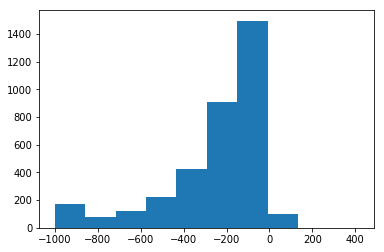

MAX  Blue Line to Gresham
8352


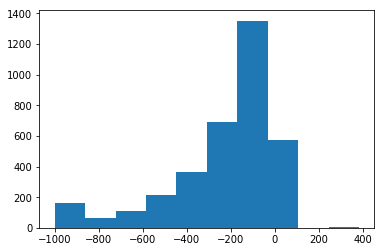

MAX  Blue Line to Gresham
8353


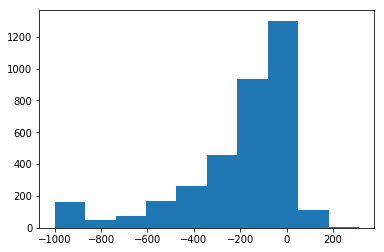

MAX  Blue Line to Gresham
8354


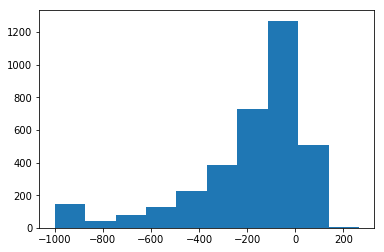

MAX  Blue Line to Gresham
8355


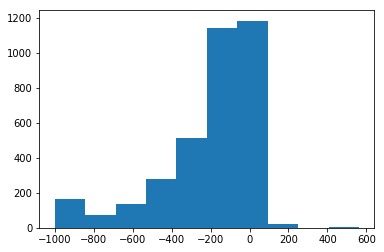

MAX  Blue Line to Gresham
8356


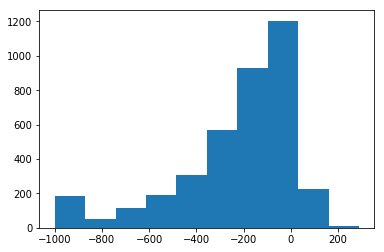

MAX  Blue Line to Gresham
8357


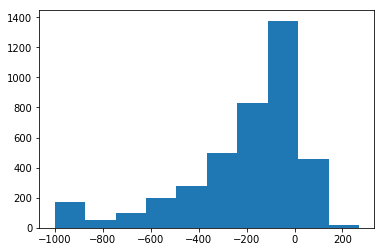

MAX  Blue Line to Gresham
8359


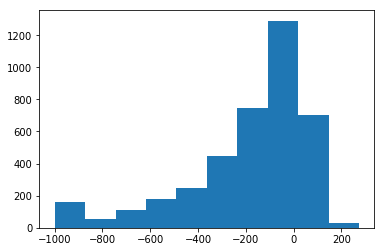

MAX  Blue Line to Gresham
9758


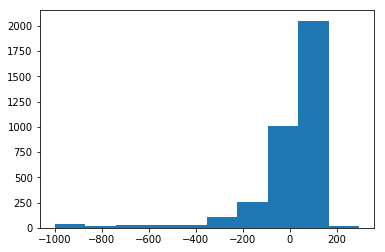

MAX  Blue Line to Gresham
9759


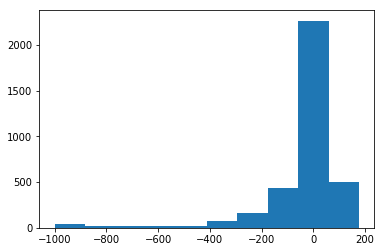

MAX  Blue Line to Gresham
9821


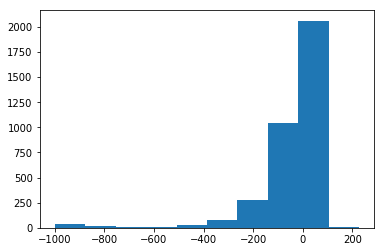

MAX  Blue Line to Gresham
9822


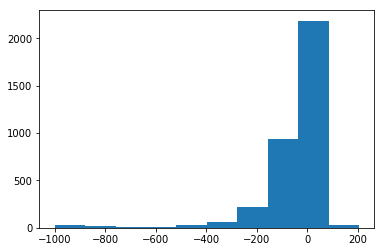

MAX  Blue Line to Gresham
9824


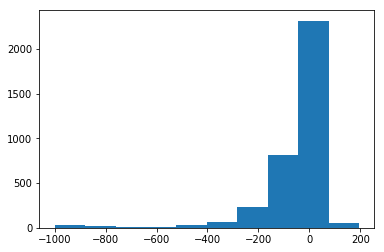

MAX  Blue Line to Gresham
9826


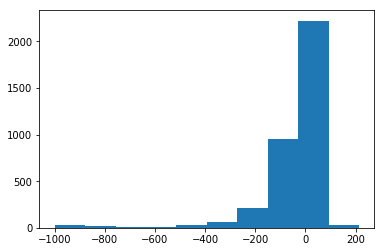

MAX  Blue Line to Gresham
9828


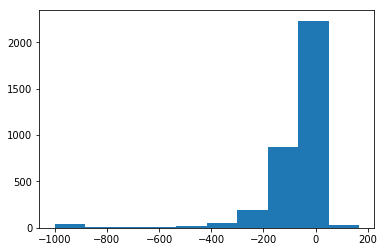

MAX  Blue Line to Gresham
9830


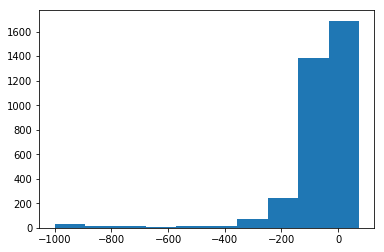

MAX  Blue Line to Gresham
9831


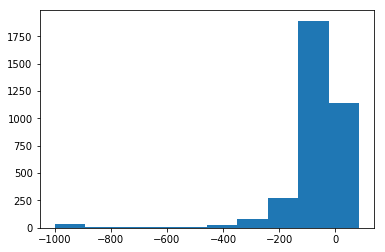

MAX  Blue Line to Gresham
9834


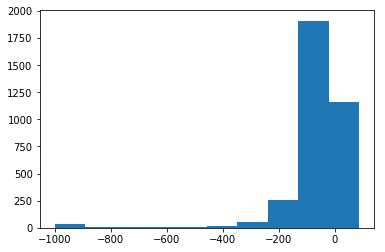

MAX  Blue Line to Gresham
9835


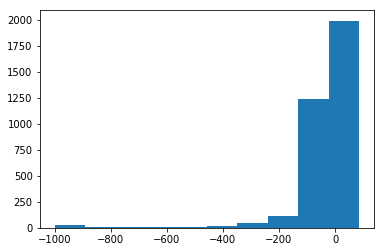

MAX  Blue Line to Gresham
9838


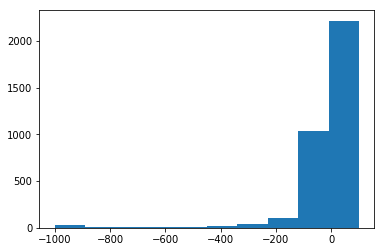

MAX  Blue Line to Gresham
9839


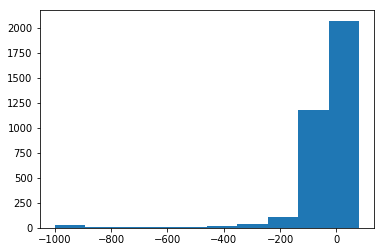

MAX  Blue Line to Gresham
9841


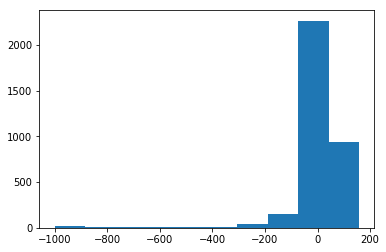

MAX  Blue Line to Gresham
9843


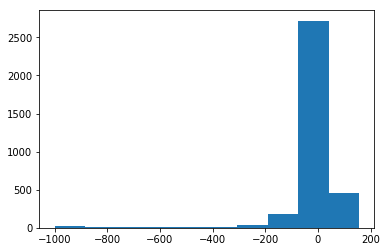

MAX  Blue Line to Gresham
9846


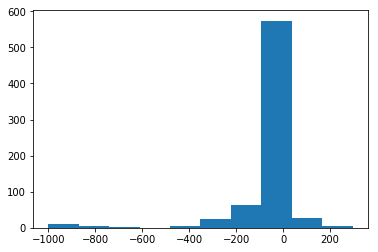

MAX  Blue Line to Gresham
9848


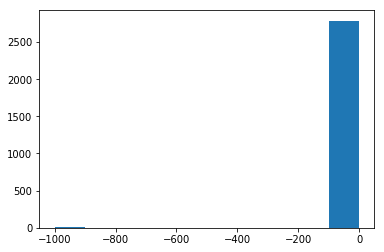

MAX  Blue Line to Gresham
9969


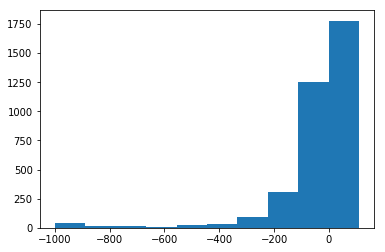

MAX  Blue Line to Gresham
10118


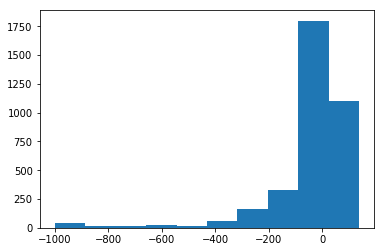

MAX  Blue Line to Gresham
10120


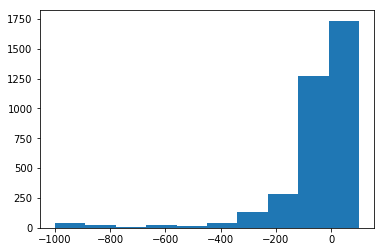

MAX  Blue Line to Gresham
13450


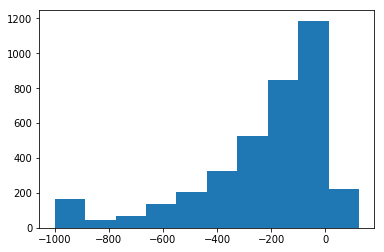

MAX  Blue Line to Hillsboro
8359


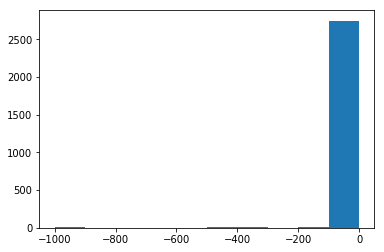

MAX  Blue Line to Hillsboro
8360


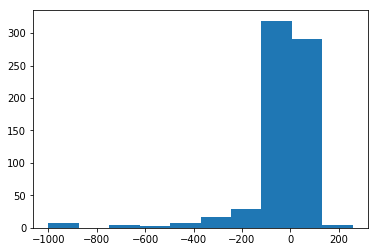

MAX  Blue Line to Hillsboro
8361


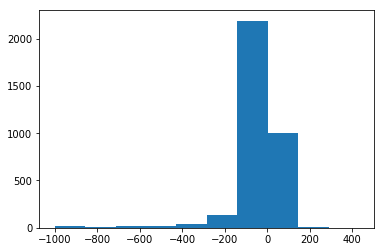

MAX  Blue Line to Hillsboro
8362


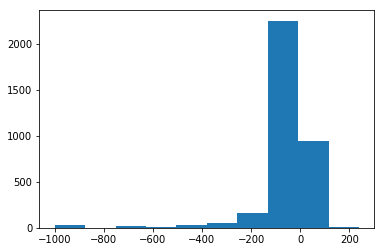

MAX  Blue Line to Hillsboro
8363


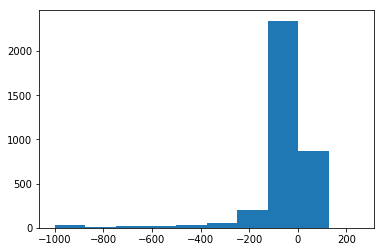

MAX  Blue Line to Hillsboro
8364


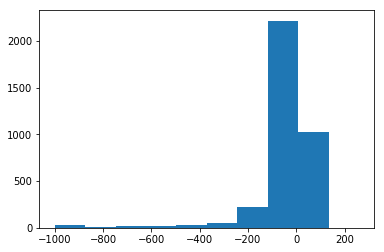

MAX  Blue Line to Hillsboro
8365


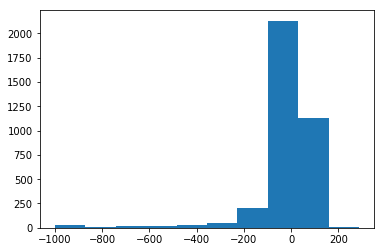

MAX  Blue Line to Hillsboro
8366


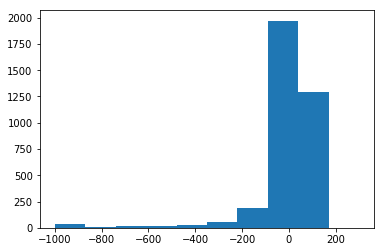

MAX  Blue Line to Hillsboro
8367


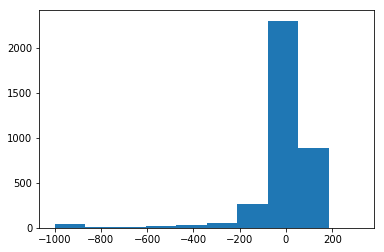

MAX  Blue Line to Hillsboro
8368


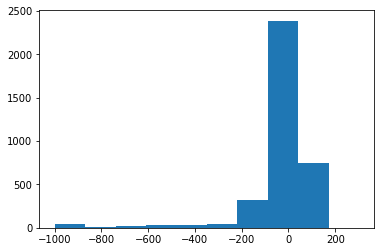

MAX  Blue Line to Hillsboro
8369


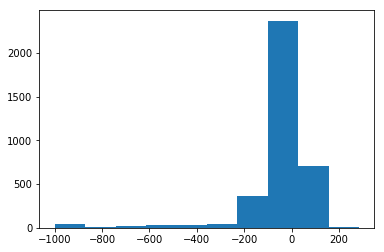

MAX  Blue Line to Hillsboro
8370


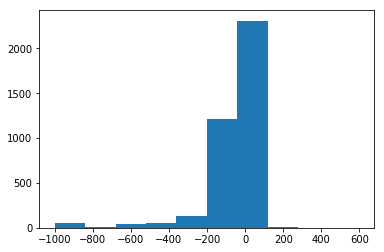

MAX  Blue Line to Hillsboro
8371


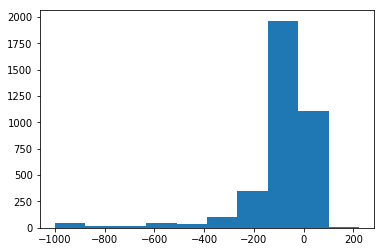

MAX  Blue Line to Hillsboro
8372


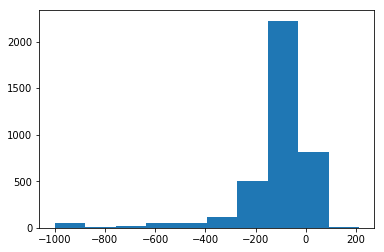

MAX  Blue Line to Hillsboro
8373


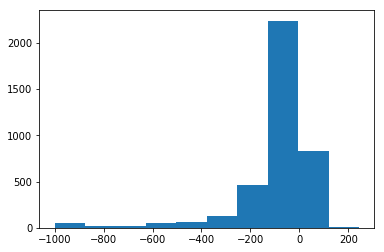

MAX  Blue Line to Hillsboro
8374


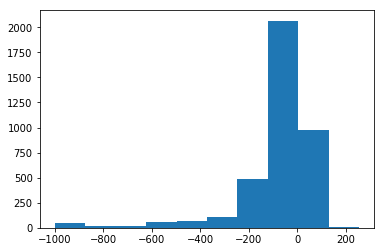

MAX  Blue Line to Hillsboro
8375


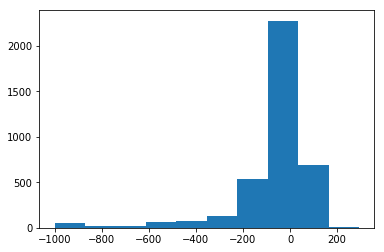

MAX  Blue Line to Hillsboro
8376


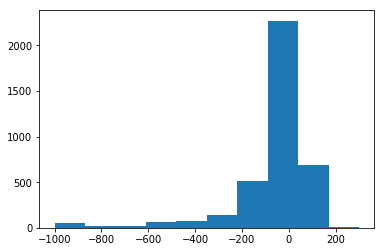

MAX  Blue Line to Hillsboro
8377


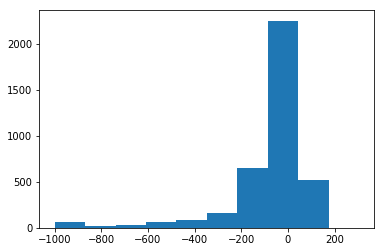

MAX  Blue Line to Hillsboro
8378


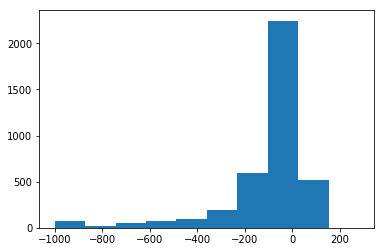

MAX  Blue Line to Hillsboro
8379


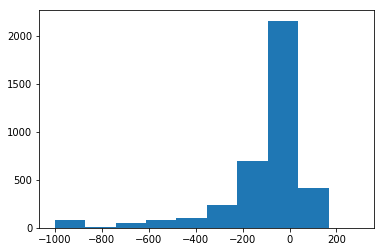

MAX  Blue Line to Hillsboro
8380


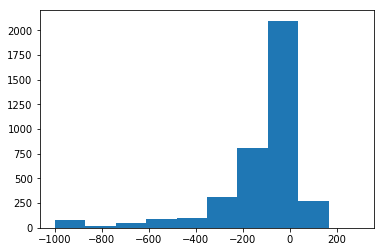

MAX  Blue Line to Hillsboro
8381


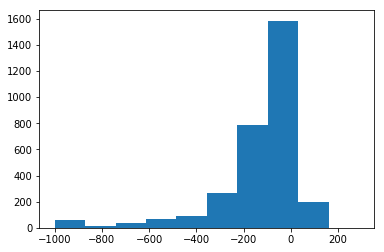

MAX  Blue Line to Hillsboro
8382


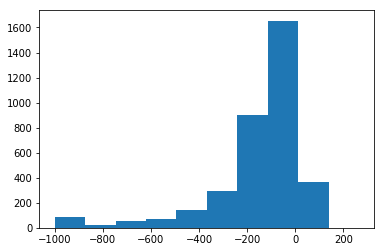

MAX  Blue Line to Hillsboro
8383


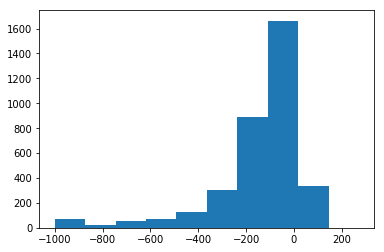

MAX  Blue Line to Hillsboro
8384


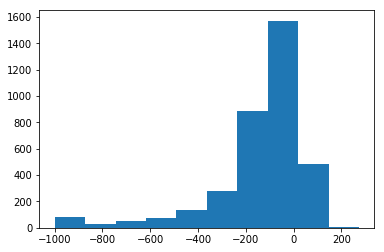

MAX  Blue Line to Hillsboro
9624


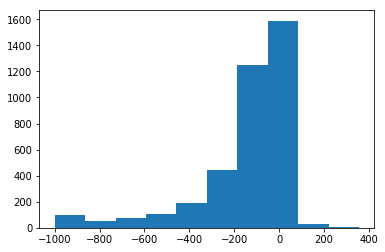

MAX  Blue Line to Hillsboro
9757


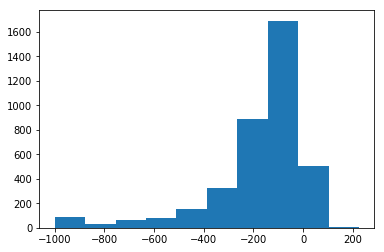

MAX  Blue Line to Hillsboro
9818


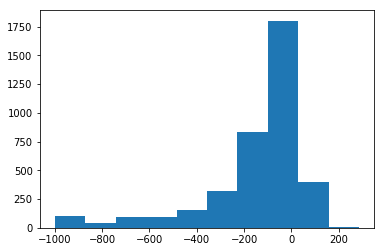

MAX  Blue Line to Hillsboro
9819


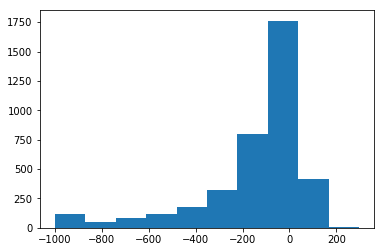

MAX  Blue Line to Hillsboro
9820


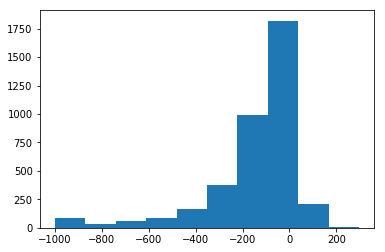

MAX  Blue Line to Hillsboro
9823


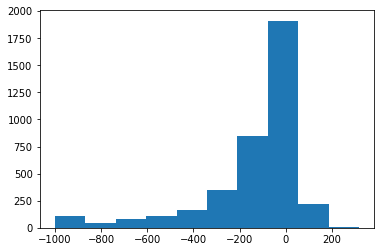

MAX  Blue Line to Hillsboro
9825


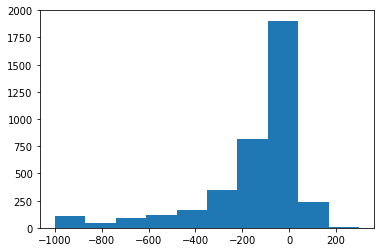

MAX  Blue Line to Hillsboro
9827


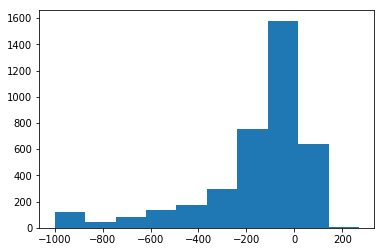

MAX  Blue Line to Hillsboro
9829


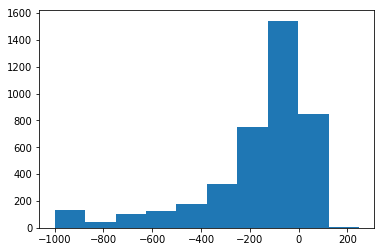

MAX  Blue Line to Hillsboro
9832


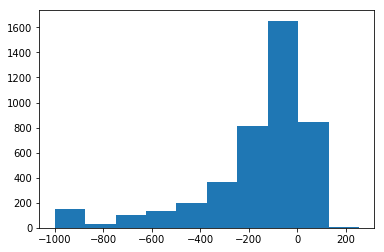

MAX  Blue Line to Hillsboro
9833


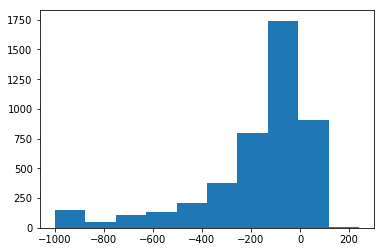

MAX  Blue Line to Hillsboro
9836


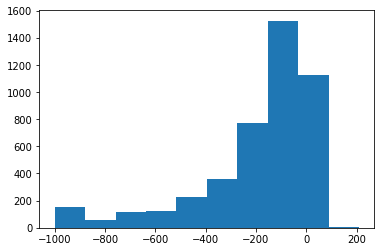

MAX  Blue Line to Hillsboro
9837


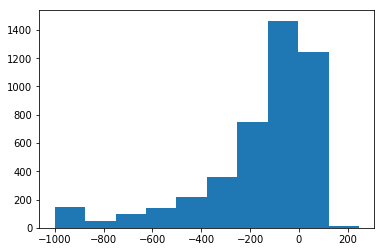

MAX  Blue Line to Hillsboro
9840


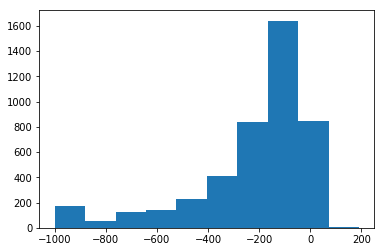

MAX  Blue Line to Hillsboro
9842


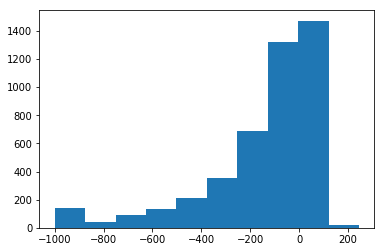

MAX  Blue Line to Hillsboro
9844


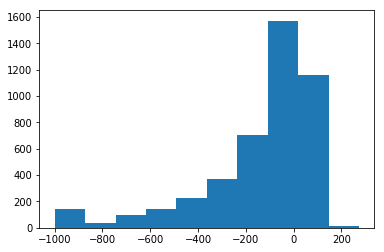

MAX  Blue Line to Hillsboro
9845


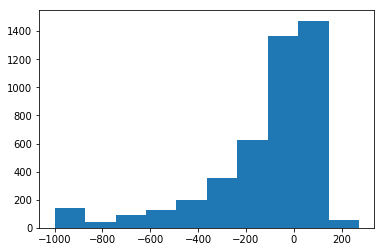

MAX  Blue Line to Hillsboro
9848


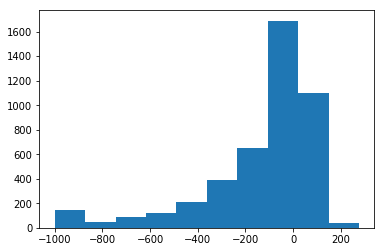

MAX  Blue Line to Hillsboro
10117


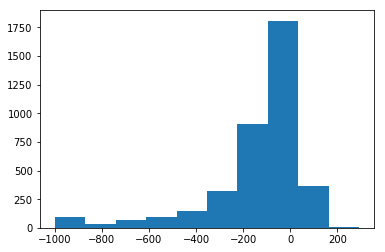

MAX  Blue Line to Hillsboro
10121


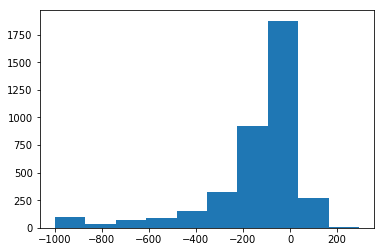

MAX  Blue Line to Hillsboro
13449


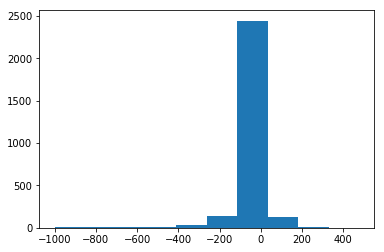

MAX  Blue Line to Rose Qtr
8362


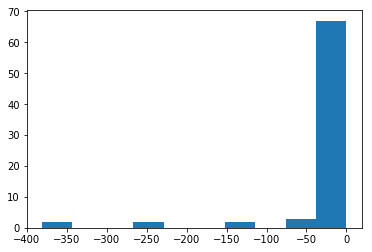

MAX  Blue Line to Rose Qtr
8363


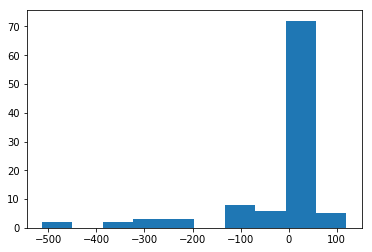

MAX  Blue Line to Rose Qtr
8364


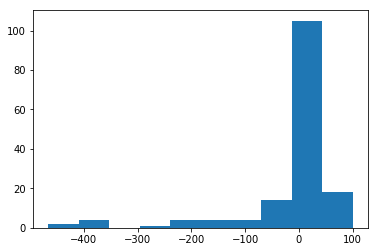

MAX  Blue Line to Rose Qtr
8365


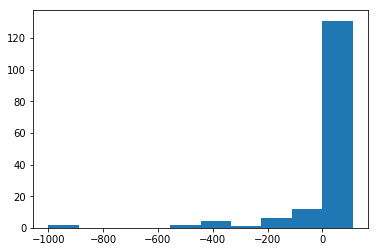

MAX  Blue Line to Rose Qtr
8366


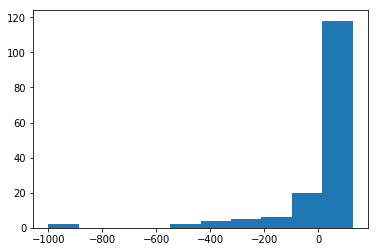

MAX  Blue Line to Rose Qtr
8367


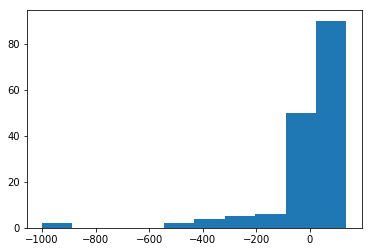

MAX  Blue Line to Rose Qtr
8368


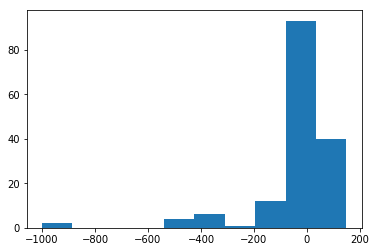

MAX  Blue Line to Rose Qtr
8369


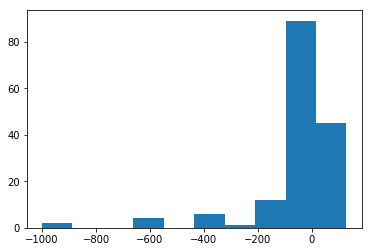

MAX  Blue Line to Rose Qtr
8370


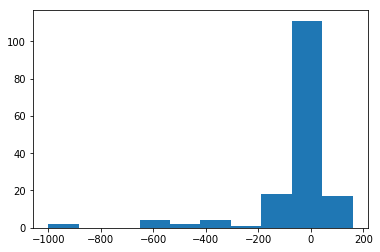

MAX  Blue Line to Rose Qtr
8371


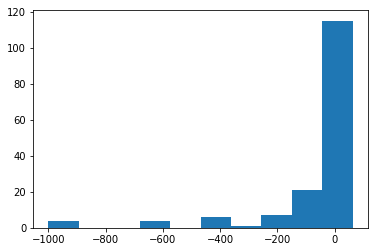

MAX  Blue Line to Rose Qtr
8372


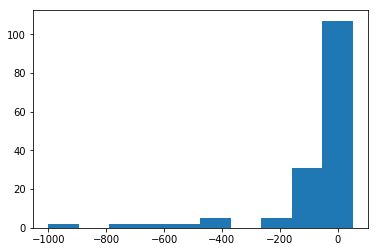

MAX  Blue Line to Rose Qtr
8373


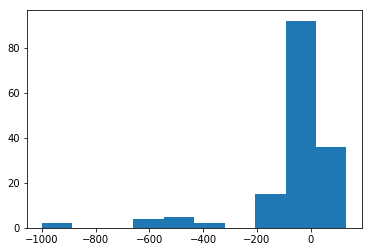

MAX  Blue Line to Rose Qtr
8374


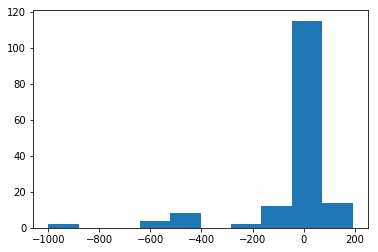

MAX  Blue Line to Rose Qtr
8375


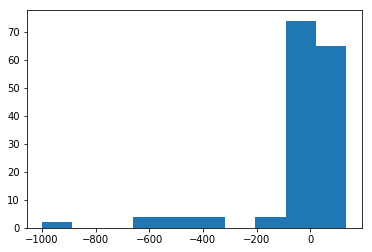

MAX  Blue Line to Rose Qtr
8376


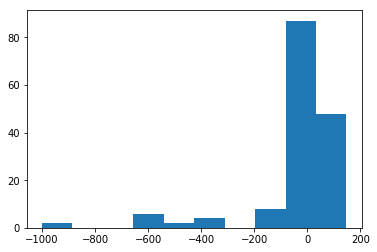

MAX  Blue Line to Rose Qtr
8377


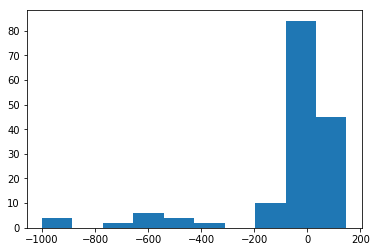

MAX  Blue Line to Rose Qtr
13701


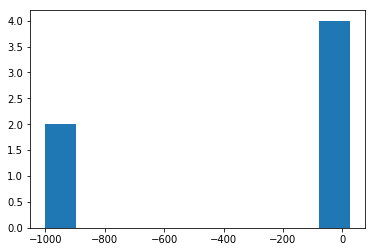

MAX  Blue Line to Ruby Junction/E 197th Ave
8333


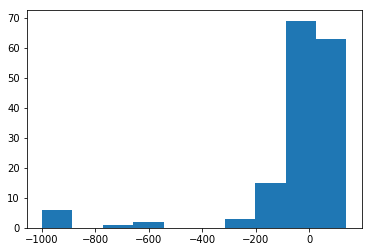

MAX  Blue Line to Ruby Junction/E 197th Ave
8334


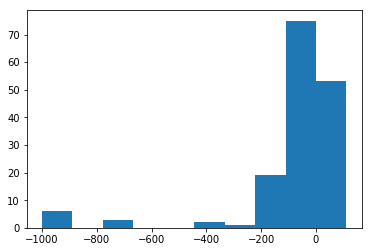

MAX  Blue Line to Ruby Junction/E 197th Ave
8335


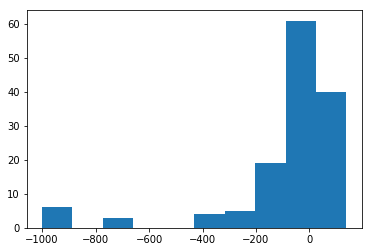

MAX  Blue Line to Ruby Junction/E 197th Ave
8336


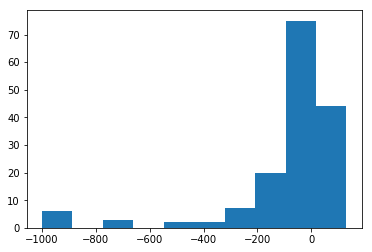

MAX  Blue Line to Ruby Junction/E 197th Ave
8337


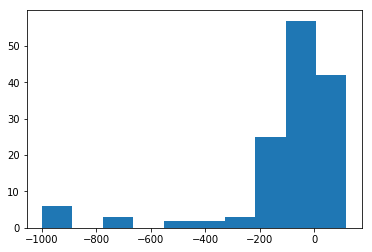

MAX  Blue Line to Ruby Junction/E 197th Ave
8338


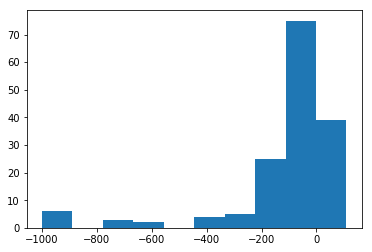

MAX  Blue Line to Ruby Junction/E 197th Ave
8339


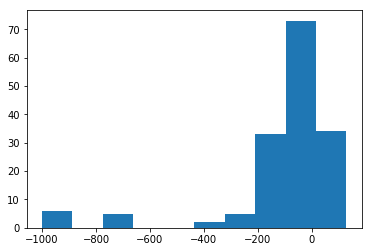

MAX  Blue Line to Ruby Junction/E 197th Ave
8340


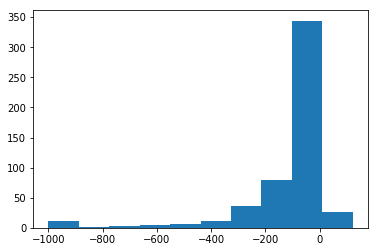

MAX  Blue Line to Ruby Junction/E 197th Ave
8341


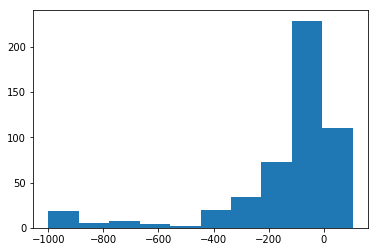

MAX  Blue Line to Ruby Junction/E 197th Ave
8342


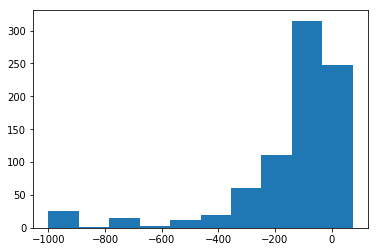

MAX  Blue Line to Ruby Junction/E 197th Ave
8343


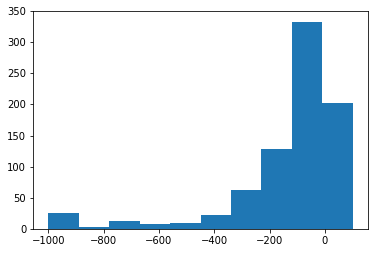

MAX  Blue Line to Ruby Junction/E 197th Ave
8344


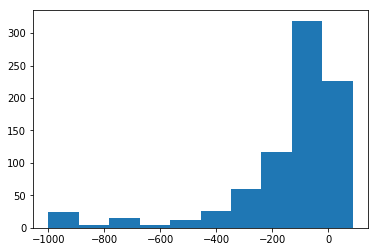

MAX  Blue Line to Ruby Junction/E 197th Ave
8345


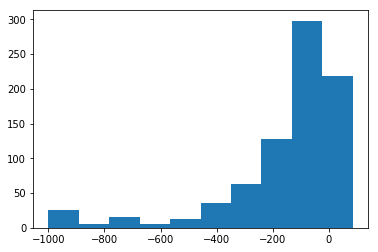

MAX  Blue Line to Ruby Junction/E 197th Ave
8346


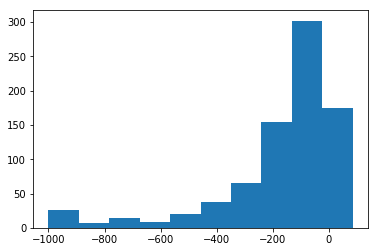

MAX  Blue Line to Ruby Junction/E 197th Ave
8347


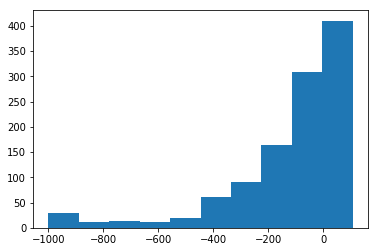

MAX  Blue Line to Ruby Junction/E 197th Ave
8348


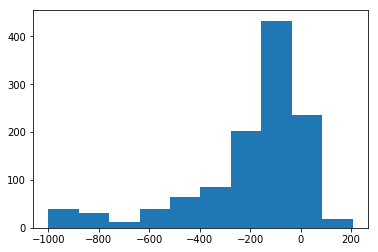

MAX  Blue Line to Ruby Junction/E 197th Ave
8349


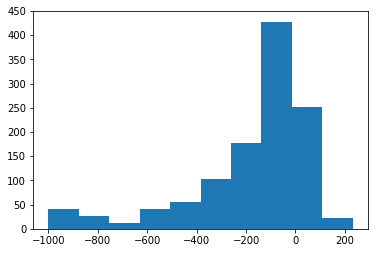

MAX  Blue Line to Ruby Junction/E 197th Ave
8350


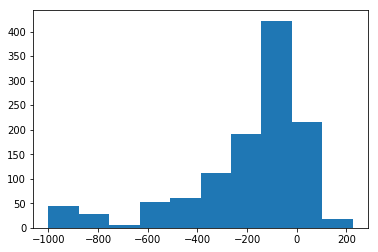

MAX  Blue Line to Ruby Junction/E 197th Ave
8351


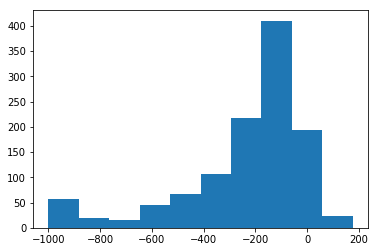

MAX  Blue Line to Ruby Junction/E 197th Ave
8352


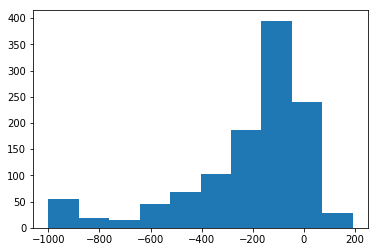

MAX  Blue Line to Ruby Junction/E 197th Ave
8353


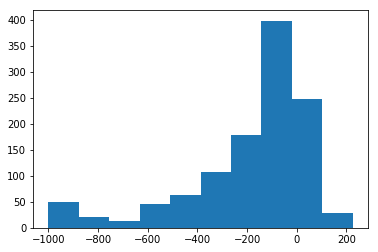

MAX  Blue Line to Ruby Junction/E 197th Ave
8354


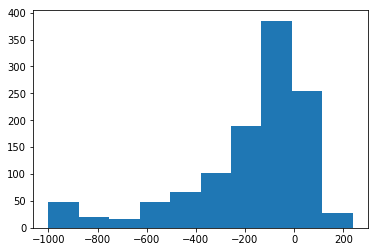

MAX  Blue Line to Ruby Junction/E 197th Ave
8355


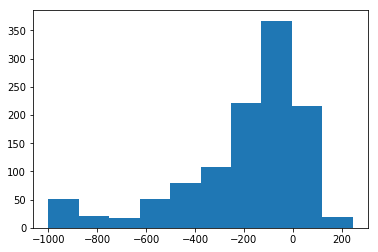

MAX  Blue Line to Ruby Junction/E 197th Ave
9758


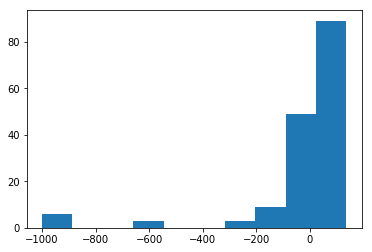

MAX  Blue Line to Ruby Junction/E 197th Ave
9759


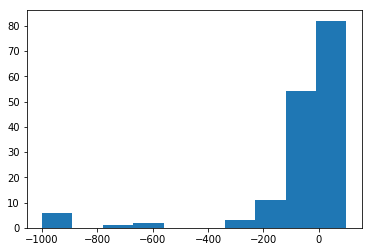

MAX  Blue Line to Ruby Junction/E 197th Ave
9821


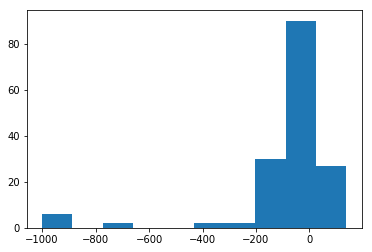

MAX  Blue Line to Ruby Junction/E 197th Ave
9822


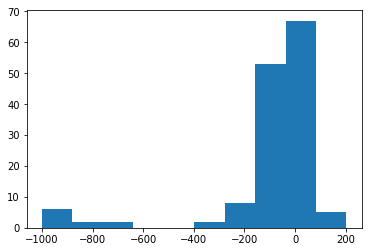

MAX  Blue Line to Ruby Junction/E 197th Ave
9824


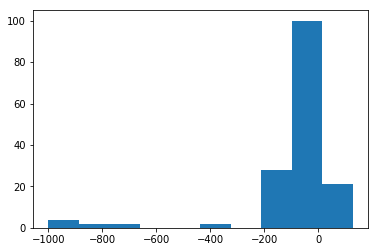

MAX  Blue Line to Ruby Junction/E 197th Ave
9826


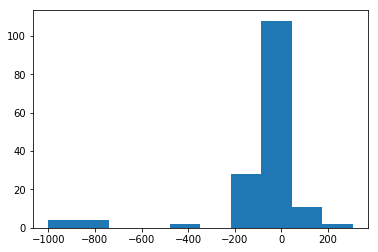

MAX  Blue Line to Ruby Junction/E 197th Ave
9828


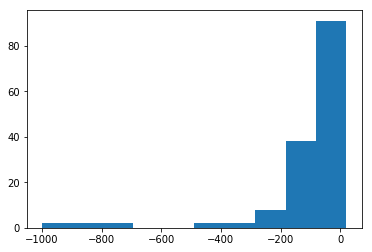

MAX  Blue Line to Ruby Junction/E 197th Ave
9830


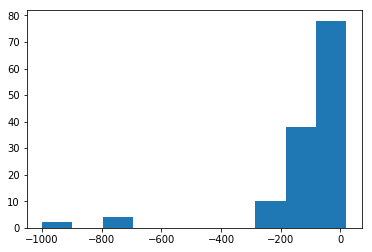

MAX  Blue Line to Ruby Junction/E 197th Ave
9831


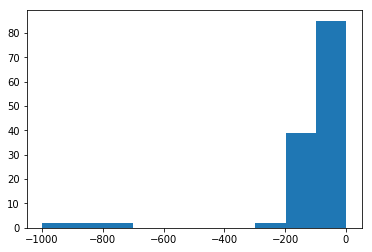

MAX  Blue Line to Ruby Junction/E 197th Ave
9834


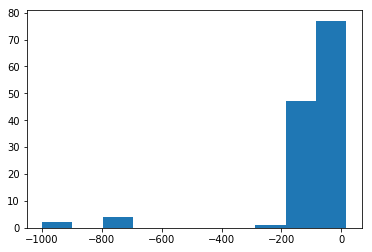

MAX  Blue Line to Ruby Junction/E 197th Ave
9835


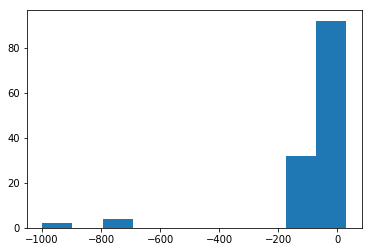

MAX  Blue Line to Ruby Junction/E 197th Ave
9838


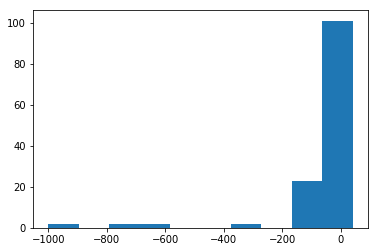

MAX  Blue Line to Ruby Junction/E 197th Ave
9839


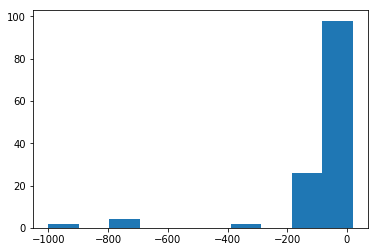

MAX  Blue Line to Ruby Junction/E 197th Ave
9841


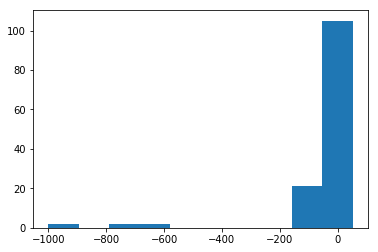

MAX  Blue Line to Ruby Junction/E 197th Ave
9843


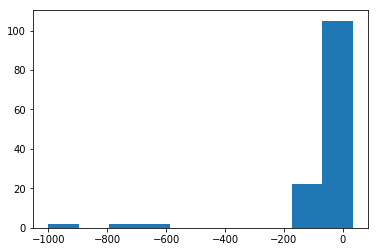

MAX  Blue Line to Ruby Junction/E 197th Ave
9846


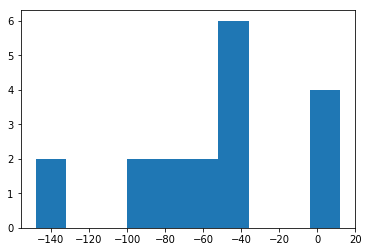

MAX  Blue Line to Ruby Junction/E 197th Ave
9848


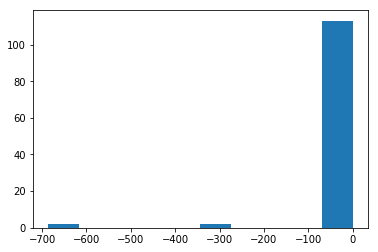

MAX  Blue Line to Ruby Junction/E 197th Ave
9969


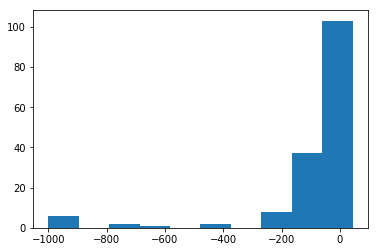

MAX  Blue Line to Ruby Junction/E 197th Ave
10118


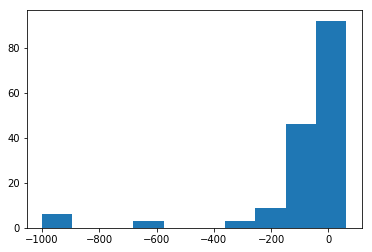

MAX  Blue Line to Ruby Junction/E 197th Ave
10120


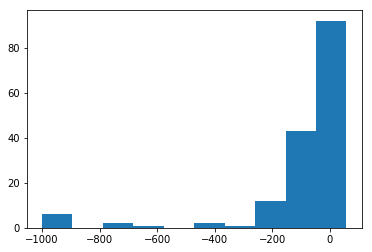

MAX  Blue Line to Ruby Junction/E 197th Ave
13803


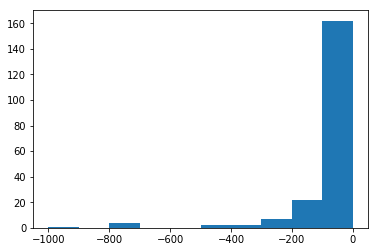

MAX  Blue Line to Willow Creek/SW 185th Ave
8370


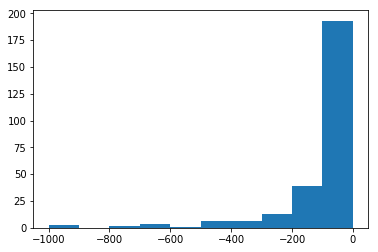

MAX  Blue Line to Willow Creek/SW 185th Ave
8371


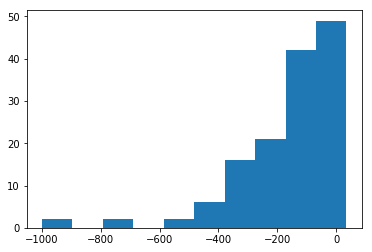

MAX  Blue Line to Willow Creek/SW 185th Ave
8372


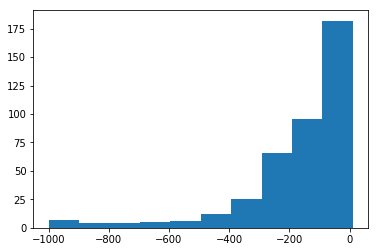

MAX  Blue Line to Willow Creek/SW 185th Ave
8373


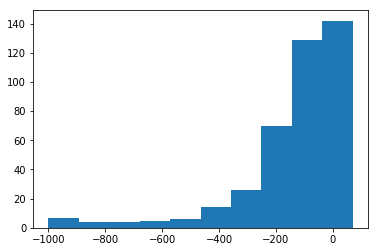

MAX  Blue Line to Willow Creek/SW 185th Ave
8374


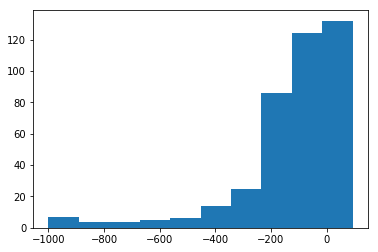

MAX  Blue Line to Willow Creek/SW 185th Ave
8375


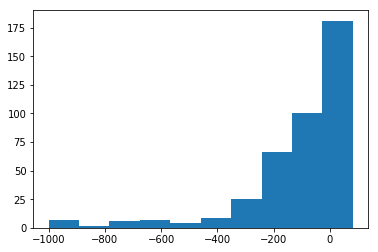

MAX  Blue Line to Willow Creek/SW 185th Ave
8376


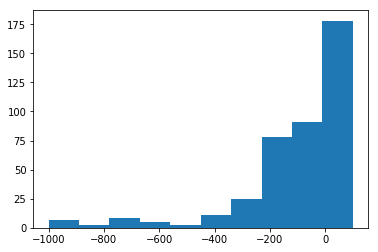

MAX  Blue Line to Willow Creek/SW 185th Ave
8377


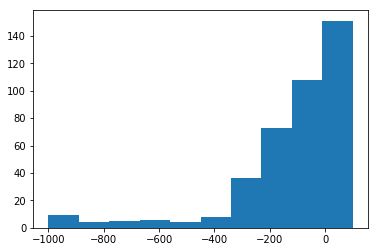

MAX  Blue Line to Willow Creek/SW 185th Ave
8378


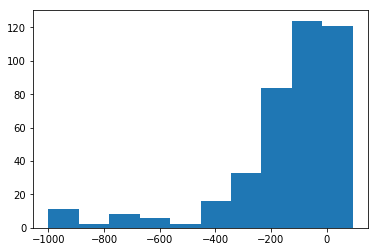

MAX  Blue Line to Willow Creek/SW 185th Ave
8379


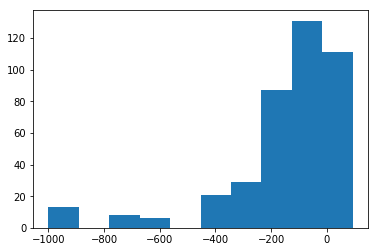

MAX  Blue Line to Willow Creek/SW 185th Ave
8380


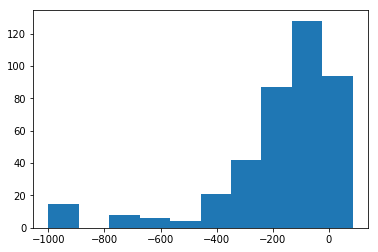

MAX  Blue Line to Willow Creek/SW 185th Ave
8381


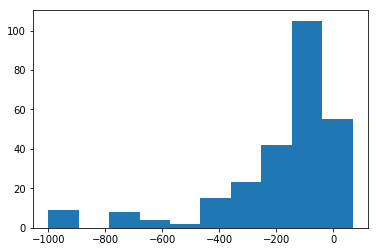

MAX  Blue Line to Willow Creek/SW 185th Ave
8382


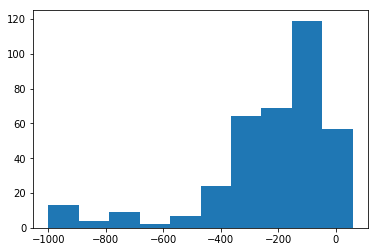

MAX  Blue Line to Willow Creek/SW 185th Ave
8383


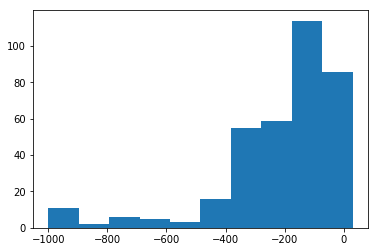

MAX  Blue Line to Willow Creek/SW 185th Ave
8384


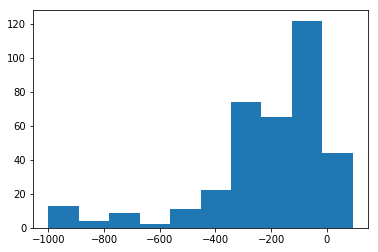

MAX  Blue Line to Willow Creek/SW 185th Ave
9624


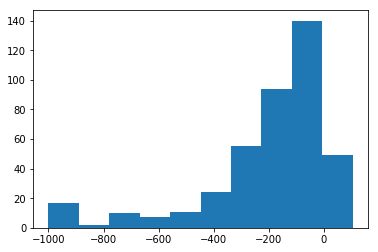

MAX  Blue Line to Willow Creek/SW 185th Ave
9757


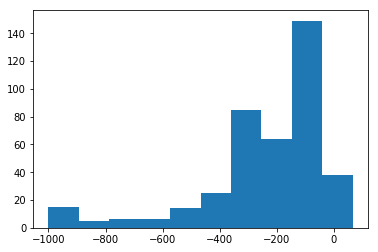

MAX  Blue Line to Willow Creek/SW 185th Ave
9818


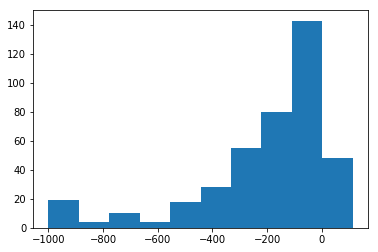

MAX  Blue Line to Willow Creek/SW 185th Ave
9819


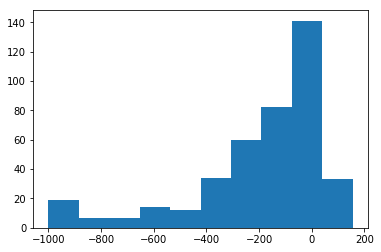

MAX  Blue Line to Willow Creek/SW 185th Ave
9820


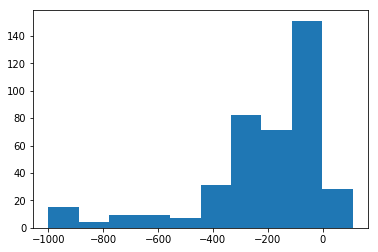

MAX  Blue Line to Willow Creek/SW 185th Ave
9823


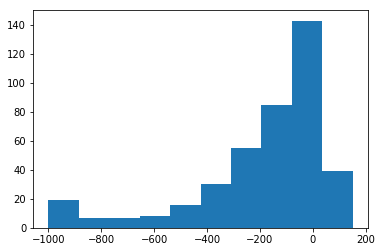

MAX  Blue Line to Willow Creek/SW 185th Ave
9825


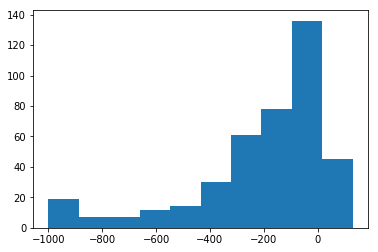

MAX  Blue Line to Willow Creek/SW 185th Ave
9827


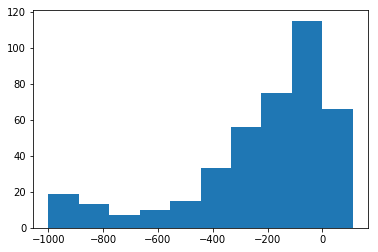

MAX  Blue Line to Willow Creek/SW 185th Ave
9829


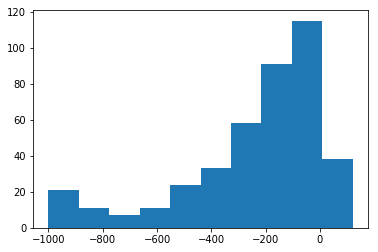

MAX  Blue Line to Willow Creek/SW 185th Ave
9832


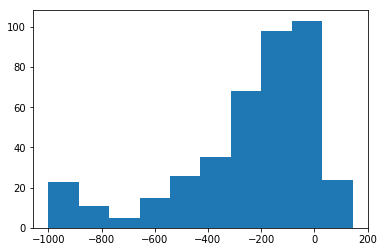

MAX  Blue Line to Willow Creek/SW 185th Ave
10117


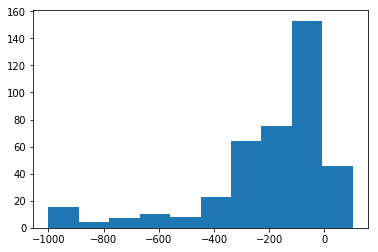

MAX  Blue Line to Willow Creek/SW 185th Ave
10121


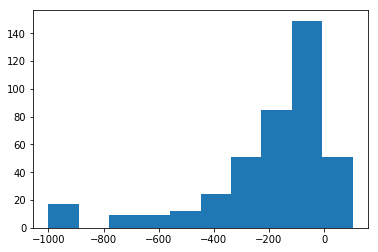

MAX  Green Line to City Center/PSU
7601


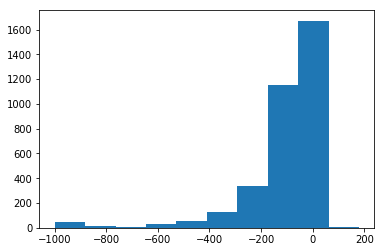

MAX  Green Line to City Center/PSU
7606


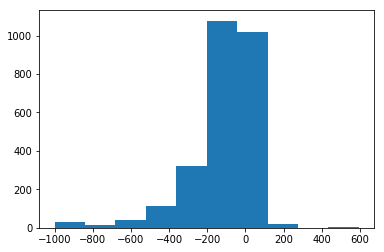

MAX  Green Line to City Center/PSU
7608


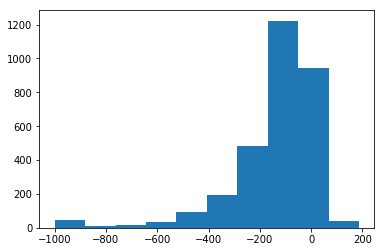

MAX  Green Line to City Center/PSU
7618


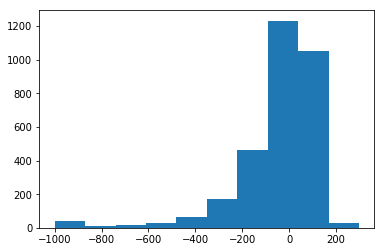

MAX  Green Line to City Center/PSU
7627


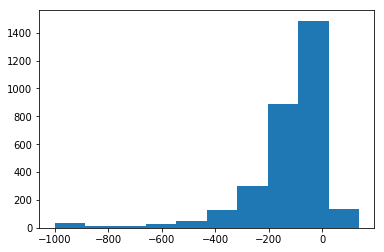

MAX  Green Line to City Center/PSU
7646


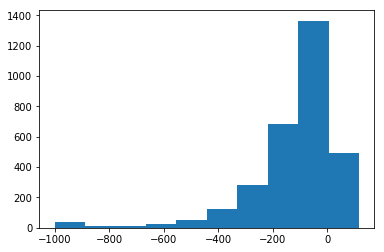

MAX  Green Line to City Center/PSU
8370


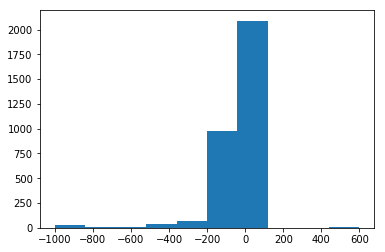

MAX  Green Line to City Center/PSU
8371


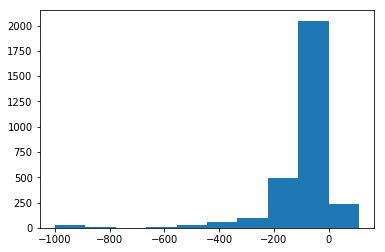

MAX  Green Line to City Center/PSU
8372


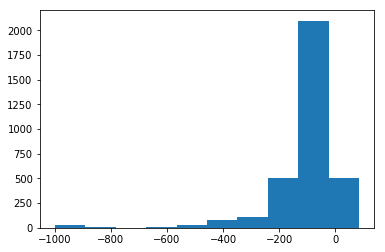

MAX  Green Line to City Center/PSU
8373


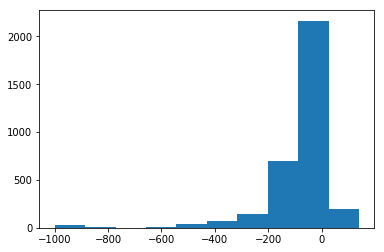

MAX  Green Line to City Center/PSU
8374


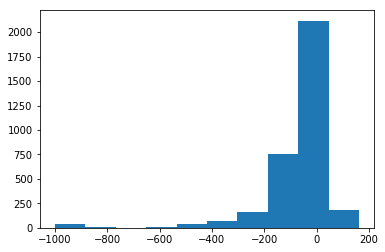

MAX  Green Line to City Center/PSU
8375


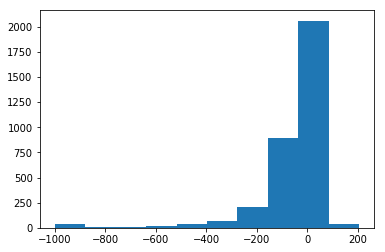

MAX  Green Line to City Center/PSU
8376


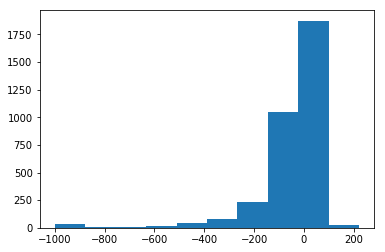

MAX  Green Line to City Center/PSU
8377


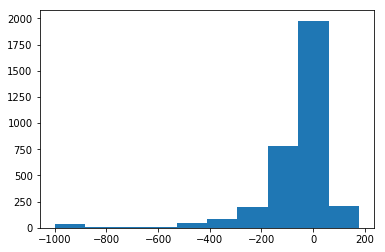

MAX  Green Line to City Center/PSU
9303


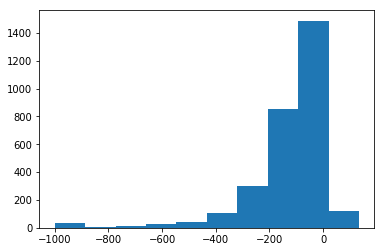

MAX  Green Line to City Center/PSU
13132


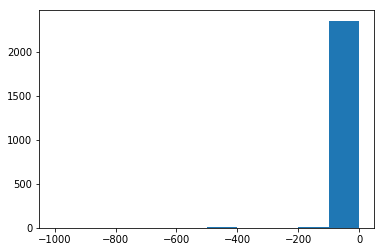

MAX  Green Line to City Center/PSU
13133


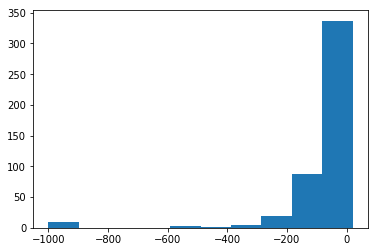

MAX  Green Line to City Center/PSU
13134


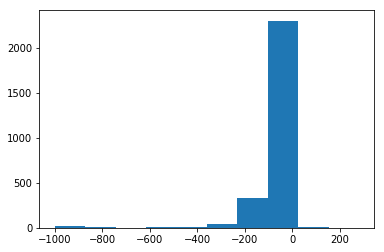

MAX  Green Line to City Center/PSU
13135


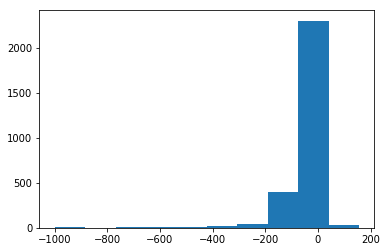

MAX  Green Line to City Center/PSU
13136


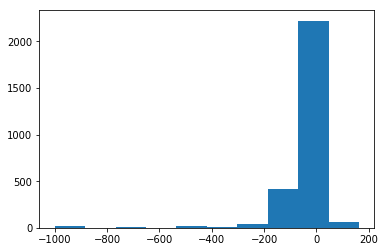

MAX  Green Line to City Center/PSU
13137


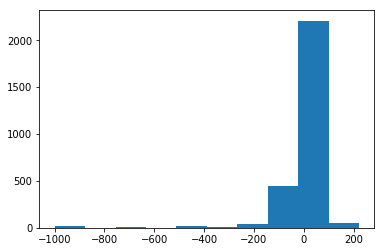

MAX  Green Line to City Center/PSU
13138


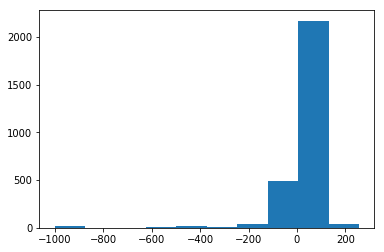

MAX  Green Line to City Center/PSU
13139


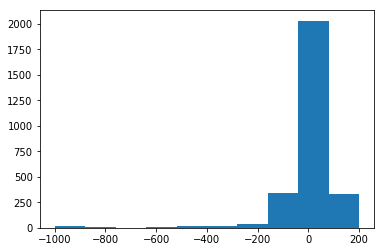

MAX  Green Line to City Center/PSU
13140


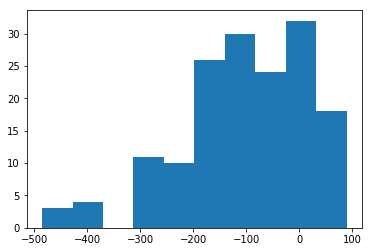

MAX  Green Line to City Center/PSU
13701


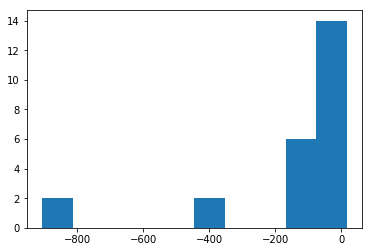

MAX  Green Line to Clackamas Town Center
7763


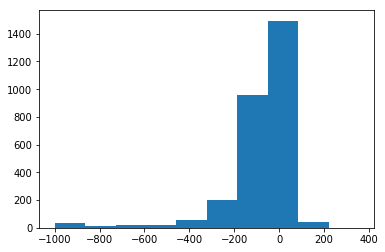

MAX  Green Line to Clackamas Town Center
7774


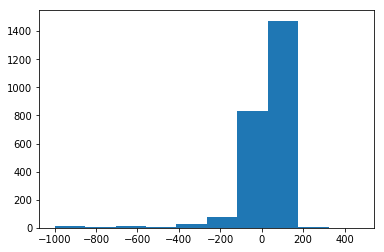

MAX  Green Line to Clackamas Town Center
7777


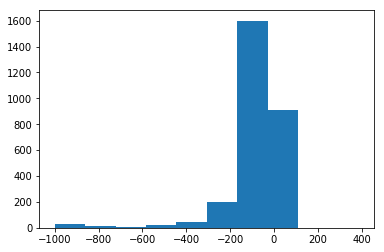

MAX  Green Line to Clackamas Town Center
7787


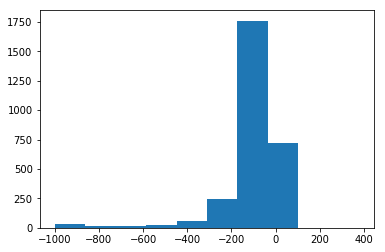

MAX  Green Line to Clackamas Town Center
8340


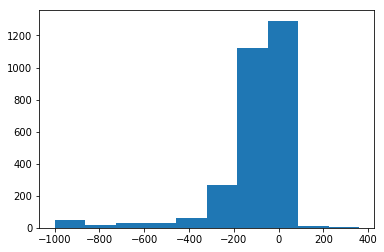

MAX  Green Line to Clackamas Town Center
8341


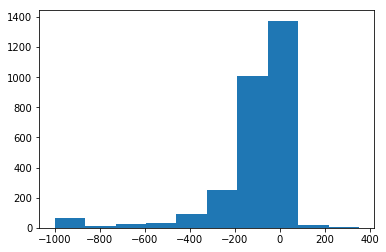

MAX  Green Line to Clackamas Town Center
8342


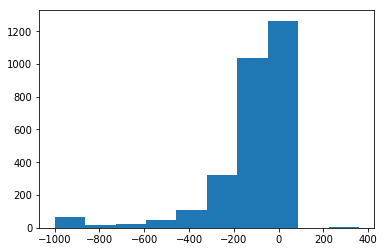

MAX  Green Line to Clackamas Town Center
8343


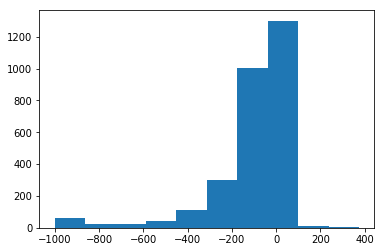

MAX  Green Line to Clackamas Town Center
8344


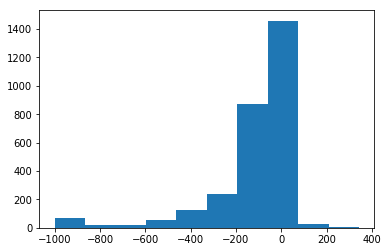

MAX  Green Line to Clackamas Town Center
8345


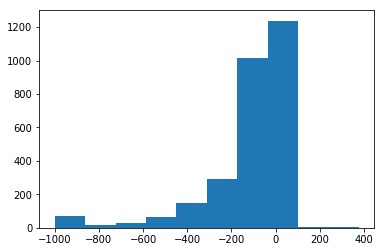

MAX  Green Line to Clackamas Town Center
8346


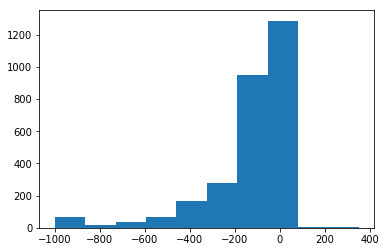

MAX  Green Line to Clackamas Town Center
8347


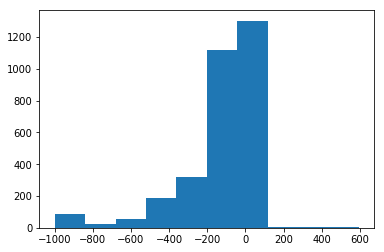

MAX  Green Line to Clackamas Town Center
9299


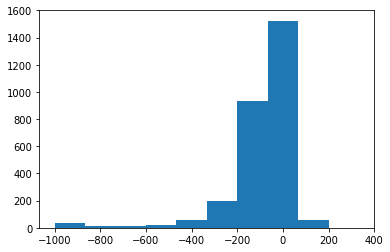

MAX  Green Line to Clackamas Town Center
10293


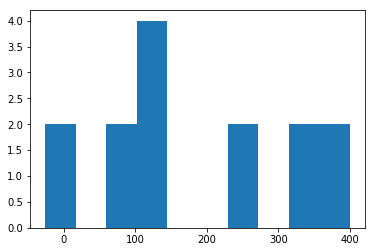

MAX  Green Line to Clackamas Town Center
13123


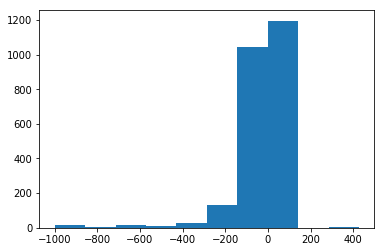

MAX  Green Line to Clackamas Town Center
13124


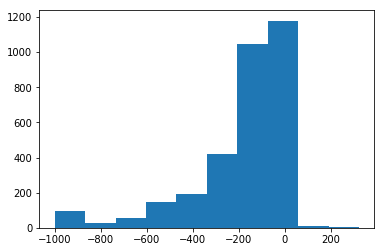

MAX  Green Line to Clackamas Town Center
13125


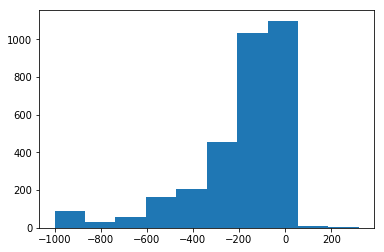

MAX  Green Line to Clackamas Town Center
13126


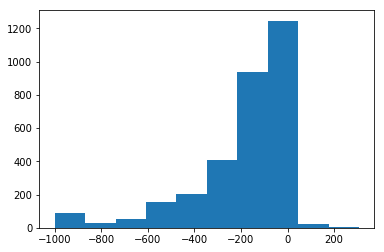

MAX  Green Line to Clackamas Town Center
13127


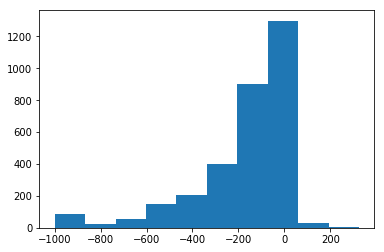

MAX  Green Line to Clackamas Town Center
13128


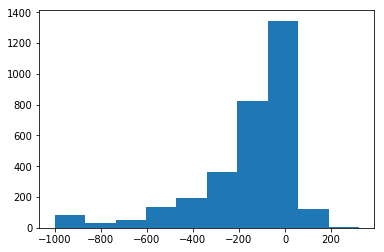

MAX  Green Line to Clackamas Town Center
13129


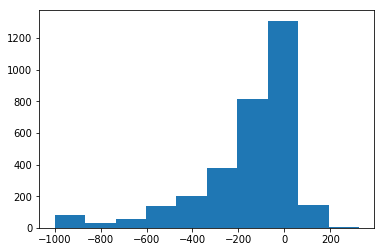

MAX  Green Line to Clackamas Town Center
13130


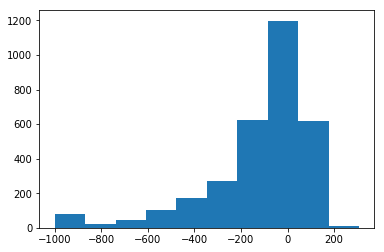

MAX  Green Line to Clackamas Town Center
13132


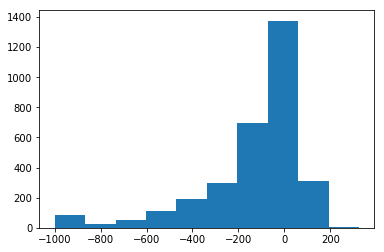

MAX  Green Line to Clackamas Town Center
13140


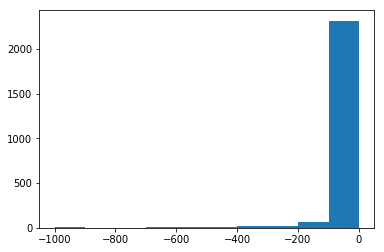

MAX  Green Line to Gateway TC
7763


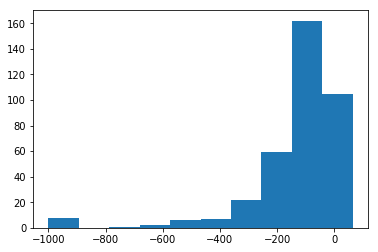

MAX  Green Line to Gateway TC
7774


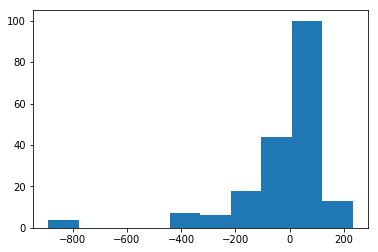

MAX  Green Line to Gateway TC
7777


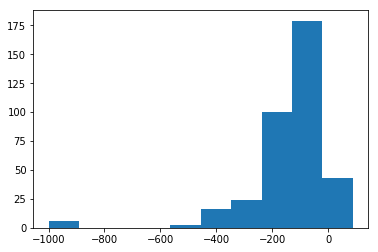

MAX  Green Line to Gateway TC
7787


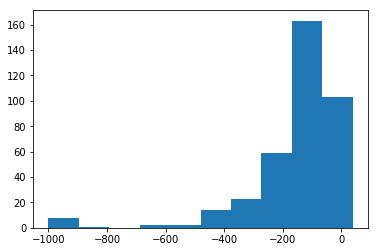

MAX  Green Line to Gateway TC
8340


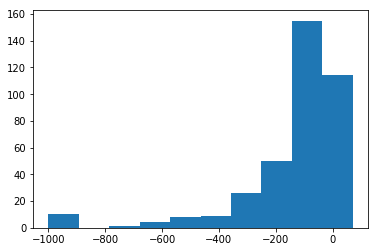

MAX  Green Line to Gateway TC
8370


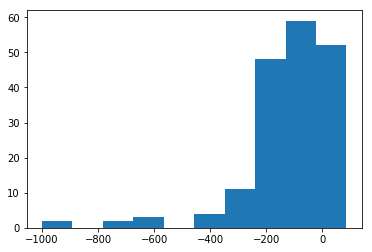

MAX  Green Line to Gateway TC
9299


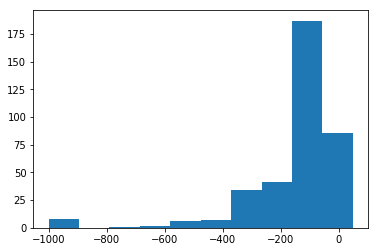

MAX  Green Line to Gateway TC
10293


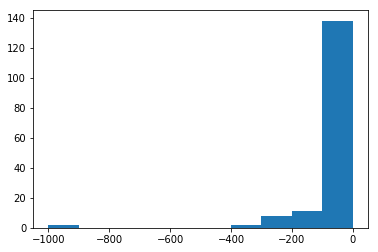

MAX  Green Line to Gateway TC
12931


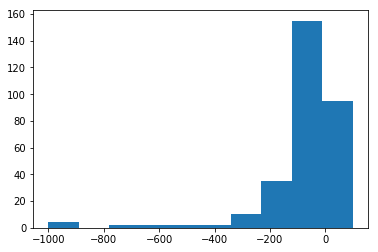

MAX  Green Line to Gateway TC
13123


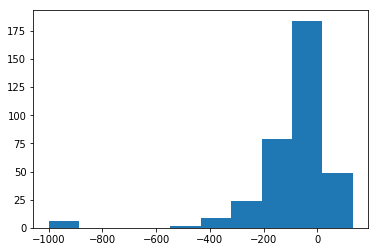

MAX  Green Line to Gateway TC
13132


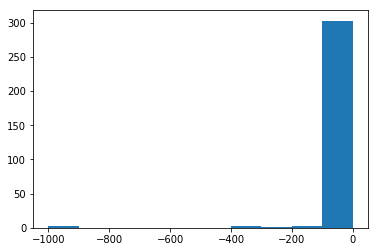

MAX  Green Line to Gateway TC
13133


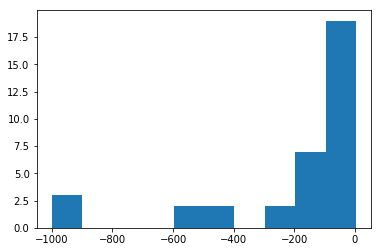

MAX  Green Line to Gateway TC
13134


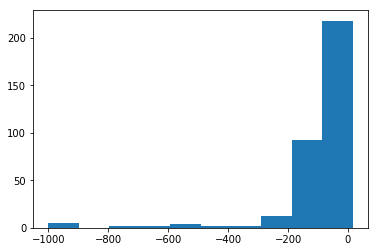

MAX  Green Line to Gateway TC
13135


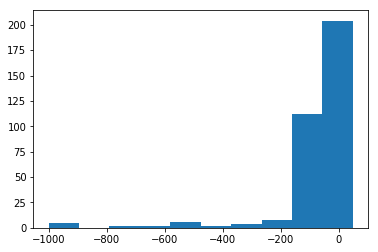

MAX  Green Line to Gateway TC
13136


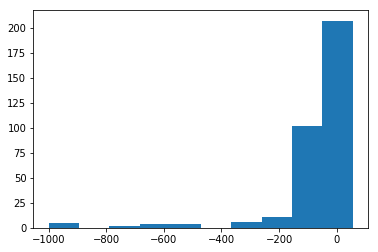

MAX  Green Line to Gateway TC
13137


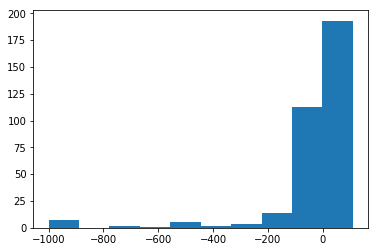

MAX  Green Line to Gateway TC
13138


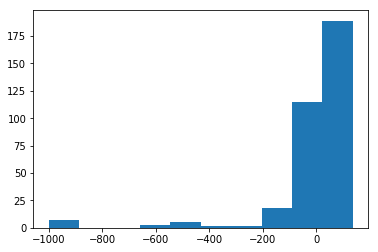

MAX  Green Line to Gateway TC
13139


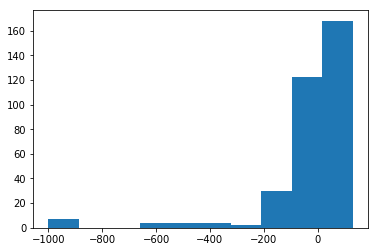

MAX  Green Line to Gateway TC
13140


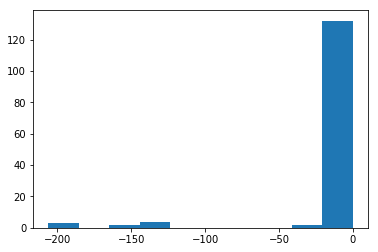

MAX  Orange Line to City Center/Expo Center
10293


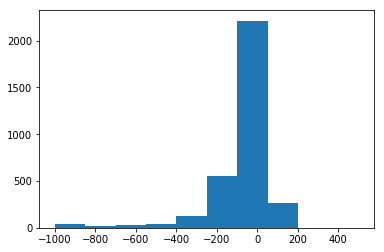

MAX  Orange Line to City Center/Expo Center
13720


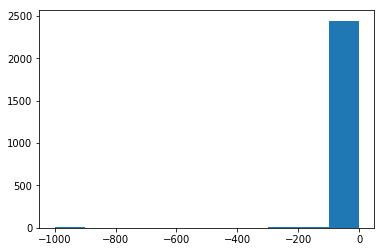

MAX  Orange Line to City Center/Expo Center
13721


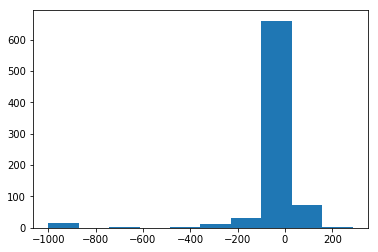

MAX  Orange Line to City Center/Expo Center
13722


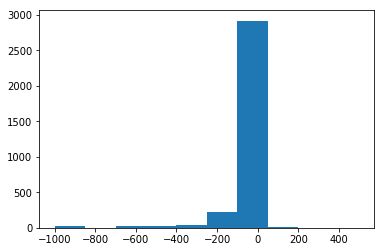

MAX  Orange Line to City Center/Expo Center
13723


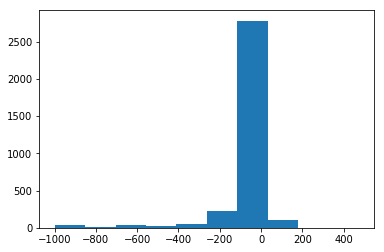

MAX  Orange Line to City Center/Expo Center
13724


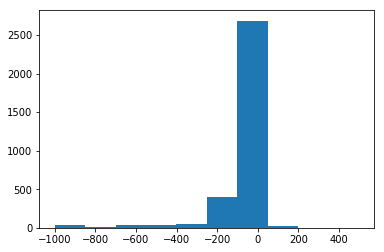

MAX  Orange Line to City Center/Expo Center
13725


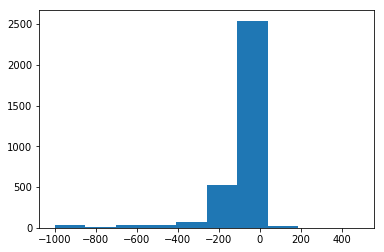

MAX  Orange Line to City Center/Expo Center
13726


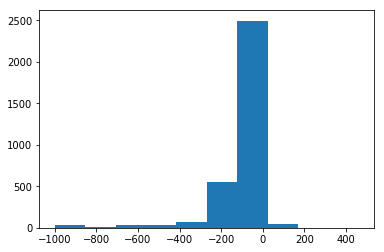

MAX  Orange Line to City Center/Expo Center
13727


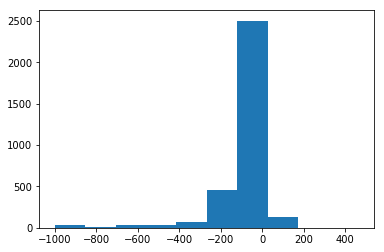

MAX  Orange Line to City Center/Expo Center
13728


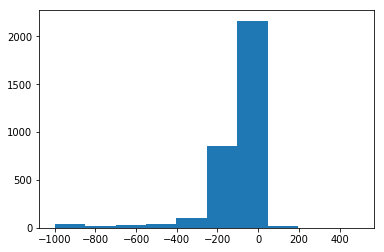

MAX  Orange Line to City Center/Expo Center
13729


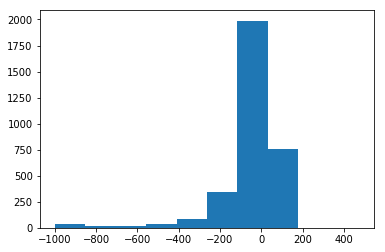

MAX  Orange Line to City Center/PSU
10293


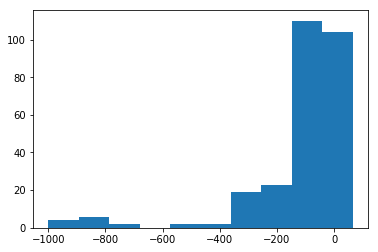

MAX  Orange Line to City Center/PSU
13720


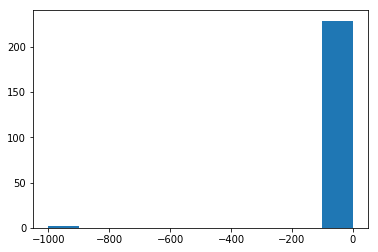

MAX  Orange Line to City Center/PSU
13721


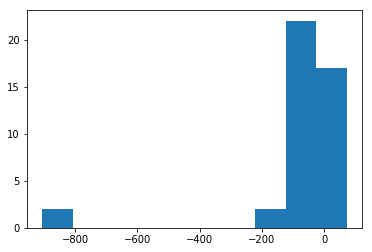

MAX  Orange Line to City Center/PSU
13722


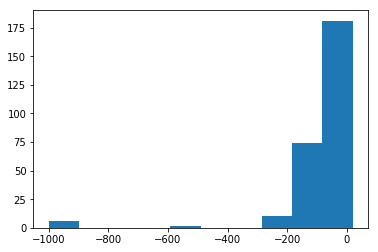

MAX  Orange Line to City Center/PSU
13723


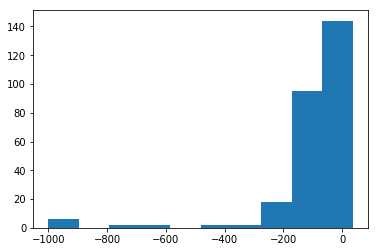

MAX  Orange Line to City Center/PSU
13724


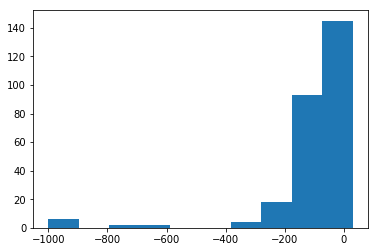

MAX  Orange Line to City Center/PSU
13725


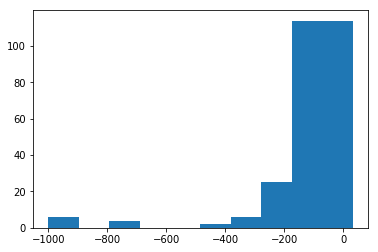

MAX  Orange Line to City Center/PSU
13726


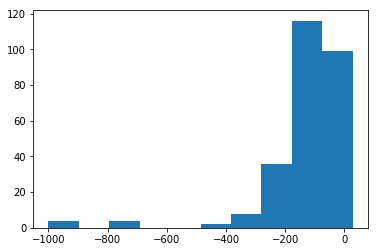

MAX  Orange Line to City Center/PSU
13727


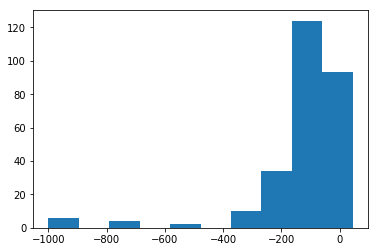

MAX  Orange Line to City Center/PSU
13728


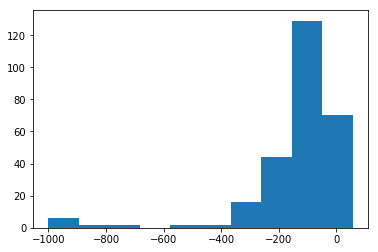

MAX  Orange Line to City Center/PSU
13729


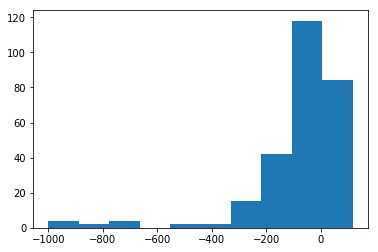

MAX  Orange Line to Milwaukie
7601


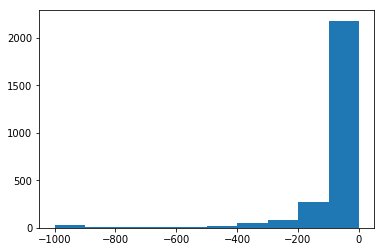

MAX  Orange Line to Milwaukie
7606


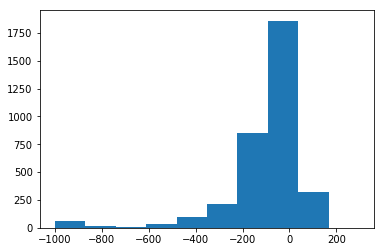

MAX  Orange Line to Milwaukie
7608


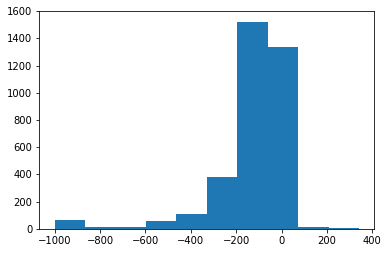

MAX  Orange Line to Milwaukie
7618


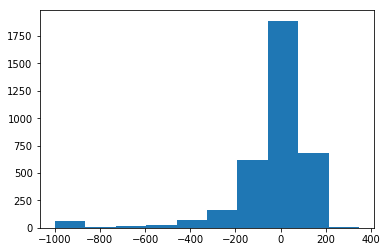

MAX  Orange Line to Milwaukie
7627


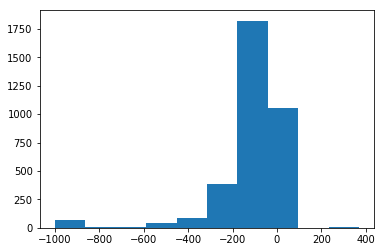

MAX  Orange Line to Milwaukie
7646


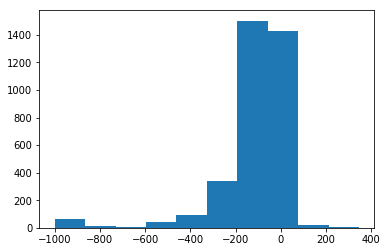

MAX  Orange Line to Milwaukie
9303


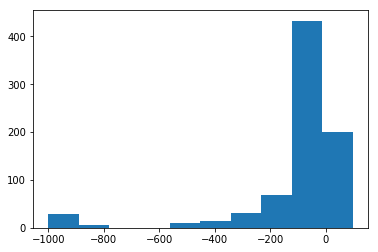

MAX  Orange Line to Milwaukie
13710


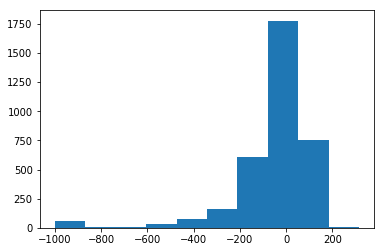

MAX  Orange Line to Milwaukie
13711


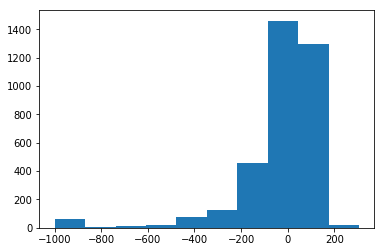

MAX  Orange Line to Milwaukie
13712


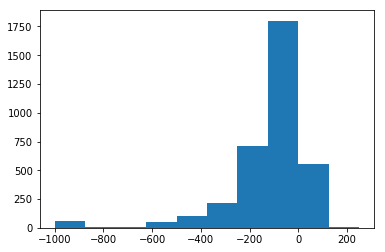

MAX  Orange Line to Milwaukie
13713


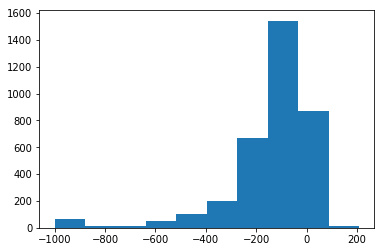

MAX  Orange Line to Milwaukie
13714


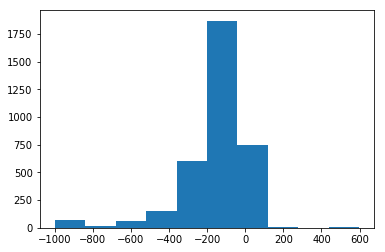

MAX  Orange Line to Milwaukie
13715


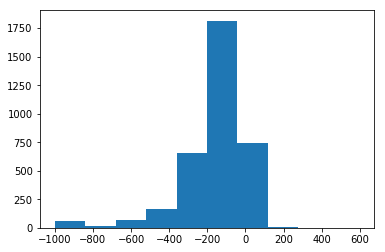

MAX  Orange Line to Milwaukie
13716


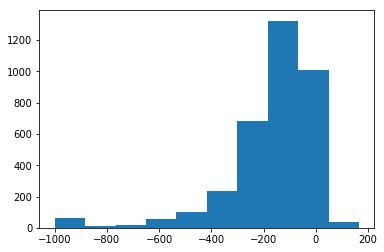

MAX  Orange Line to Milwaukie
13717


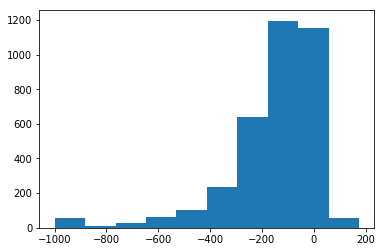

MAX  Orange Line to Milwaukie
13718


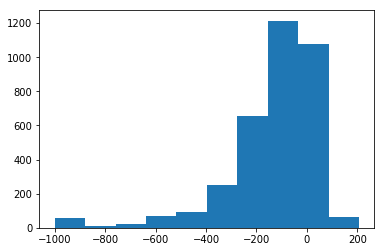

MAX  Orange Line to Milwaukie
13720


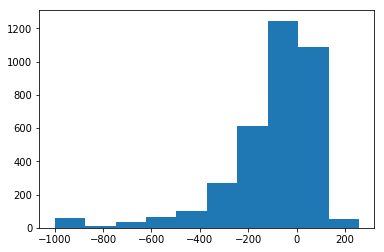

MAX  Red Line to Airport
8333


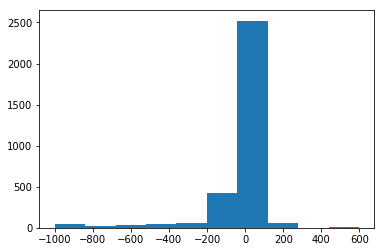

MAX  Red Line to Airport
8334


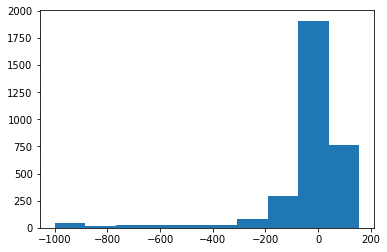

MAX  Red Line to Airport
8335


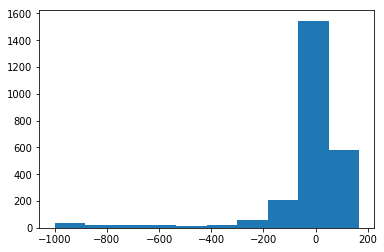

MAX  Red Line to Airport
8336


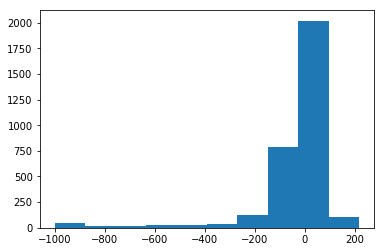

MAX  Red Line to Airport
8337


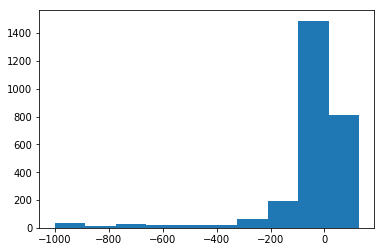

MAX  Red Line to Airport
8338


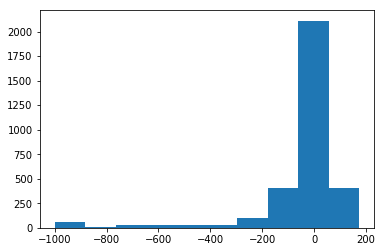

MAX  Red Line to Airport
8339


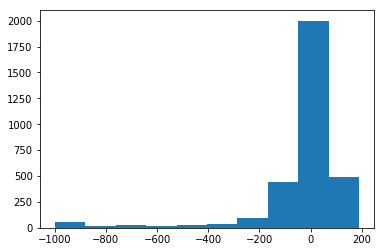

MAX  Red Line to Airport
8340


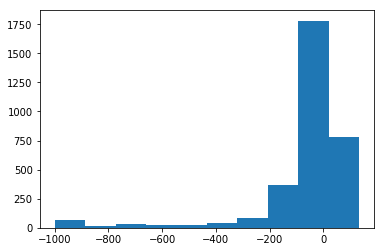

MAX  Red Line to Airport
8341


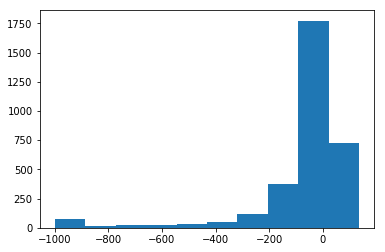

MAX  Red Line to Airport
8342


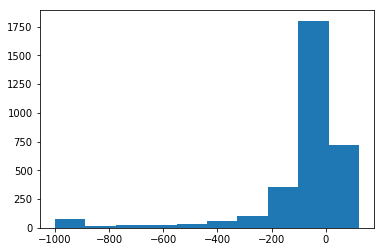

MAX  Red Line to Airport
8343


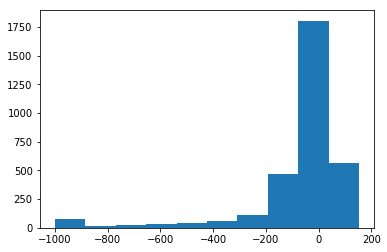

MAX  Red Line to Airport
8344


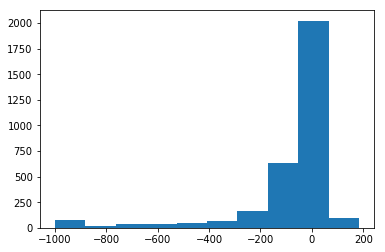

MAX  Red Line to Airport
8345


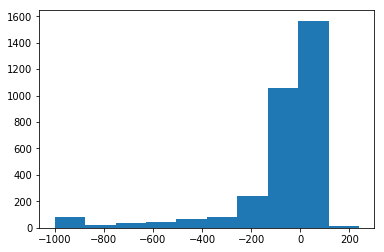

MAX  Red Line to Airport
8346


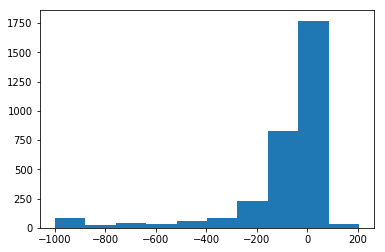

MAX  Red Line to Airport
8347


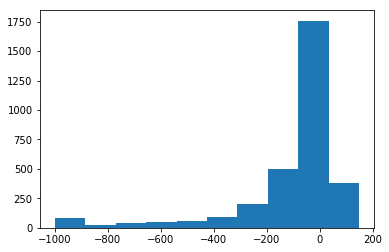

MAX  Red Line to Airport
9758


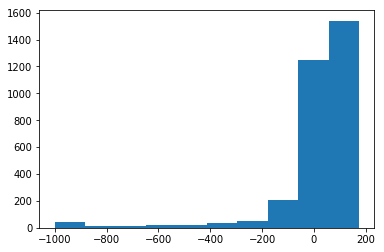

MAX  Red Line to Airport
9759


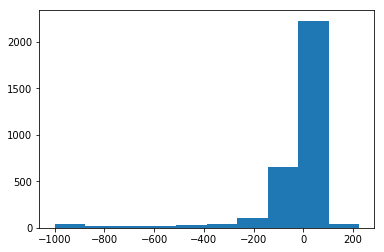

MAX  Red Line to Airport
9821


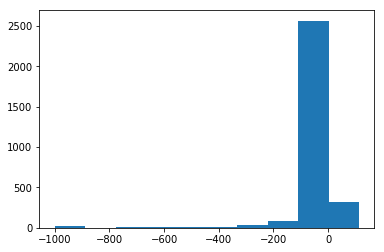

MAX  Red Line to Airport
9822


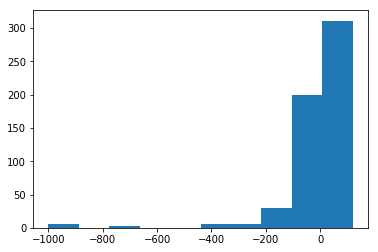

MAX  Red Line to Airport
9824


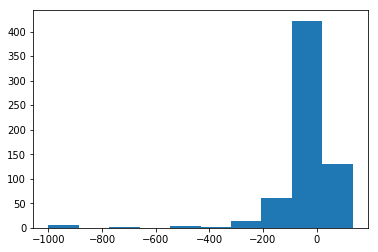

MAX  Red Line to Airport
9826


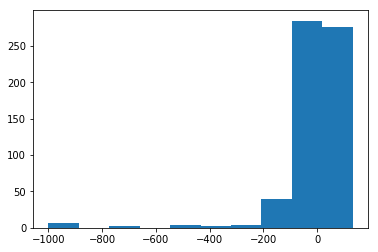

MAX  Red Line to Airport
9828


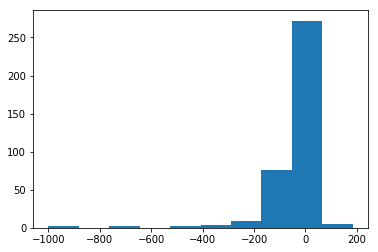

MAX  Red Line to Airport
9830


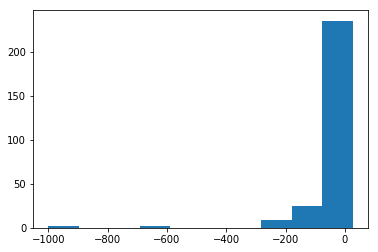

MAX  Red Line to Airport
9831


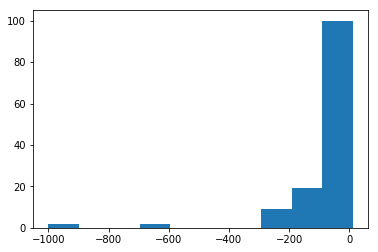

MAX  Red Line to Airport
9834


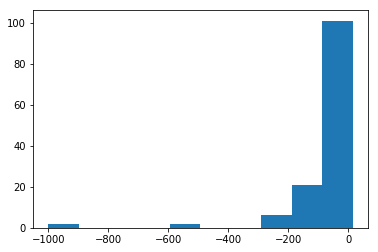

MAX  Red Line to Airport
9835


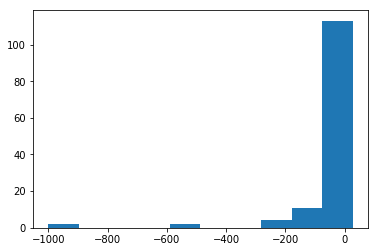

MAX  Red Line to Airport
9838


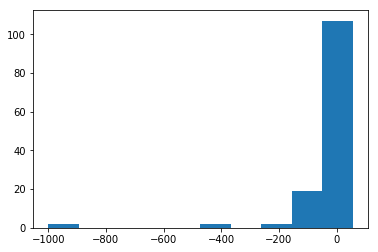

MAX  Red Line to Airport
9839


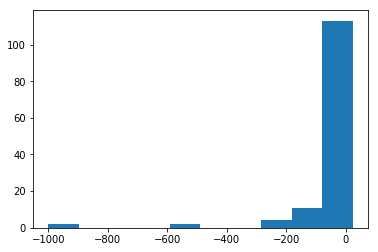

MAX  Red Line to Airport
9841


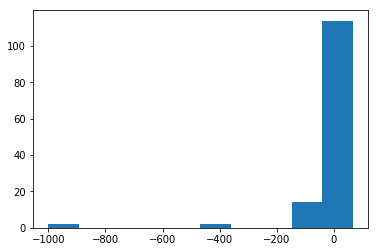

MAX  Red Line to Airport
9843


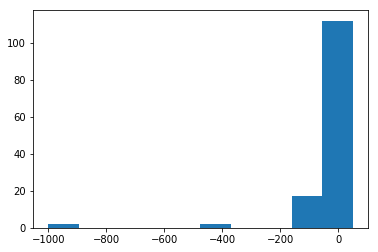

MAX  Red Line to Airport
9846


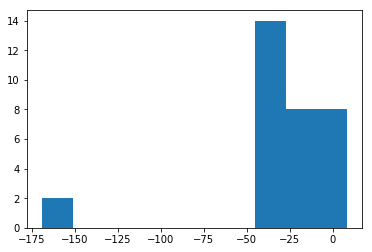

MAX  Red Line to Airport
9848


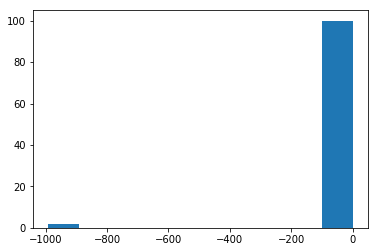

MAX  Red Line to Airport
9969


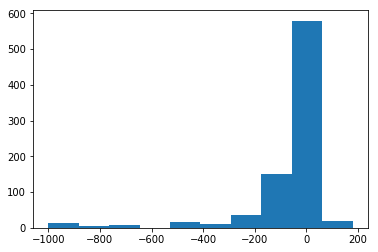

MAX  Red Line to Airport
10118


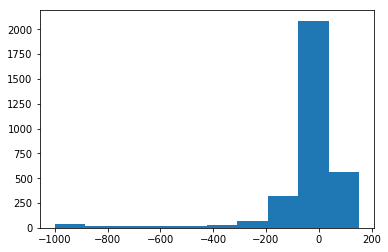

MAX  Red Line to Airport
10120


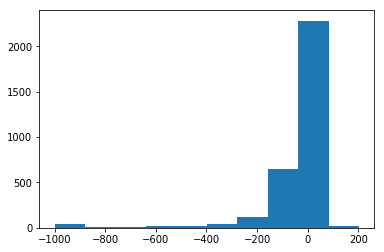

MAX  Red Line to Airport
10572


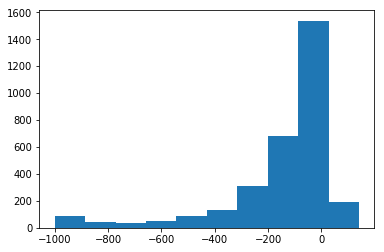

MAX  Red Line to Airport
10574


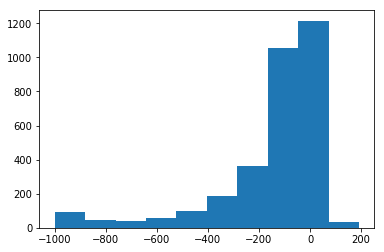

MAX  Red Line to Airport
10576


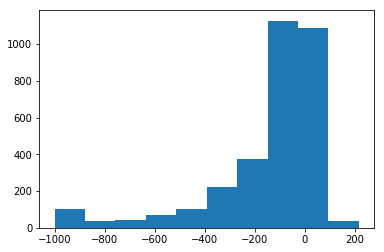

MAX  Red Line to Airport
10579


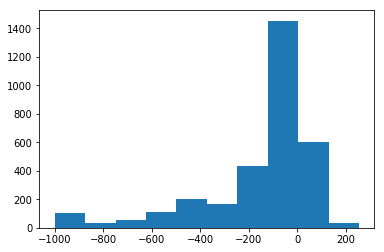

MAX  Red Line to Airport
11616


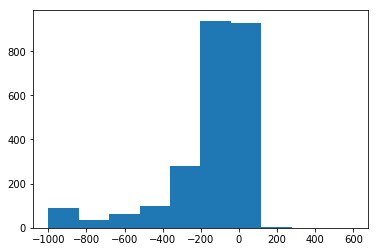

MAX  Red Line to City Center & Beaverton
8370


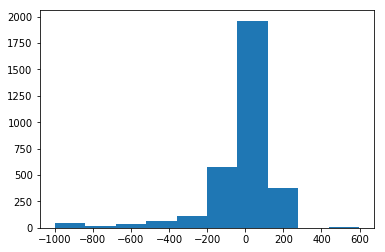

MAX  Red Line to City Center & Beaverton
8371


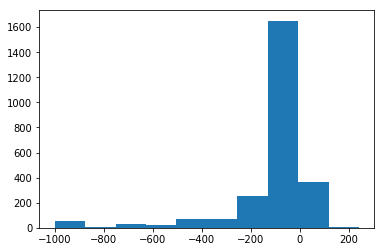

MAX  Red Line to City Center & Beaverton
8372


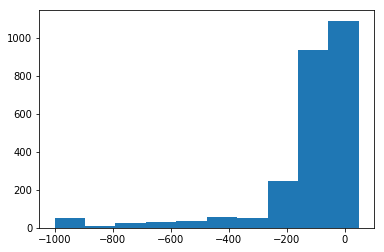

MAX  Red Line to City Center & Beaverton
8373


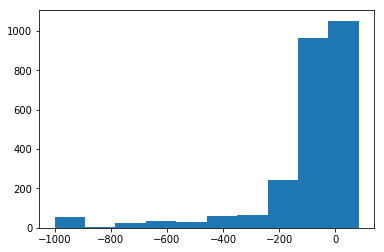

MAX  Red Line to City Center & Beaverton
8374


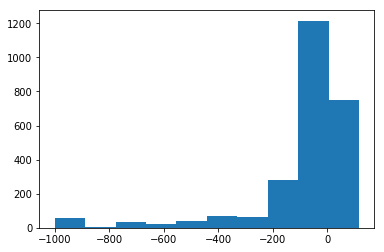

MAX  Red Line to City Center & Beaverton
8375


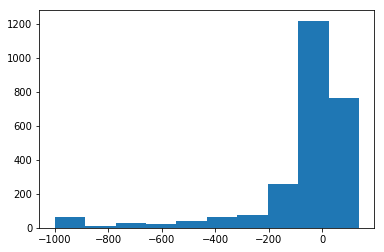

MAX  Red Line to City Center & Beaverton
8376


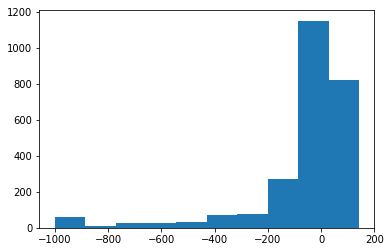

MAX  Red Line to City Center & Beaverton
8377


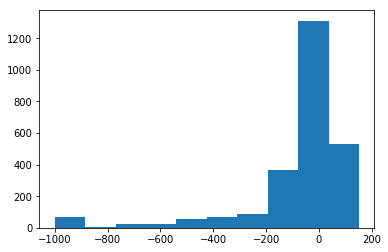

MAX  Red Line to City Center & Beaverton
8378


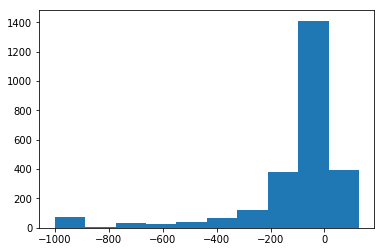

MAX  Red Line to City Center & Beaverton
8379


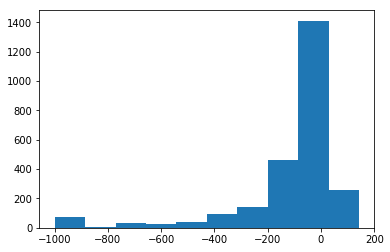

MAX  Red Line to City Center & Beaverton
8380


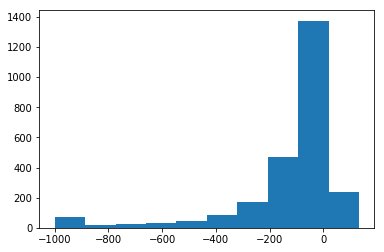

MAX  Red Line to City Center & Beaverton
8381


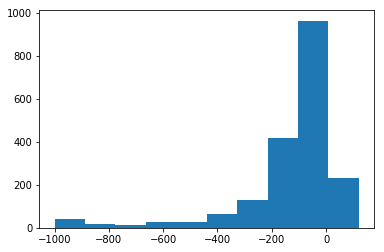

MAX  Red Line to City Center & Beaverton
8382


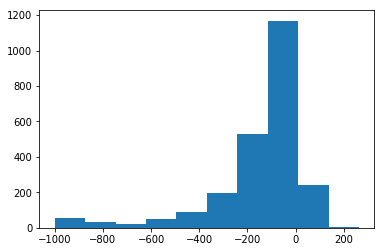

MAX  Red Line to City Center & Beaverton
8383


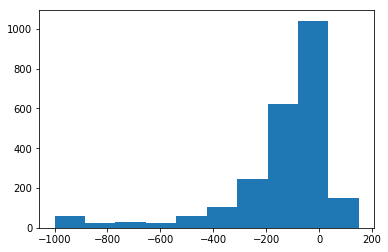

MAX  Red Line to City Center & Beaverton
8384


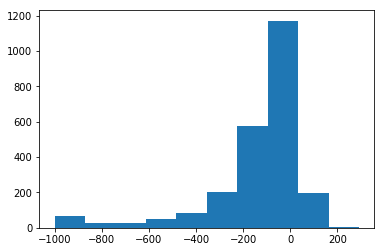

MAX  Red Line to City Center & Beaverton
9624


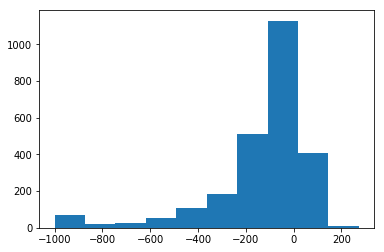

MAX  Red Line to City Center & Beaverton
9757


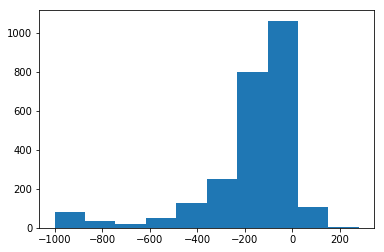

MAX  Red Line to City Center & Beaverton
9820


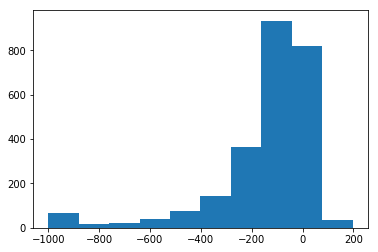

MAX  Red Line to City Center & Beaverton
9821


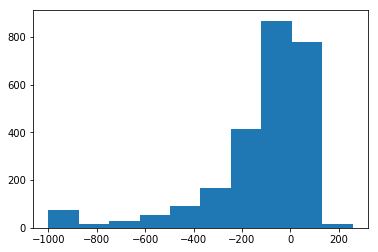

MAX  Red Line to City Center & Beaverton
10117


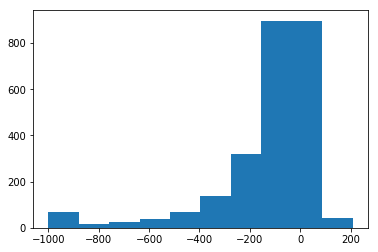

MAX  Red Line to City Center & Beaverton
10121


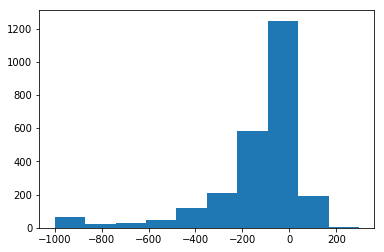

MAX  Red Line to City Center & Beaverton
10573


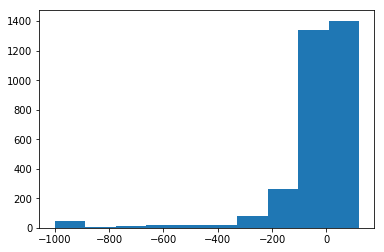

MAX  Red Line to City Center & Beaverton
10575


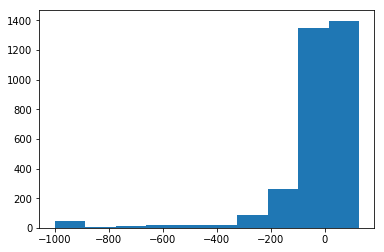

MAX  Red Line to City Center & Beaverton
10577


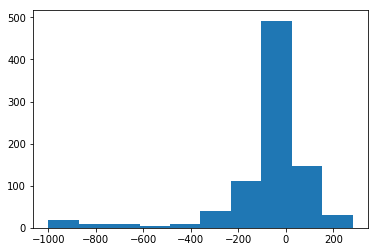

MAX  Red Line to City Center & Beaverton
10579


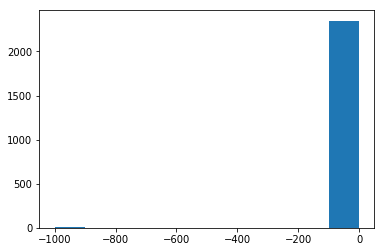

MAX  Red Line to City Center & Beaverton
11615


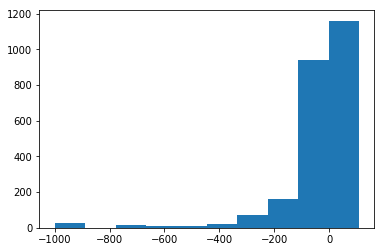

MAX  To City Center
7601


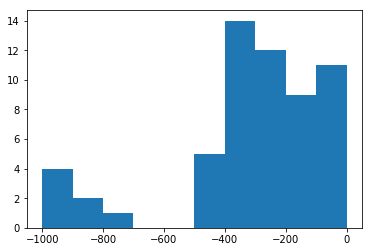

MAX  To City Center
7763


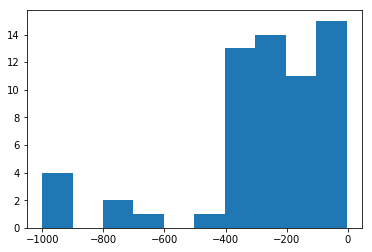

MAX  To City Center
7774


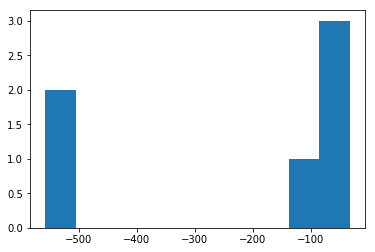

MAX  To City Center
7777


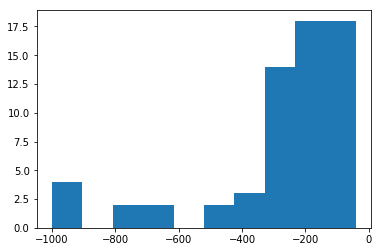

MAX  To City Center
7787


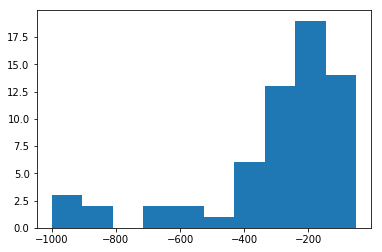

MAX  To City Center
9299


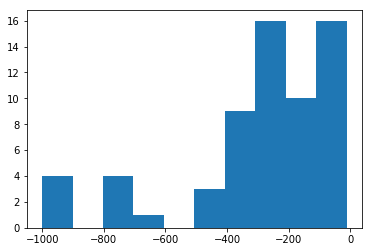

MAX  To City Center
10293


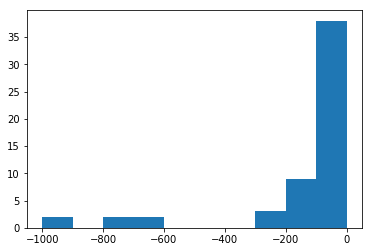

MAX  To City Center
13123


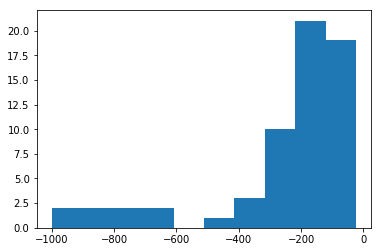

MAX  Yellow Line to City Center/Milwaukie
7601


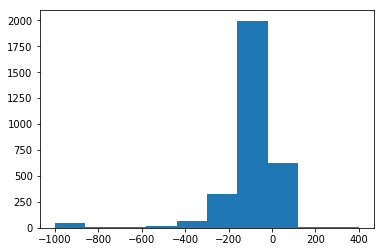

MAX  Yellow Line to City Center/Milwaukie
11498


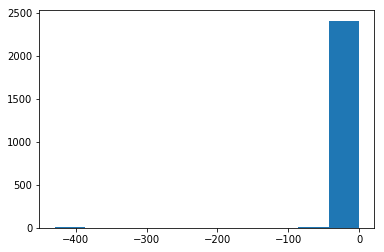

MAX  Yellow Line to City Center/Milwaukie
11499


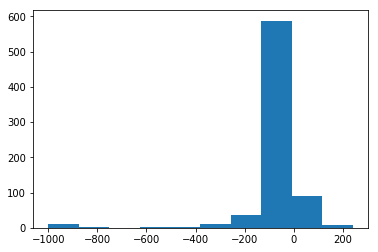

MAX  Yellow Line to City Center/Milwaukie
11500


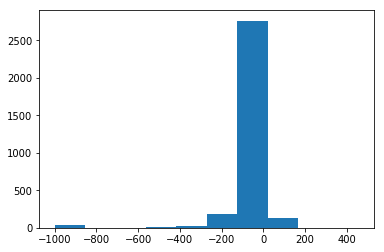

MAX  Yellow Line to City Center/Milwaukie
11501


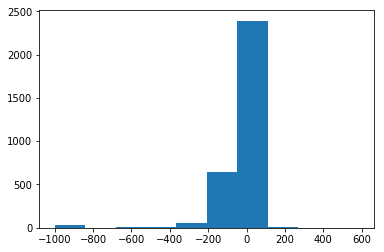

MAX  Yellow Line to City Center/Milwaukie
11502


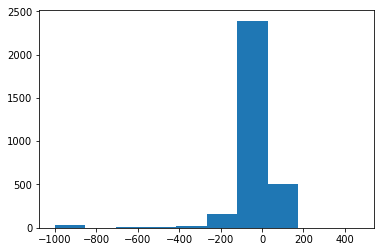

MAX  Yellow Line to City Center/Milwaukie
11503


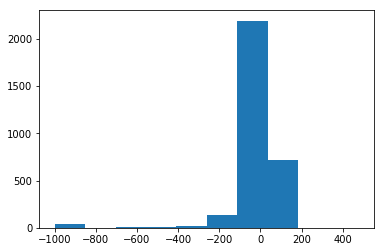

MAX  Yellow Line to City Center/Milwaukie
11504


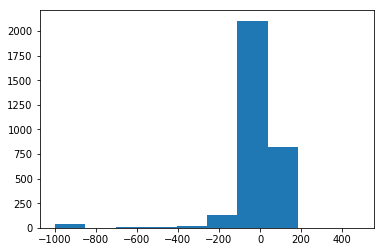

MAX  Yellow Line to City Center/Milwaukie
11505


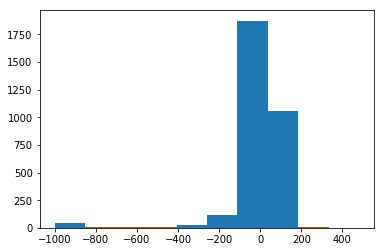

MAX  Yellow Line to City Center/Milwaukie
11506


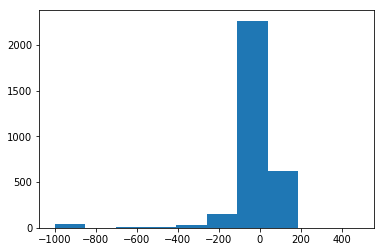

MAX  Yellow Line to City Center/Milwaukie
11507


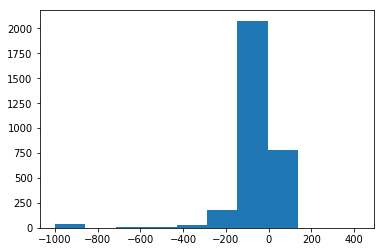

MAX  Yellow Line to City Center/PSU
7601


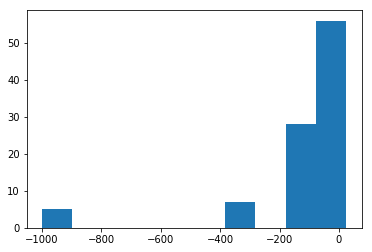

MAX  Yellow Line to City Center/PSU
11498


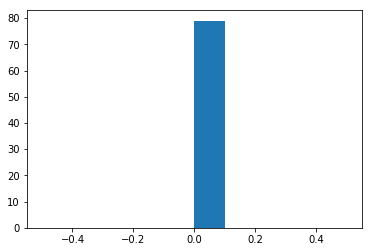

MAX  Yellow Line to City Center/PSU
11499


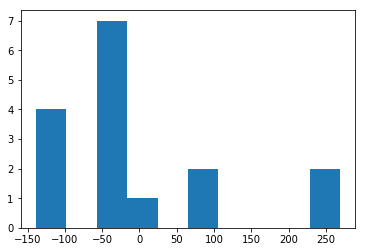

MAX  Yellow Line to City Center/PSU
11500


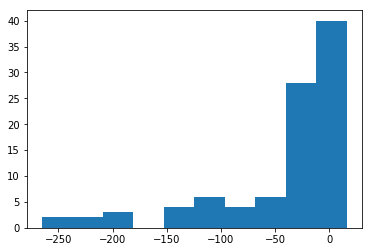

MAX  Yellow Line to City Center/PSU
11501


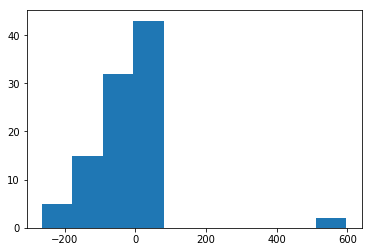

MAX  Yellow Line to City Center/PSU
11502


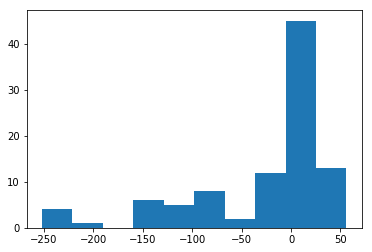

MAX  Yellow Line to City Center/PSU
11503


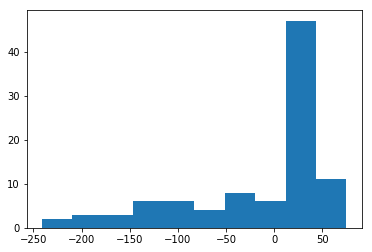

MAX  Yellow Line to City Center/PSU
11504


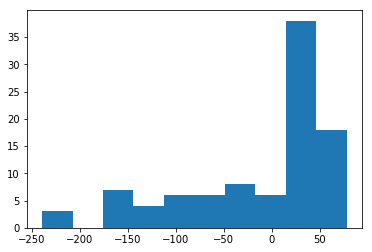

MAX  Yellow Line to City Center/PSU
11505


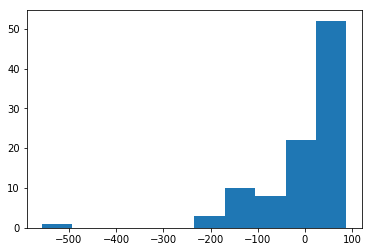

MAX  Yellow Line to City Center/PSU
11506


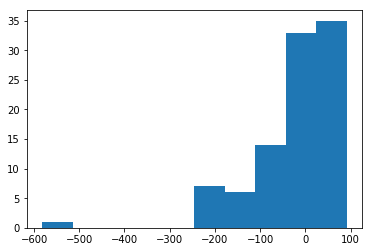

MAX  Yellow Line to City Center/PSU
11507


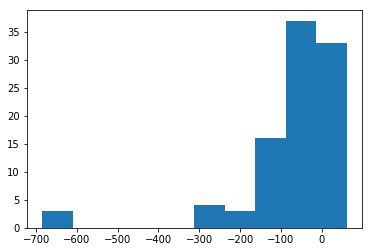

MAX  Yellow Line to Expo Center
7763


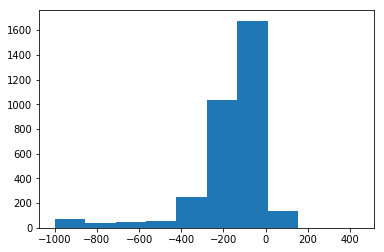

MAX  Yellow Line to Expo Center
7774


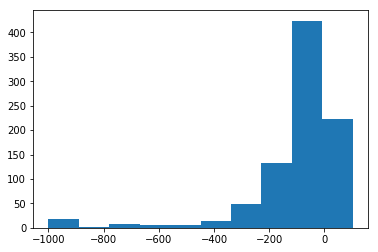

MAX  Yellow Line to Expo Center
7777


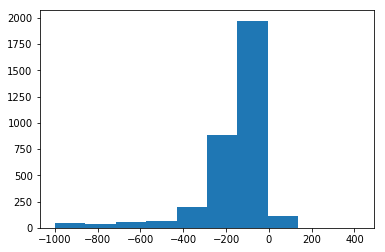

MAX  Yellow Line to Expo Center
7787


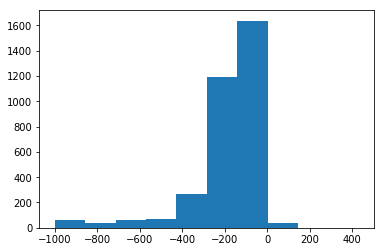

MAX  Yellow Line to Expo Center
9299


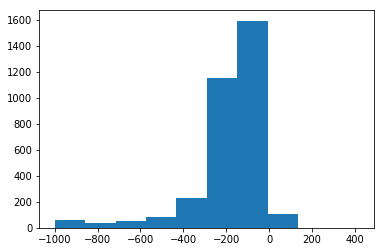

MAX  Yellow Line to Expo Center
10293


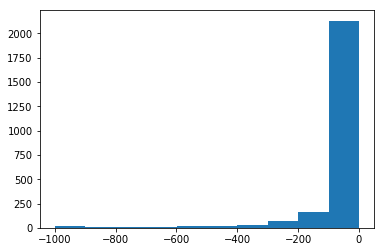

MAX  Yellow Line to Expo Center
11498


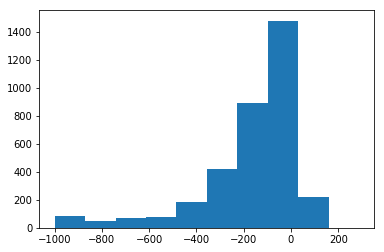

MAX  Yellow Line to Expo Center
11508


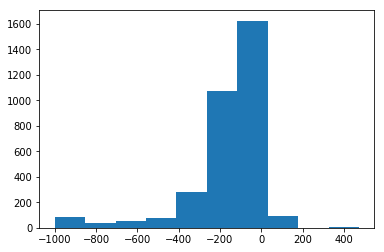

MAX  Yellow Line to Expo Center
11509


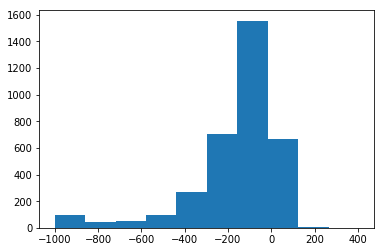

MAX  Yellow Line to Expo Center
11510


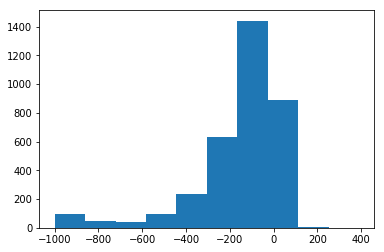

MAX  Yellow Line to Expo Center
11511


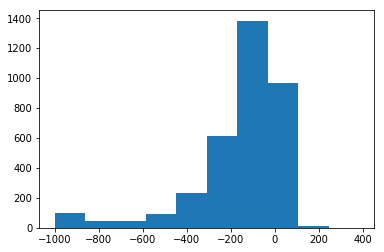

MAX  Yellow Line to Expo Center
11512


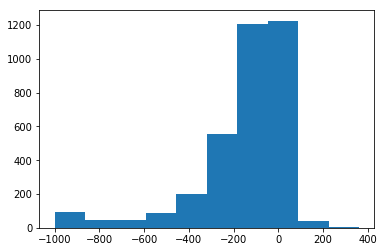

MAX  Yellow Line to Expo Center
11513


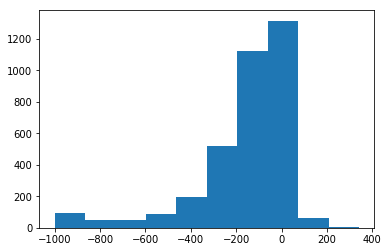

MAX  Yellow Line to Expo Center
11514


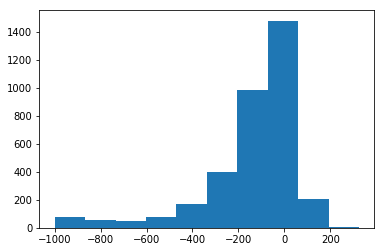

MAX  Yellow Line to Expo Center
11515


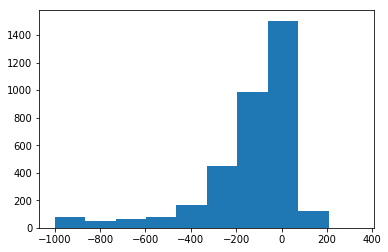

MAX  Yellow Line to Expo Center
11516


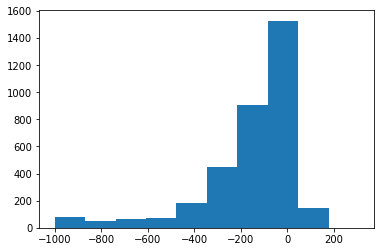

MAX  Yellow Line to Expo Center
13123


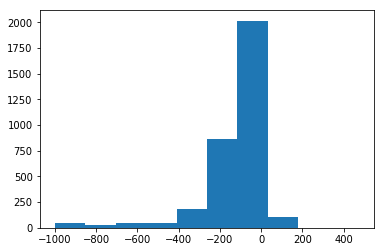

MAX  Yellow Line to Expo Center
13140


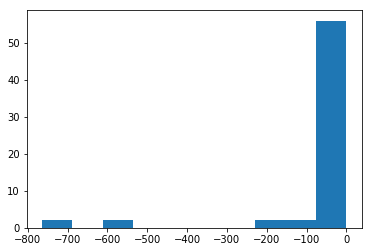

MAX  Yellow Line to Expo Center
13701


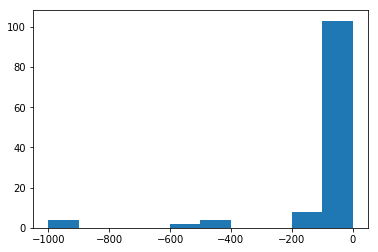

MAX  Yellow Line to Interstate/Rose Quarter
11498


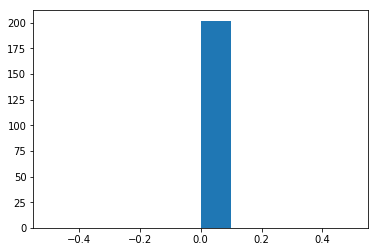

MAX  Yellow Line to Interstate/Rose Quarter
11499


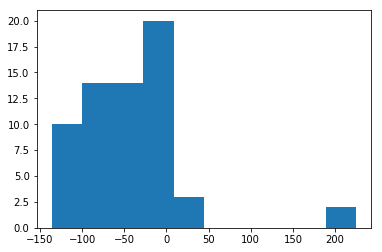

MAX  Yellow Line to Interstate/Rose Quarter
11500


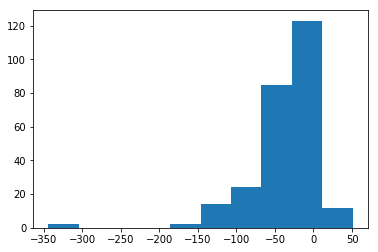

MAX  Yellow Line to Interstate/Rose Quarter
11501


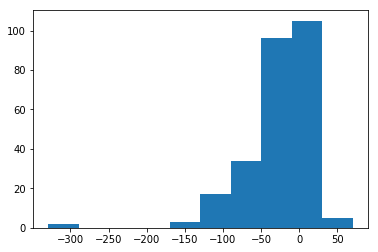

MAX  Yellow Line to Interstate/Rose Quarter
11502


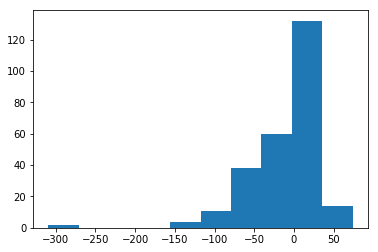

MAX  Yellow Line to Interstate/Rose Quarter
11503


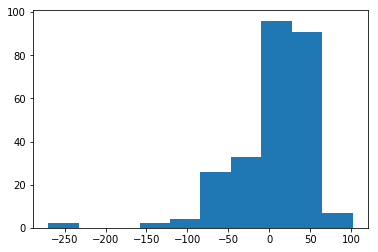

MAX  Yellow Line to Interstate/Rose Quarter
11504


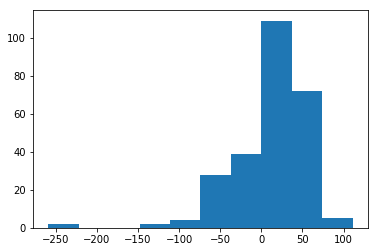

MAX  Yellow Line to Interstate/Rose Quarter
11505


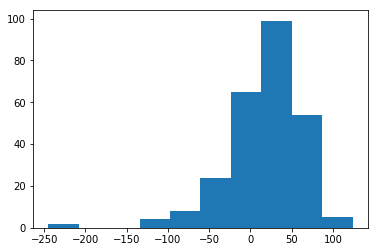

MAX  Yellow Line to Interstate/Rose Quarter
11506


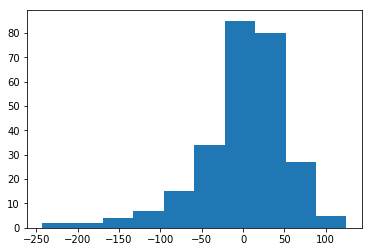

MAX  Yellow Line to Interstate/Rose Quarter
11507


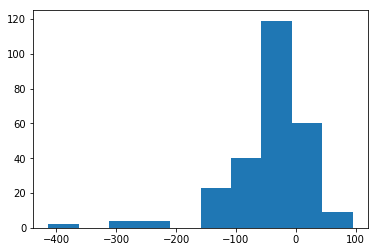

MAX  Yellow Line to Interstate/Rose Quarter
13803


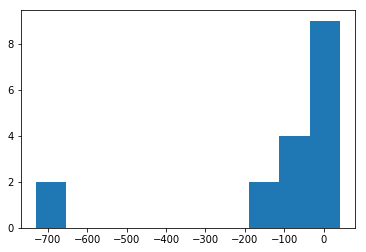

In [47]:
for station in events.groupby(["signMessageLong","nextLocID"])["delay"]:
    print(station[0][0])
    print(station[0][1])
    plt.hist(station[1:])
    plt.show()

MAX  Blue Line to City Center
8333
MAX  Blue Line to City Center
8334
MAX  Blue Line to City Center
8335
MAX  Blue Line to City Center
8336
MAX  Blue Line to City Center
8337
MAX  Blue Line to City Center
8338
MAX  Blue Line to City Center
8339
MAX  Blue Line to City Center
8362
MAX  Blue Line to City Center
8363
MAX  Blue Line to City Center
8364
MAX  Blue Line to City Center
8365
MAX  Blue Line to City Center
8366
MAX  Blue Line to City Center
8367
MAX  Blue Line to City Center
8368
MAX  Blue Line to City Center
8369
MAX  Blue Line to City Center
8370
MAX  Blue Line to City Center
9758
MAX  Blue Line to City Center
9759
MAX  Blue Line to City Center
9821
MAX  Blue Line to City Center
9822
MAX  Blue Line to City Center
9824
MAX  Blue Line to City Center
9826
MAX  Blue Line to City Center
9828
MAX  Blue Line to City Center
9830
MAX  Blue Line to City Center
9831
MAX  Blue Line to City Center
9834
MAX  Blue Line to City Center
9835
MAX  Blue Line to City Center
9838
MAX  Blue Line to Ci

MAX  Blue Line to Ruby Junction/E 197th Ave
8335
MAX  Blue Line to Ruby Junction/E 197th Ave
8336
MAX  Blue Line to Ruby Junction/E 197th Ave
8337
MAX  Blue Line to Ruby Junction/E 197th Ave
8338
MAX  Blue Line to Ruby Junction/E 197th Ave
8339
MAX  Blue Line to Ruby Junction/E 197th Ave
8340
MAX  Blue Line to Ruby Junction/E 197th Ave
8341
MAX  Blue Line to Ruby Junction/E 197th Ave
8342
MAX  Blue Line to Ruby Junction/E 197th Ave
8343
MAX  Blue Line to Ruby Junction/E 197th Ave
8344
MAX  Blue Line to Ruby Junction/E 197th Ave
8345
MAX  Blue Line to Ruby Junction/E 197th Ave
8346
MAX  Blue Line to Ruby Junction/E 197th Ave
8347
MAX  Blue Line to Ruby Junction/E 197th Ave
8348
MAX  Blue Line to Ruby Junction/E 197th Ave
8349
MAX  Blue Line to Ruby Junction/E 197th Ave
8350
MAX  Blue Line to Ruby Junction/E 197th Ave
8351
MAX  Blue Line to Ruby Junction/E 197th Ave
8352
MAX  Blue Line to Ruby Junction/E 197th Ave
8353
MAX  Blue Line to Ruby Junction/E 197th Ave
8354
MAX  Blue Line to Ru

MAX  Red Line to Airport
9821
MAX  Red Line to Airport
9822
MAX  Red Line to Airport
9824
MAX  Red Line to Airport
9826
MAX  Red Line to Airport
9828
MAX  Red Line to Airport
9830
MAX  Red Line to Airport
9831
MAX  Red Line to Airport
9834
MAX  Red Line to Airport
9835
MAX  Red Line to Airport
9838
MAX  Red Line to Airport
9839
MAX  Red Line to Airport
9841
MAX  Red Line to Airport
9843
MAX  Red Line to Airport
9846
MAX  Red Line to Airport
9848
MAX  Red Line to Airport
9969
MAX  Red Line to Airport
10118
MAX  Red Line to Airport
10120
MAX  Red Line to Airport
10572
MAX  Red Line to Airport
10574
MAX  Red Line to Airport
10576
MAX  Red Line to Airport
10579
MAX  Red Line to Airport
11616
MAX  Red Line to City Center & Beaverton
8370
MAX  Red Line to City Center & Beaverton
8371
MAX  Red Line to City Center & Beaverton
8372
MAX  Red Line to City Center & Beaverton
8373
MAX  Red Line to City Center & Beaverton
8374
MAX  Red Line to City Center & Beaverton
8375
MAX  Red Line to City Cente

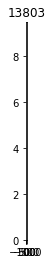

In [52]:
#for station in events.groupby(["signMessageLong","nextLocID"])["delay"]:
for index, station in enumerate(events.groupby(["signMessageLong","nextLocID"])["delay"], start=1):
    print(station[0][0])
    print(station[0][1])
    plt.subplot(1,index,1)
    plt.hist(station[1:])
    plt.title(station[0][1])
plt.show()